In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [14]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [15]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_time, output_img)
sd2 = tf.keras.Model(input_time, output_img)
sd3 = tf.keras.Model(input_time, output_img)

In [18]:
sd1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 128)              256       
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 128)              16512     
 nse)                                                            
                                                                 
 outputLayer (Dense)         (None, 10201)             1315929   
                                                                 
 reshape_1 (Reshape)         (None, 101, 101)          0     

In [19]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sd1.fit(t_train, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 4ms/step - loss: 0.2213 - rmse: 0.4705
Epoch 2/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2210 - rmse: 0.4701
Epoch 3/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2207 - rmse: 0.4698
Epoch 4/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2203 - rmse: 0.4694
Epoch 5/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2199 - rmse: 0.4690
Epoch 6/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2195 - rmse: 0.4686
Epoch 7/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2191 - rmse: 0.4681
Epoch 8/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2187 - rmse: 0.4677
Epoch 9/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2183 - rmse: 0.4672
Epoch 10/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2179 - rmse: 0.4668
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.1062 - rmse: 0.3259
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1046 - rmse: 0.3235
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1030 - rmse: 0.3209
Epoch 89/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1013 - rmse: 0.3182
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0996 - rmse: 0.3156
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0979 - rmse: 0.3129
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0963 - rmse: 0.3102
Epoch 93/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0946 - rmse: 0.3076
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0931 - rmse: 0.3051
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0916 - rmse: 0.3026
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 0.0656 - rmse: 0.2561
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0655 - rmse: 0.2559
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0654 - rmse: 0.2557
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0653 - rmse: 0.2555
Epoch 174/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0651 - rmse: 0.2552
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0650 - rmse: 0.2550
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0649 - rmse: 0.2548
Epoch 177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0648 - rmse: 0.2546
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0647 - rmse: 0.2544
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0646 - rmse: 0.2542
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0569 - rmse: 0.2384
Epoch 255/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0567 - rmse: 0.2382
Epoch 256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0566 - rmse: 0.2379
Epoch 257/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0565 - rmse: 0.2377
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0564 - rmse: 0.2375
Epoch 259/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0564 - rmse: 0.2374
Epoch 260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0563 - rmse: 0.2372
Epoch 261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0562 - rmse: 0.2371
Epoch 262/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0561 - rmse: 0.2369
Epoch 263/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0561 - rmse: 0.2368
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0506 - rmse: 0.2249
Epoch 339/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0505 - rmse: 0.2247
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0504 - rmse: 0.2245
Epoch 341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0503 - rmse: 0.2243
Epoch 342/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0503 - rmse: 0.2242
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0502 - rmse: 0.2240
Epoch 344/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0502 - rmse: 0.2240
Epoch 345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0501 - rmse: 0.2238
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0501 - rmse: 0.2238
Epoch 347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0500 - rmse: 0.2237
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0452 - rmse: 0.2126
Epoch 423/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0452 - rmse: 0.2125
Epoch 424/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0452 - rmse: 0.2126
Epoch 425/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0452 - rmse: 0.2126
Epoch 426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0451 - rmse: 0.2124
Epoch 427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0450 - rmse: 0.2122
Epoch 428/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0450 - rmse: 0.2121
Epoch 429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0449 - rmse: 0.2120
Epoch 430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0448 - rmse: 0.2117
Epoch 431/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0447 - rmse: 0.2114
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0390 - rmse: 0.1976
Epoch 507/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0390 - rmse: 0.1974
Epoch 508/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0389 - rmse: 0.1972
Epoch 509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0388 - rmse: 0.1970
Epoch 510/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0387 - rmse: 0.1968
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0387 - rmse: 0.1966
Epoch 512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0386 - rmse: 0.1965
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0386 - rmse: 0.1964
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0385 - rmse: 0.1963
Epoch 515/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0385 - rmse: 0.1962
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0333 - rmse: 0.1826
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0332 - rmse: 0.1823
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0331 - rmse: 0.1820
Epoch 593/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0331 - rmse: 0.1818
Epoch 594/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0330 - rmse: 0.1816
Epoch 595/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0329 - rmse: 0.1814
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0328 - rmse: 0.1812
Epoch 597/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0328 - rmse: 0.1810
Epoch 598/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0327 - rmse: 0.1809
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0327 - rmse: 0.1807
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0276 - rmse: 0.1661
Epoch 675/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0275 - rmse: 0.1658
Epoch 676/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0274 - rmse: 0.1654
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0272 - rmse: 0.1651
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0272 - rmse: 0.1648
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0271 - rmse: 0.1645
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0270 - rmse: 0.1642
Epoch 681/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0269 - rmse: 0.1639
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0268 - rmse: 0.1636
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0267 - rmse: 0.1633
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0211 - rmse: 0.1452
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1450
Epoch 760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0210 - rmse: 0.1448
Epoch 761/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0209 - rmse: 0.1446
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0208 - rmse: 0.1444
Epoch 763/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0207 - rmse: 0.1440
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0207 - rmse: 0.1437
Epoch 765/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1431
Epoch 767/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0204 - rmse: 0.1428
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0153 - rmse: 0.1236
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1234
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1230
Epoch 845/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0150 - rmse: 0.1227
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1222
Epoch 847/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0149 - rmse: 0.1219
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1215
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1211
Epoch 850/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 851/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0145 - rmse: 0.1204
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.1001
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0996
Epoch 929/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0098 - rmse: 0.0992
Epoch 930/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0098 - rmse: 0.0990
Epoch 931/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0098 - rmse: 0.0988
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 934/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0980
Epoch 935/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 1011/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 1012/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 1014/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0738
Epoch 1015/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 1017/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0053 - rmse: 0.0727
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0721
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 1094/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 1097/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 1098/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 1100/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 1101/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 1177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 1180/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 1181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 1183/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 1184/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 1185/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 5.8018e-04 - rmse: 0.0241
Epoch 1258/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7673e-04 - rmse: 0.0240
Epoch 1259/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7346e-04 - rmse: 0.0239
Epoch 1260/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6994e-04 - rmse: 0.0239
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6676e-04 - rmse: 0.0238
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6384e-04 - rmse: 0.0237
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6132e-04 - rmse: 0.0237
Epoch 1264/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5876e-04 - rmse: 0.0236
Epoch 1265/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5606e-04 - rmse: 0.0236
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5347e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 3.2310e-04 - rmse: 0.0180
Epoch 1338/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2137e-04 - rmse: 0.0179
Epoch 1339/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1972e-04 - rmse: 0.0179
Epoch 1340/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1769e-04 - rmse: 0.0178
Epoch 1341/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1572e-04 - rmse: 0.0178
Epoch 1342/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1601e-04 - rmse: 0.0178
Epoch 1343/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1551e-04 - rmse: 0.0178
Epoch 1344/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1456e-04 - rmse: 0.0177
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1343e-04 - rmse: 0.0177
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1193e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 2.3704e-04 - rmse: 0.0154
Epoch 1418/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3606e-04 - rmse: 0.0154
Epoch 1419/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3495e-04 - rmse: 0.0153
Epoch 1420/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3414e-04 - rmse: 0.0153
Epoch 1421/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3369e-04 - rmse: 0.0153
Epoch 1422/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3355e-04 - rmse: 0.0153
Epoch 1423/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3362e-04 - rmse: 0.0153
Epoch 1424/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3290e-04 - rmse: 0.0153
Epoch 1425/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3144e-04 - rmse: 0.0152
Epoch 1426/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2979e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.9276e-04 - rmse: 0.0139
Epoch 1498/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9242e-04 - rmse: 0.0139
Epoch 1499/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9255e-04 - rmse: 0.0139
Epoch 1500/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9215e-04 - rmse: 0.0139
Epoch 1501/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9191e-04 - rmse: 0.0139
Epoch 1502/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9154e-04 - rmse: 0.0138
Epoch 1503/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9104e-04 - rmse: 0.0138
Epoch 1504/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9049e-04 - rmse: 0.0138
Epoch 1505/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9047e-04 - rmse: 0.0138
Epoch 1506/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8939e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.6329e-04 - rmse: 0.0128
Epoch 1578/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6407e-04 - rmse: 0.0128
Epoch 1579/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6453e-04 - rmse: 0.0128
Epoch 1580/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6427e-04 - rmse: 0.0128
Epoch 1581/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6371e-04 - rmse: 0.0128
Epoch 1582/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6298e-04 - rmse: 0.0128
Epoch 1583/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6199e-04 - rmse: 0.0127
Epoch 1584/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6089e-04 - rmse: 0.0127
Epoch 1585/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6029e-04 - rmse: 0.0127
Epoch 1586/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5960e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.3710e-04 - rmse: 0.0117
Epoch 1658/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3697e-04 - rmse: 0.0117
Epoch 1659/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3682e-04 - rmse: 0.0117
Epoch 1660/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3679e-04 - rmse: 0.0117
Epoch 1661/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3706e-04 - rmse: 0.0117
Epoch 1662/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3716e-04 - rmse: 0.0117
Epoch 1663/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3731e-04 - rmse: 0.0117
Epoch 1664/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3784e-04 - rmse: 0.0117
Epoch 1665/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3877e-04 - rmse: 0.0118
Epoch 1666/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4032e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.1416e-04 - rmse: 0.0107
Epoch 1738/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1391e-04 - rmse: 0.0107
Epoch 1739/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1367e-04 - rmse: 0.0107
Epoch 1740/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1346e-04 - rmse: 0.0107
Epoch 1741/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1325e-04 - rmse: 0.0106
Epoch 1742/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1309e-04 - rmse: 0.0106
Epoch 1743/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1270e-04 - rmse: 0.0106
Epoch 1744/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1243e-04 - rmse: 0.0106
Epoch 1745/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1244e-04 - rmse: 0.0106
Epoch 1746/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1216e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 9.3585e-05 - rmse: 0.0097
Epoch 1818/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3063e-05 - rmse: 0.0096
Epoch 1819/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2766e-05 - rmse: 0.0096
Epoch 1820/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2770e-05 - rmse: 0.0096
Epoch 1821/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2981e-05 - rmse: 0.0096
Epoch 1822/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3807e-05 - rmse: 0.0097
Epoch 1823/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4235e-05 - rmse: 0.0097
Epoch 1824/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4027e-05 - rmse: 0.0097
Epoch 1825/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3165e-05 - rmse: 0.0097
Epoch 1826/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1933e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 7.5467e-05 - rmse: 0.0087
Epoch 1898/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5176e-05 - rmse: 0.0087
Epoch 1899/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4942e-05 - rmse: 0.0087
Epoch 1900/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4980e-05 - rmse: 0.0087
Epoch 1901/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4749e-05 - rmse: 0.0086
Epoch 1902/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4535e-05 - rmse: 0.0086
Epoch 1903/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4318e-05 - rmse: 0.0086
Epoch 1904/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4071e-05 - rmse: 0.0086
Epoch 1905/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3911e-05 - rmse: 0.0086
Epoch 1906/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3960e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.3347e-05 - rmse: 0.0080
Epoch 1978/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2384e-05 - rmse: 0.0079
Epoch 1979/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1869e-05 - rmse: 0.0079
Epoch 1980/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1637e-05 - rmse: 0.0079
Epoch 1981/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1495e-05 - rmse: 0.0078
Epoch 1982/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1396e-05 - rmse: 0.0078
Epoch 1983/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1293e-05 - rmse: 0.0078
Epoch 1984/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1203e-05 - rmse: 0.0078
Epoch 1985/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1082e-05 - rmse: 0.0078
Epoch 1986/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0919e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.0673e-05 - rmse: 0.0071
Epoch 2058/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0553e-05 - rmse: 0.0071
Epoch 2059/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0424e-05 - rmse: 0.0071
Epoch 2060/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0348e-05 - rmse: 0.0071
Epoch 2061/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0498e-05 - rmse: 0.0071
Epoch 2062/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0736e-05 - rmse: 0.0071
Epoch 2063/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1005e-05 - rmse: 0.0071
Epoch 2064/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1261e-05 - rmse: 0.0072
Epoch 2065/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1312e-05 - rmse: 0.0072
Epoch 2066/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1205e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.2394e-05 - rmse: 0.0065
Epoch 2138/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1966e-05 - rmse: 0.0065
Epoch 2139/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1898e-05 - rmse: 0.0065
Epoch 2140/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1758e-05 - rmse: 0.0065
Epoch 2141/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1912e-05 - rmse: 0.0065
Epoch 2142/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2512e-05 - rmse: 0.0065
Epoch 2143/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3161e-05 - rmse: 0.0066
Epoch 2144/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3258e-05 - rmse: 0.0066
Epoch 2145/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3046e-05 - rmse: 0.0066
Epoch 2146/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2773e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 3.5884e-05 - rmse: 0.0060
Epoch 2218/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6045e-05 - rmse: 0.0060
Epoch 2219/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6127e-05 - rmse: 0.0060
Epoch 2220/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6079e-05 - rmse: 0.0060
Epoch 2221/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5880e-05 - rmse: 0.0060
Epoch 2222/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6173e-05 - rmse: 0.0060
Epoch 2223/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6363e-05 - rmse: 0.0060
Epoch 2224/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6127e-05 - rmse: 0.0060
Epoch 2225/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5651e-05 - rmse: 0.0060
Epoch 2226/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5179e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 3.1030e-05 - rmse: 0.0056
Epoch 2298/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1445e-05 - rmse: 0.0056
Epoch 2299/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2042e-05 - rmse: 0.0057
Epoch 2300/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2689e-05 - rmse: 0.0057
Epoch 2301/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2977e-05 - rmse: 0.0057
Epoch 2302/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2956e-05 - rmse: 0.0057
Epoch 2303/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2743e-05 - rmse: 0.0057
Epoch 2304/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1793e-05 - rmse: 0.0056
Epoch 2305/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0653e-05 - rmse: 0.0055
Epoch 2306/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0147e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.6940e-05 - rmse: 0.0052
Epoch 2378/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6872e-05 - rmse: 0.0052
Epoch 2379/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6800e-05 - rmse: 0.0052
Epoch 2380/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6669e-05 - rmse: 0.0052
Epoch 2381/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6589e-05 - rmse: 0.0052
Epoch 2382/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6496e-05 - rmse: 0.0051
Epoch 2383/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6413e-05 - rmse: 0.0051
Epoch 2384/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6347e-05 - rmse: 0.0051
Epoch 2385/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6379e-05 - rmse: 0.0051
Epoch 2386/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6507e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.2825e-05 - rmse: 0.0048
Epoch 2458/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2672e-05 - rmse: 0.0048
Epoch 2459/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2532e-05 - rmse: 0.0047
Epoch 2460/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2440e-05 - rmse: 0.0047
Epoch 2461/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2372e-05 - rmse: 0.0047
Epoch 2462/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2506e-05 - rmse: 0.0047
Epoch 2463/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2680e-05 - rmse: 0.0048
Epoch 2464/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2829e-05 - rmse: 0.0048
Epoch 2465/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3012e-05 - rmse: 0.0048
Epoch 2466/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3123e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.9680e-05 - rmse: 0.0044
Epoch 2538/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9727e-05 - rmse: 0.0044
Epoch 2539/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0009e-05 - rmse: 0.0045
Epoch 2540/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0226e-05 - rmse: 0.0045
Epoch 2541/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0461e-05 - rmse: 0.0045
Epoch 2542/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0263e-05 - rmse: 0.0045
Epoch 2543/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9758e-05 - rmse: 0.0044
Epoch 2544/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9289e-05 - rmse: 0.0044
Epoch 2545/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9157e-05 - rmse: 0.0044
Epoch 2546/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9303e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.8851e-05 - rmse: 0.0043
Epoch 2618/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0123e-05 - rmse: 0.0045
Epoch 2619/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1263e-05 - rmse: 0.0046
Epoch 2620/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1171e-05 - rmse: 0.0046
Epoch 2621/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9933e-05 - rmse: 0.0045
Epoch 2622/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8529e-05 - rmse: 0.0043
Epoch 2623/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7701e-05 - rmse: 0.0042
Epoch 2624/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7207e-05 - rmse: 0.0041
Epoch 2625/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7075e-05 - rmse: 0.0041
Epoch 2626/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7180e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.4656e-05 - rmse: 0.0038
Epoch 2698/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4633e-05 - rmse: 0.0038
Epoch 2699/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4608e-05 - rmse: 0.0038
Epoch 2700/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4628e-05 - rmse: 0.0038
Epoch 2701/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4674e-05 - rmse: 0.0038
Epoch 2702/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4755e-05 - rmse: 0.0038
Epoch 2703/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4778e-05 - rmse: 0.0038
Epoch 2704/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4683e-05 - rmse: 0.0038
Epoch 2705/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4502e-05 - rmse: 0.0038
Epoch 2706/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4534e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.2919e-05 - rmse: 0.0036
Epoch 2778/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2879e-05 - rmse: 0.0036
Epoch 2779/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3009e-05 - rmse: 0.0036
Epoch 2780/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3071e-05 - rmse: 0.0036
Epoch 2781/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3016e-05 - rmse: 0.0036
Epoch 2782/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2903e-05 - rmse: 0.0036
Epoch 2783/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2822e-05 - rmse: 0.0036
Epoch 2784/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2746e-05 - rmse: 0.0036
Epoch 2785/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2715e-05 - rmse: 0.0036
Epoch 2786/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2723e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.1388e-05 - rmse: 0.0034
Epoch 2858/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1465e-05 - rmse: 0.0034
Epoch 2859/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1632e-05 - rmse: 0.0034
Epoch 2860/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1591e-05 - rmse: 0.0034
Epoch 2861/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1491e-05 - rmse: 0.0034
Epoch 2862/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1518e-05 - rmse: 0.0034
Epoch 2863/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1764e-05 - rmse: 0.0034
Epoch 2864/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1919e-05 - rmse: 0.0035
Epoch 2865/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1875e-05 - rmse: 0.0034
Epoch 2866/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1630e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.0362e-05 - rmse: 0.0032
Epoch 2938/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0492e-05 - rmse: 0.0032
Epoch 2939/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0530e-05 - rmse: 0.0032
Epoch 2940/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0485e-05 - rmse: 0.0032
Epoch 2941/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0406e-05 - rmse: 0.0032
Epoch 2942/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0344e-05 - rmse: 0.0032
Epoch 2943/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0326e-05 - rmse: 0.0032
Epoch 2944/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0336e-05 - rmse: 0.0032
Epoch 2945/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0376e-05 - rmse: 0.0032
Epoch 2946/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0510e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.0740e-05 - rmse: 0.0033
Epoch 3018/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9192e-06 - rmse: 0.0031
Epoch 3019/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7114e-06 - rmse: 0.0031
Epoch 3020/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8531e-06 - rmse: 0.0031
Epoch 3021/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9794e-06 - rmse: 0.0032
Epoch 3022/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8870e-06 - rmse: 0.0031
Epoch 3023/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6961e-06 - rmse: 0.0031
Epoch 3024/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5206e-06 - rmse: 0.0031
Epoch 3025/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4209e-06 - rmse: 0.0031
Epoch 3026/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4904e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 8.2126e-06 - rmse: 0.0029
Epoch 3098/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3906e-06 - rmse: 0.0029
Epoch 3099/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5267e-06 - rmse: 0.0029
Epoch 3100/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6908e-06 - rmse: 0.0029
Epoch 3101/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8735e-06 - rmse: 0.0030
Epoch 3102/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1085e-06 - rmse: 0.0030
Epoch 3103/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5244e-06 - rmse: 0.0031
Epoch 3104/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0167e-05 - rmse: 0.0032
Epoch 3105/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0585e-05 - rmse: 0.0033
Epoch 3106/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0424e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 7.3971e-06 - rmse: 0.0027
Epoch 3178/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3310e-06 - rmse: 0.0027
Epoch 3179/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5489e-06 - rmse: 0.0027
Epoch 3180/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8139e-06 - rmse: 0.0028
Epoch 3181/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.7800e-06 - rmse: 0.0028
Epoch 3182/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5272e-06 - rmse: 0.0027
Epoch 3183/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2264e-06 - rmse: 0.0027
Epoch 3184/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0770e-06 - rmse: 0.0027
Epoch 3185/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3875e-06 - rmse: 0.0027
Epoch 3186/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8963e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 8.6272e-06 - rmse: 0.0029
Epoch 3258/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7127e-06 - rmse: 0.0031
Epoch 3259/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7864e-06 - rmse: 0.0031
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7240e-06 - rmse: 0.0030
Epoch 3261/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4875e-06 - rmse: 0.0027
Epoch 3262/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6502e-06 - rmse: 0.0026
Epoch 3263/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3039e-06 - rmse: 0.0025
Epoch 3264/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2752e-06 - rmse: 0.0025
Epoch 3265/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3211e-06 - rmse: 0.0025
Epoch 3266/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4147e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.5784e-06 - rmse: 0.0024
Epoch 3338/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5027e-06 - rmse: 0.0023
Epoch 3339/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4887e-06 - rmse: 0.0023
Epoch 3340/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7201e-06 - rmse: 0.0024
Epoch 3341/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1845e-06 - rmse: 0.0025
Epoch 3342/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3386e-06 - rmse: 0.0025
Epoch 3343/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1765e-06 - rmse: 0.0025
Epoch 3344/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9685e-06 - rmse: 0.0024
Epoch 3345/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7403e-06 - rmse: 0.0024
Epoch 3346/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5396e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 4.9915e-06 - rmse: 0.0022
Epoch 3418/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9433e-06 - rmse: 0.0022
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9125e-06 - rmse: 0.0022
Epoch 3420/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0311e-06 - rmse: 0.0022
Epoch 3421/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2782e-06 - rmse: 0.0023
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3999e-06 - rmse: 0.0023
Epoch 3423/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3865e-06 - rmse: 0.0023
Epoch 3424/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2861e-06 - rmse: 0.0023
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1145e-06 - rmse: 0.0023
Epoch 3426/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9585e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.4625e-06 - rmse: 0.0021
Epoch 3498/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3582e-06 - rmse: 0.0021
Epoch 3499/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2892e-06 - rmse: 0.0021
Epoch 3500/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2754e-06 - rmse: 0.0021
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3118e-06 - rmse: 0.0021
Epoch 3502/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2802e-06 - rmse: 0.0021
Epoch 3503/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2550e-06 - rmse: 0.0021
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2421e-06 - rmse: 0.0021
Epoch 3505/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2249e-06 - rmse: 0.0021
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2254e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.9389e-06 - rmse: 0.0020
Epoch 3578/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8000e-06 - rmse: 0.0019
Epoch 3579/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6566e-06 - rmse: 0.0019
Epoch 3580/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9583e-06 - rmse: 0.0020
Epoch 3581/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7284e-06 - rmse: 0.0022
Epoch 3582/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2300e-06 - rmse: 0.0023
Epoch 3583/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9857e-06 - rmse: 0.0022
Epoch 3584/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3935e-06 - rmse: 0.0021
Epoch 3585/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9260e-06 - rmse: 0.0020
Epoch 3586/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6870e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.4782e-06 - rmse: 0.0019
Epoch 3658/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4410e-06 - rmse: 0.0019
Epoch 3659/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4064e-06 - rmse: 0.0018
Epoch 3660/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4273e-06 - rmse: 0.0019
Epoch 3661/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4512e-06 - rmse: 0.0019
Epoch 3662/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4730e-06 - rmse: 0.0019
Epoch 3663/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6025e-06 - rmse: 0.0019
Epoch 3664/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8300e-06 - rmse: 0.0020
Epoch 3665/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8605e-06 - rmse: 0.0020
Epoch 3666/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6303e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.8656e-06 - rmse: 0.0017
Epoch 3738/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0892e-06 - rmse: 0.0018
Epoch 3739/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1437e-06 - rmse: 0.0018
Epoch 3740/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9281e-06 - rmse: 0.0017
Epoch 3741/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8103e-06 - rmse: 0.0017
Epoch 3742/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8279e-06 - rmse: 0.0017
Epoch 3743/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8688e-06 - rmse: 0.0017
Epoch 3744/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1928e-06 - rmse: 0.0018
Epoch 3745/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4134e-06 - rmse: 0.0018
Epoch 3746/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1884e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.6040e-06 - rmse: 0.0016
Epoch 3818/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6709e-06 - rmse: 0.0016
Epoch 3819/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7428e-06 - rmse: 0.0017
Epoch 3820/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7012e-06 - rmse: 0.0016
Epoch 3821/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5900e-06 - rmse: 0.0016
Epoch 3822/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4938e-06 - rmse: 0.0016
Epoch 3823/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4505e-06 - rmse: 0.0016
Epoch 3824/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4987e-06 - rmse: 0.0016
Epoch 3825/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6356e-06 - rmse: 0.0016
Epoch 3826/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7309e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.5223e-06 - rmse: 0.0016
Epoch 3898/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6866e-06 - rmse: 0.0019
Epoch 3899/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2151e-06 - rmse: 0.0023
Epoch 3900/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5927e-06 - rmse: 0.0024
Epoch 3901/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3950e-06 - rmse: 0.0021
Epoch 3902/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9415e-06 - rmse: 0.0017
Epoch 3903/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5905e-06 - rmse: 0.0016
Epoch 3904/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1864e-06 - rmse: 0.0020
Epoch 3905/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4344e-06 - rmse: 0.0023
Epoch 3906/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8658e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.1519e-06 - rmse: 0.0015
Epoch 3978/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1273e-06 - rmse: 0.0015
Epoch 3979/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0933e-06 - rmse: 0.0014
Epoch 3980/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0886e-06 - rmse: 0.0014
Epoch 3981/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6671e-06 - rmse: 0.0016
Epoch 3982/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1614e-06 - rmse: 0.0018
Epoch 3983/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9985e-06 - rmse: 0.0017
Epoch 3984/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4954e-06 - rmse: 0.0016
Epoch 3985/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1731e-06 - rmse: 0.0015
Epoch 3986/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1457e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.3013e-06 - rmse: 0.0015
Epoch 4058/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0015e-06 - rmse: 0.0014
Epoch 4059/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7563e-06 - rmse: 0.0013
Epoch 4060/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7938e-06 - rmse: 0.0013
Epoch 4061/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1076e-06 - rmse: 0.0015
Epoch 4062/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2891e-06 - rmse: 0.0015
Epoch 4063/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1859e-06 - rmse: 0.0015
Epoch 4064/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9307e-06 - rmse: 0.0014
Epoch 4065/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7675e-06 - rmse: 0.0013
Epoch 4066/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8439e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.0036e-06 - rmse: 0.0014
Epoch 4138/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6577e-06 - rmse: 0.0013
Epoch 4139/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5758e-06 - rmse: 0.0013
Epoch 4140/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8824e-06 - rmse: 0.0014
Epoch 4141/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6082e-06 - rmse: 0.0016
Epoch 4142/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8812e-06 - rmse: 0.0017
Epoch 4143/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3218e-06 - rmse: 0.0015
Epoch 4144/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7111e-06 - rmse: 0.0013
Epoch 4145/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4952e-06 - rmse: 0.0012
Epoch 4146/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5731e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.7922e-06 - rmse: 0.0013
Epoch 4218/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6772e-06 - rmse: 0.0013
Epoch 4219/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5308e-06 - rmse: 0.0012
Epoch 4220/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5292e-06 - rmse: 0.0012
Epoch 4221/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3947e-06 - rmse: 0.0012
Epoch 4222/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3058e-06 - rmse: 0.0011
Epoch 4223/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3138e-06 - rmse: 0.0011
Epoch 4224/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4279e-06 - rmse: 0.0012
Epoch 4225/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4459e-06 - rmse: 0.0012
Epoch 4226/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3681e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.4701e-06 - rmse: 0.0012
Epoch 4298/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4556e-06 - rmse: 0.0012
Epoch 4299/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4927e-06 - rmse: 0.0012
Epoch 4300/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4841e-06 - rmse: 0.0012
Epoch 4301/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4014e-06 - rmse: 0.0012
Epoch 4302/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2946e-06 - rmse: 0.0011
Epoch 4303/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2954e-06 - rmse: 0.0011
Epoch 4304/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3692e-06 - rmse: 0.0012
Epoch 4305/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3918e-06 - rmse: 0.0012
Epoch 4306/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2903e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.1321e-06 - rmse: 0.0015
Epoch 4378/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5164e-06 - rmse: 0.0012
Epoch 4379/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1507e-06 - rmse: 0.0011
Epoch 4380/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2418e-06 - rmse: 0.0011
Epoch 4381/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3412e-06 - rmse: 0.0012
Epoch 4382/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1886e-06 - rmse: 0.0011
Epoch 4383/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0822e-06 - rmse: 0.0010
Epoch 4384/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1241e-06 - rmse: 0.0011
Epoch 4385/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1176e-06 - rmse: 0.0011
Epoch 4386/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0659e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.3541e-06 - rmse: 0.0012
Epoch 4458/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4396e-06 - rmse: 0.0012
Epoch 4459/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2120e-06 - rmse: 0.0011
Epoch 4460/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1411e-06 - rmse: 0.0011
Epoch 4461/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0066e-06 - rmse: 0.0014
Epoch 4462/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3901e-06 - rmse: 0.0015
Epoch 4463/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7042e-06 - rmse: 0.0013
Epoch 4464/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0740e-06 - rmse: 0.0010
Epoch 4465/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3617e-06 - rmse: 0.0012
Epoch 4466/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0506e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.1113e-06 - rmse: 0.0011
Epoch 4537/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0336e-07 - rmse: 9.5045e-04
Epoch 4538/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3295e-07 - rmse: 9.6589e-04
Epoch 4539/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1615e-06 - rmse: 0.0011
Epoch 4540/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2434e-06 - rmse: 0.0011
Epoch 4541/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4424e-07 - rmse: 9.7172e-04
Epoch 4542/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4828e-07 - rmse: 9.2102e-04
Epoch 4543/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9772e-07 - rmse: 9.4748e-04
Epoch 4544/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2297e-07 - rmse: 9.6071e-04
Epoch 4545/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 4ms/step - loss: 7.9488e-07 - rmse: 8.9156e-04
Epoch 4614/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9300e-07 - rmse: 8.9050e-04
Epoch 4615/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1666e-07 - rmse: 9.0369e-04
Epoch 4616/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9872e-07 - rmse: 8.9371e-04
Epoch 4617/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8440e-07 - rmse: 9.9217e-04
Epoch 4618/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2860e-06 - rmse: 0.0011
Epoch 4619/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1124e-06 - rmse: 0.0011
Epoch 4620/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8176e-07 - rmse: 9.3902e-04
Epoch 4621/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5589e-07 - rmse: 9.7770e-04
Epoch 4622/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 7.8107e-07 - rmse: 8.8378e-04
Epoch 4692/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3515e-07 - rmse: 8.5741e-04
Epoch 4693/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4596e-07 - rmse: 8.6369e-04
Epoch 4694/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3298e-07 - rmse: 8.5614e-04
Epoch 4695/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2067e-07 - rmse: 8.4892e-04
Epoch 4696/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0342e-07 - rmse: 8.3870e-04
Epoch 4697/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9965e-07 - rmse: 8.3645e-04
Epoch 4698/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0815e-07 - rmse: 8.4152e-04
Epoch 4699/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9884e-07 - rmse: 8.3597e-04
Epoch 4700/10000
2/2 [==============================] - 0s 3ms/

Epoch 4769/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1294e-07 - rmse: 8.4436e-04
Epoch 4770/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2473e-07 - rmse: 8.5131e-04
Epoch 4771/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5096e-07 - rmse: 9.2248e-04
Epoch 4772/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2403e-07 - rmse: 9.0776e-04
Epoch 4773/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6815e-07 - rmse: 8.7644e-04
Epoch 4774/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2789e-07 - rmse: 9.0988e-04
Epoch 4775/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2227e-07 - rmse: 9.0679e-04
Epoch 4776/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5774e-07 - rmse: 8.7048e-04
Epoch 4777/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0407e-07 - rmse: 8.3909e-04
Epoch 4778/10000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 7.2369e-07 - rmse: 8.5070e-04
Epoch 4847/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2614e-07 - rmse: 8.5214e-04
Epoch 4848/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9226e-07 - rmse: 7.6958e-04
Epoch 4849/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4656e-07 - rmse: 8.0409e-04
Epoch 4850/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4198e-07 - rmse: 9.7056e-04
Epoch 4851/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2695e-07 - rmse: 9.0937e-04
Epoch 4852/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9300e-07 - rmse: 7.7007e-04
Epoch 4853/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6442e-07 - rmse: 8.1512e-04
Epoch 4854/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4512e-07 - rmse: 9.1930e-04
Epoch 4855/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 6.0991e-07 - rmse: 7.8097e-04
Epoch 4924/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9745e-07 - rmse: 7.7295e-04
Epoch 4925/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7849e-07 - rmse: 7.6058e-04
Epoch 4926/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5688e-07 - rmse: 7.4624e-04
Epoch 4927/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3991e-07 - rmse: 7.3478e-04
Epoch 4928/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3369e-07 - rmse: 7.3054e-04
Epoch 4929/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8861e-07 - rmse: 7.6721e-04
Epoch 4930/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1801e-07 - rmse: 7.8614e-04
Epoch 4931/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4424e-07 - rmse: 7.3773e-04
Epoch 4932/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.1291e-07 - rmse: 8.4434e-04
Epoch 5001/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6538e-07 - rmse: 7.5192e-04
Epoch 5002/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0518e-07 - rmse: 7.1076e-04
Epoch 5003/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2664e-07 - rmse: 9.0919e-04
Epoch 5004/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3497e-07 - rmse: 8.5730e-04
Epoch 5005/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1012e-07 - rmse: 7.8110e-04
Epoch 5006/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6877e-06 - rmse: 0.0013
Epoch 5007/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6670e-06 - rmse: 0.0013
Epoch 5008/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3248e-07 - rmse: 9.1240e-04
Epoch 5009/10000
2/2 [==============================] - 0s 3ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 5.9954e-07 - rmse: 7.7430e-04
Epoch 5078/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0166e-07 - rmse: 8.3765e-04
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0372e-06 - rmse: 0.0010
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3060e-07 - rmse: 7.9410e-04
Epoch 5081/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7967e-07 - rmse: 6.9258e-04
Epoch 5082/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2100e-07 - rmse: 8.4912e-04
Epoch 5083/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0724e-07 - rmse: 8.4097e-04
Epoch 5084/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9770e-07 - rmse: 8.3529e-04
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6518e-07 - rmse: 8.1558e-04
Epoch 5086/10000
2/2 [==============================] - 0s 3ms/step

2/2 [==============================] - 0s 4ms/step - loss: 5.0127e-07 - rmse: 7.0800e-04
Epoch 5155/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9750e-07 - rmse: 7.0534e-04
Epoch 5156/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6598e-07 - rmse: 6.8263e-04
Epoch 5157/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5659e-07 - rmse: 6.7571e-04
Epoch 5158/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5242e-07 - rmse: 6.7262e-04
Epoch 5159/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4172e-07 - rmse: 6.6462e-04
Epoch 5160/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4149e-07 - rmse: 6.6445e-04
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3639e-07 - rmse: 6.6060e-04
Epoch 5162/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2409e-07 - rmse: 6.5123e-04
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.2163e-07 - rmse: 6.4933e-04
Epoch 5232/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0918e-07 - rmse: 7.1357e-04
Epoch 5233/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1634e-07 - rmse: 8.4637e-04
Epoch 5234/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7227e-07 - rmse: 7.5649e-04
Epoch 5235/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2558e-07 - rmse: 6.5236e-04
Epoch 5236/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6481e-07 - rmse: 7.5154e-04
Epoch 5237/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9663e-07 - rmse: 7.7242e-04
Epoch 5238/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5055e-07 - rmse: 6.7123e-04
Epoch 5239/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2149e-07 - rmse: 6.4922e-04
Epoch 5240/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.0022e-07 - rmse: 7.0726e-04
Epoch 5309/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0732e-07 - rmse: 6.3822e-04
Epoch 5310/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7628e-07 - rmse: 6.9013e-04
Epoch 5311/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2847e-07 - rmse: 9.1021e-04
Epoch 5312/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4838e-07 - rmse: 8.0522e-04
Epoch 5313/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3811e-07 - rmse: 6.6190e-04
Epoch 5314/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1436e-07 - rmse: 7.1719e-04
Epoch 5315/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7449e-07 - rmse: 7.5795e-04
Epoch 5316/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0380e-07 - rmse: 7.0979e-04
Epoch 5317/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.7917e-07 - rmse: 6.9222e-04
Epoch 5386/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6303e-07 - rmse: 6.0252e-04
Epoch 5387/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5843e-07 - rmse: 6.7707e-04
Epoch 5388/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8822e-07 - rmse: 6.9873e-04
Epoch 5389/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8284e-07 - rmse: 6.1874e-04
Epoch 5390/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9171e-07 - rmse: 7.0122e-04
Epoch 5391/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2220e-07 - rmse: 7.8880e-04
Epoch 5392/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5197e-07 - rmse: 7.4295e-04
Epoch 5393/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8746e-07 - rmse: 6.2246e-04
Epoch 5394/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.4219e-06 - rmse: 0.0012
Epoch 5463/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3457e-07 - rmse: 7.3114e-04
Epoch 5464/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4110e-07 - rmse: 9.1712e-04
Epoch 5465/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0224e-06 - rmse: 0.0010
Epoch 5466/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2048e-07 - rmse: 9.0580e-04
Epoch 5467/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7465e-07 - rmse: 9.3523e-04
Epoch 5468/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6981e-07 - rmse: 9.3263e-04
Epoch 5469/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9088e-06 - rmse: 0.0014
Epoch 5470/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9975e-07 - rmse: 9.4855e-04
Epoch 5471/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 4ms/step - loss: 5.4274e-07 - rmse: 7.3671e-04
Epoch 5540/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1150e-07 - rmse: 6.4148e-04
Epoch 5541/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2123e-07 - rmse: 6.4903e-04
Epoch 5542/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8214e-07 - rmse: 7.6298e-04
Epoch 5543/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6761e-07 - rmse: 6.0631e-04
Epoch 5544/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2137e-07 - rmse: 6.4913e-04
Epoch 5545/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7362e-07 - rmse: 6.8820e-04
Epoch 5546/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7054e-07 - rmse: 6.0872e-04
Epoch 5547/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6829e-07 - rmse: 6.8432e-04
Epoch 5548/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.3816e-07 - rmse: 5.8152e-04
Epoch 5617/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4353e-07 - rmse: 5.8611e-04
Epoch 5618/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6148e-07 - rmse: 6.0123e-04
Epoch 5619/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5602e-07 - rmse: 5.9667e-04
Epoch 5620/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5681e-07 - rmse: 5.9733e-04
Epoch 5621/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7817e-07 - rmse: 6.1496e-04
Epoch 5622/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9803e-07 - rmse: 6.3090e-04
Epoch 5623/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9015e-07 - rmse: 6.2462e-04
Epoch 5624/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6860e-07 - rmse: 8.7670e-04
Epoch 5625/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.0633e-07 - rmse: 5.5347e-04
Epoch 5694/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9661e-07 - rmse: 5.4462e-04
Epoch 5695/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7352e-07 - rmse: 6.1116e-04
Epoch 5696/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7024e-07 - rmse: 6.0847e-04
Epoch 5697/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5601e-07 - rmse: 5.9667e-04
Epoch 5698/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8145e-07 - rmse: 6.1762e-04
Epoch 5699/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6688e-07 - rmse: 6.0570e-04
Epoch 5700/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8996e-07 - rmse: 6.9997e-04
Epoch 5701/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5155e-07 - rmse: 5.9292e-04
Epoch 5702/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.2680e-07 - rmse: 6.5330e-04
Epoch 5771/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7099e-07 - rmse: 8.1914e-04
Epoch 5772/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2455e-07 - rmse: 6.5158e-04
Epoch 5773/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2503e-07 - rmse: 5.7011e-04
Epoch 5774/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8305e-07 - rmse: 6.1891e-04
Epoch 5775/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4902e-07 - rmse: 5.9078e-04
Epoch 5776/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8108e-07 - rmse: 5.3017e-04
Epoch 5777/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6420e-07 - rmse: 6.0349e-04
Epoch 5778/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9805e-07 - rmse: 6.3091e-04
Epoch 5779/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.8118e-07 - rmse: 5.3026e-04
Epoch 5848/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8275e-07 - rmse: 6.1867e-04
Epoch 5849/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3674e-07 - rmse: 5.8029e-04
Epoch 5850/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3631e-07 - rmse: 5.7992e-04
Epoch 5851/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8660e-07 - rmse: 8.8691e-04
Epoch 5852/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6042e-07 - rmse: 6.7854e-04
Epoch 5853/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8872e-07 - rmse: 7.6728e-04
Epoch 5854/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1971e-07 - rmse: 9.0538e-04
Epoch 5855/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2181e-07 - rmse: 5.6728e-04
Epoch 5856/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.8171e-07 - rmse: 5.3077e-04
Epoch 5925/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8716e-07 - rmse: 6.2222e-04
Epoch 5926/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7426e-07 - rmse: 5.2369e-04
Epoch 5927/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5553e-07 - rmse: 5.9626e-04
Epoch 5928/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8436e-07 - rmse: 5.3326e-04
Epoch 5929/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0924e-07 - rmse: 6.3972e-04
Epoch 5930/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5932e-07 - rmse: 5.9943e-04
Epoch 5931/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7507e-07 - rmse: 6.1243e-04
Epoch 5932/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8192e-07 - rmse: 8.2579e-04
Epoch 5933/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 6.7242e-07 - rmse: 8.2001e-04
Epoch 6002/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7600e-07 - rmse: 8.2219e-04
Epoch 6003/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7069e-07 - rmse: 7.5544e-04
Epoch 6004/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9629e-07 - rmse: 8.3444e-04
Epoch 6005/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3971e-07 - rmse: 6.6311e-04
Epoch 6006/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2170e-07 - rmse: 6.4938e-04
Epoch 6007/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8663e-07 - rmse: 6.9759e-04
Epoch 6008/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9137e-07 - rmse: 5.3979e-04
Epoch 6009/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2575e-07 - rmse: 5.7074e-04
Epoch 6010/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.5458e-07 - rmse: 5.9547e-04
Epoch 6079/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6117e-07 - rmse: 6.0097e-04
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9017e-07 - rmse: 5.3868e-04
Epoch 6081/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.7397e-07 - rmse: 8.7976e-04
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1006e-06 - rmse: 0.0010
Epoch 6083/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6392e-07 - rmse: 6.0326e-04
Epoch 6084/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1267e-07 - rmse: 6.4239e-04
Epoch 6085/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9042e-07 - rmse: 8.3092e-04
Epoch 6086/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8855e-07 - rmse: 5.3717e-04
Epoch 6087/10000
2/2 [==============================] - 0s 3ms/step

2/2 [==============================] - 0s 3ms/step - loss: 1.1944e-06 - rmse: 0.0011
Epoch 6156/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8692e-07 - rmse: 6.2203e-04
Epoch 6157/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1184e-06 - rmse: 0.0011
Epoch 6158/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7558e-07 - rmse: 7.5867e-04
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0643e-06 - rmse: 0.0010
Epoch 6160/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8281e-07 - rmse: 6.9485e-04
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3470e-07 - rmse: 5.7853e-04
Epoch 6162/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7096e-07 - rmse: 5.2054e-04
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6991e-07 - rmse: 5.1953e-04
Epoch 6164/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 3ms/step - loss: 2.9477e-07 - rmse: 5.4292e-04
Epoch 6233/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2216e-07 - rmse: 4.7133e-04
Epoch 6234/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2319e-07 - rmse: 4.7243e-04
Epoch 6235/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2150e-07 - rmse: 4.7063e-04
Epoch 6236/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5509e-07 - rmse: 5.0506e-04
Epoch 6237/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5444e-07 - rmse: 5.0442e-04
Epoch 6238/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6586e-07 - rmse: 5.1561e-04
Epoch 6239/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5981e-07 - rmse: 5.9984e-04
Epoch 6240/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9533e-07 - rmse: 5.4344e-04
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.1843e-07 - rmse: 4.6737e-04
Epoch 6310/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3477e-07 - rmse: 4.8454e-04
Epoch 6311/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3891e-07 - rmse: 4.8879e-04
Epoch 6312/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1908e-07 - rmse: 4.6806e-04
Epoch 6313/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5684e-07 - rmse: 5.0679e-04
Epoch 6314/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4577e-07 - rmse: 4.9575e-04
Epoch 6315/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3484e-07 - rmse: 4.8460e-04
Epoch 6316/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1793e-07 - rmse: 4.6683e-04
Epoch 6317/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0254e-07 - rmse: 4.5004e-04
Epoch 6318/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.2706e-07 - rmse: 5.7189e-04
Epoch 6387/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6921e-07 - rmse: 7.5446e-04
Epoch 6388/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2399e-07 - rmse: 7.8993e-04
Epoch 6389/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3913e-07 - rmse: 5.8235e-04
Epoch 6390/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0918e-07 - rmse: 8.9955e-04
Epoch 6391/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7446e-07 - rmse: 5.2389e-04
Epoch 6392/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9885e-07 - rmse: 5.4667e-04
Epoch 6393/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4560e-07 - rmse: 4.9558e-04
Epoch 6394/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2217e-07 - rmse: 4.7135e-04
Epoch 6395/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.6074e-07 - rmse: 5.1063e-04
Epoch 6464/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3760e-07 - rmse: 9.1520e-04
Epoch 6465/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2328e-07 - rmse: 5.6857e-04
Epoch 6466/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5269e-07 - rmse: 9.7606e-04
Epoch 6467/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1154e-06 - rmse: 0.0011
Epoch 6468/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0482e-07 - rmse: 5.5210e-04
Epoch 6469/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1968e-06 - rmse: 0.0011
Epoch 6470/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7786e-07 - rmse: 5.2713e-04
Epoch 6471/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0074e-06 - rmse: 0.0010
Epoch 6472/10000
2/2 [==============================] - 0s 3ms/step - loss:

2/2 [==============================] - 0s 4ms/step - loss: 3.3433e-07 - rmse: 5.7821e-04
Epoch 6541/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0628e-07 - rmse: 8.4040e-04
Epoch 6542/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9729e-07 - rmse: 6.3031e-04
Epoch 6543/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4199e-07 - rmse: 4.9192e-04
Epoch 6544/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6724e-07 - rmse: 6.8355e-04
Epoch 6545/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1758e-07 - rmse: 4.6646e-04
Epoch 6546/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5124e-07 - rmse: 9.2263e-04
Epoch 6547/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2500e-07 - rmse: 5.7009e-04
Epoch 6548/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7263e-07 - rmse: 6.8748e-04
Epoch 6549/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.0705e-07 - rmse: 4.5503e-04
Epoch 6618/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3240e-07 - rmse: 4.8208e-04
Epoch 6619/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5318e-07 - rmse: 5.0317e-04
Epoch 6620/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8793e-07 - rmse: 4.3351e-04
Epoch 6621/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9182e-07 - rmse: 4.3797e-04
Epoch 6622/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6848e-07 - rmse: 4.1046e-04
Epoch 6623/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1839e-07 - rmse: 5.6426e-04
Epoch 6624/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3741e-07 - rmse: 5.8087e-04
Epoch 6625/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5922e-07 - rmse: 5.0914e-04
Epoch 6626/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.8188e-07 - rmse: 4.2647e-04
Epoch 6695/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8342e-07 - rmse: 4.2828e-04
Epoch 6696/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6838e-07 - rmse: 4.1034e-04
Epoch 6697/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7860e-07 - rmse: 4.2261e-04
Epoch 6698/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9333e-07 - rmse: 4.3969e-04
Epoch 6699/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9844e-07 - rmse: 4.4547e-04
Epoch 6700/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7463e-07 - rmse: 4.1789e-04
Epoch 6701/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7151e-07 - rmse: 4.1413e-04
Epoch 6702/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7185e-07 - rmse: 4.1454e-04
Epoch 6703/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.2190e-07 - rmse: 5.6736e-04
Epoch 6772/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0725e-07 - rmse: 4.5525e-04
Epoch 6773/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3470e-07 - rmse: 5.7854e-04
Epoch 6774/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2548e-07 - rmse: 4.7484e-04
Epoch 6775/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0144e-07 - rmse: 5.4904e-04
Epoch 6776/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2199e-07 - rmse: 4.7116e-04
Epoch 6777/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3100e-07 - rmse: 7.2870e-04
Epoch 6778/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8571e-07 - rmse: 5.3452e-04
Epoch 6779/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8339e-07 - rmse: 6.1919e-04
Epoch 6780/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.9801e-07 - rmse: 5.4590e-04
Epoch 6849/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8025e-07 - rmse: 4.2455e-04
Epoch 6850/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5698e-07 - rmse: 5.0693e-04
Epoch 6851/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0218e-07 - rmse: 4.4964e-04
Epoch 6852/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8881e-07 - rmse: 7.6734e-04
Epoch 6853/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2357e-07 - rmse: 6.5082e-04
Epoch 6854/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1946e-07 - rmse: 7.8706e-04
Epoch 6855/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0700e-07 - rmse: 7.1204e-04
Epoch 6856/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8821e-07 - rmse: 5.3685e-04
Epoch 6857/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.4116e-07 - rmse: 5.8409e-04
Epoch 6926/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4279e-07 - rmse: 4.9273e-04
Epoch 6927/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1466e-07 - rmse: 5.6095e-04
Epoch 6928/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5375e-07 - rmse: 5.0373e-04
Epoch 6929/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1001e-07 - rmse: 7.1415e-04
Epoch 6930/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5866e-07 - rmse: 5.0858e-04
Epoch 6931/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1757e-07 - rmse: 7.8586e-04
Epoch 6932/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2255e-07 - rmse: 5.6793e-04
Epoch 6933/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9578e-07 - rmse: 7.0411e-04
Epoch 6934/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.9453e-07 - rmse: 4.4106e-04
Epoch 7003/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0904e-07 - rmse: 7.1347e-04
Epoch 7004/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8985e-07 - rmse: 4.3572e-04
Epoch 7005/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5340e-07 - rmse: 5.9448e-04
Epoch 7006/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8358e-07 - rmse: 4.2846e-04
Epoch 7007/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8187e-07 - rmse: 5.3092e-04
Epoch 7008/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8721e-07 - rmse: 4.3268e-04
Epoch 7009/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9971e-07 - rmse: 6.3223e-04
Epoch 7010/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6177e-07 - rmse: 5.1163e-04
Epoch 7011/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 4.1511e-07 - rmse: 6.4429e-04
Epoch 7080/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0775e-06 - rmse: 0.0014
Epoch 7081/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9684e-06 - rmse: 0.0014
Epoch 7082/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6652e-07 - rmse: 6.0541e-04
Epoch 7083/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3616e-06 - rmse: 0.0012
Epoch 7084/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1734e-07 - rmse: 4.6620e-04
Epoch 7085/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2297e-06 - rmse: 0.0011
Epoch 7086/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7825e-07 - rmse: 4.2220e-04
Epoch 7087/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7629e-07 - rmse: 9.8807e-04
Epoch 7088/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7

2/2 [==============================] - 0s 4ms/step - loss: 2.5913e-07 - rmse: 5.0905e-04
Epoch 7157/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7776e-07 - rmse: 4.2161e-04
Epoch 7158/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2835e-07 - rmse: 4.7785e-04
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3449e-07 - rmse: 4.8424e-04
Epoch 7160/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6100e-07 - rmse: 5.1088e-04
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7073e-07 - rmse: 4.1319e-04
Epoch 7162/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6847e-07 - rmse: 5.1814e-04
Epoch 7163/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0207e-07 - rmse: 4.4952e-04
Epoch 7164/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8206e-07 - rmse: 6.1811e-04
Epoch 7165/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.8935e-07 - rmse: 4.3515e-04
Epoch 7234/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3768e-07 - rmse: 7.3326e-04
Epoch 7235/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6652e-07 - rmse: 4.0806e-04
Epoch 7236/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0586e-07 - rmse: 6.3707e-04
Epoch 7237/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6140e-07 - rmse: 4.0175e-04
Epoch 7238/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3707e-07 - rmse: 6.6112e-04
Epoch 7239/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4650e-07 - rmse: 4.9649e-04
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6663e-07 - rmse: 5.1636e-04
Epoch 7241/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1653e-07 - rmse: 5.6261e-04
Epoch 7242/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4620e-07 - rmse: 3.8236e-04
Epoch 7311/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6005e-07 - rmse: 4.0007e-04
Epoch 7312/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8056e-07 - rmse: 4.2492e-04
Epoch 7313/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7330e-07 - rmse: 4.1629e-04
Epoch 7314/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7725e-07 - rmse: 4.2101e-04
Epoch 7315/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4500e-07 - rmse: 3.8079e-04
Epoch 7316/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0605e-07 - rmse: 5.5322e-04
Epoch 7317/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1841e-07 - rmse: 4.6734e-04
Epoch 7318/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8419e-07 - rmse: 5.3310e-04
Epoch 7319/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.8278e-07 - rmse: 5.3178e-04
Epoch 7388/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5624e-07 - rmse: 3.9527e-04
Epoch 7389/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6767e-07 - rmse: 4.0948e-04
Epoch 7390/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4526e-07 - rmse: 3.8113e-04
Epoch 7391/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4586e-07 - rmse: 3.8192e-04
Epoch 7392/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5919e-07 - rmse: 3.9898e-04
Epoch 7393/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4646e-07 - rmse: 3.8270e-04
Epoch 7394/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7090e-07 - rmse: 4.1340e-04
Epoch 7395/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4380e-07 - rmse: 3.7921e-04
Epoch 7396/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.3335e-07 - rmse: 7.9583e-04
Epoch 7465/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4973e-07 - rmse: 4.9973e-04
Epoch 7466/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0212e-07 - rmse: 5.4965e-04
Epoch 7467/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4550e-07 - rmse: 4.9548e-04
Epoch 7468/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9583e-07 - rmse: 4.4253e-04
Epoch 7469/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1588e-07 - rmse: 5.6203e-04
Epoch 7470/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7925e-07 - rmse: 6.9228e-04
Epoch 7471/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4032e-07 - rmse: 3.7460e-04
Epoch 7472/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8094e-07 - rmse: 6.1721e-04
Epoch 7473/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.1327e-07 - rmse: 4.6181e-04
Epoch 7542/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9930e-07 - rmse: 4.4643e-04
Epoch 7543/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4598e-07 - rmse: 3.8208e-04
Epoch 7544/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3384e-07 - rmse: 3.6585e-04
Epoch 7545/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5321e-07 - rmse: 3.9142e-04
Epoch 7546/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8431e-07 - rmse: 4.2932e-04
Epoch 7547/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6360e-07 - rmse: 4.0447e-04
Epoch 7548/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3294e-07 - rmse: 3.6461e-04
Epoch 7549/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4102e-07 - rmse: 3.7552e-04
Epoch 7550/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.7484e-07 - rmse: 4.1814e-04
Epoch 7619/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3679e-07 - rmse: 4.8661e-04
Epoch 7620/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4677e-07 - rmse: 3.8310e-04
Epoch 7621/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7970e-07 - rmse: 4.2392e-04
Epoch 7622/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3329e-07 - rmse: 3.6509e-04
Epoch 7623/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0871e-07 - rmse: 4.5685e-04
Epoch 7624/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3770e-07 - rmse: 3.7108e-04
Epoch 7625/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9487e-07 - rmse: 4.4144e-04
Epoch 7626/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5306e-07 - rmse: 3.9123e-04
Epoch 7627/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.4137e-07 - rmse: 8.0085e-04
Epoch 7696/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4575e-07 - rmse: 8.6357e-04
Epoch 7697/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7619e-07 - rmse: 6.9007e-04
Epoch 7698/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3054e-07 - rmse: 4.8015e-04
Epoch 7699/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5999e-07 - rmse: 8.1239e-04
Epoch 7700/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6326e-07 - rmse: 5.1309e-04
Epoch 7701/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5717e-07 - rmse: 6.7615e-04
Epoch 7702/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6386e-07 - rmse: 5.1367e-04
Epoch 7703/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9784e-07 - rmse: 4.4479e-04
Epoch 7704/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.2970e-07 - rmse: 3.6013e-04
Epoch 7773/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4557e-07 - rmse: 3.8154e-04
Epoch 7774/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4604e-07 - rmse: 3.8215e-04
Epoch 7775/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3910e-07 - rmse: 3.7296e-04
Epoch 7776/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4063e-07 - rmse: 3.7501e-04
Epoch 7777/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2160e-07 - rmse: 3.4871e-04
Epoch 7778/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4103e-07 - rmse: 3.7554e-04
Epoch 7779/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3467e-07 - rmse: 3.6698e-04
Epoch 7780/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5954e-07 - rmse: 3.9942e-04
Epoch 7781/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 7.4992e-07 - rmse: 8.6598e-04
Epoch 7850/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0682e-07 - rmse: 7.1191e-04
Epoch 7851/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1934e-07 - rmse: 7.2065e-04
Epoch 7852/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1230e-06 - rmse: 0.0011
Epoch 7853/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3564e-07 - rmse: 5.7934e-04
Epoch 7854/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3633e-07 - rmse: 5.7994e-04
Epoch 7855/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9708e-07 - rmse: 4.4394e-04
Epoch 7856/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7043e-07 - rmse: 7.5527e-04
Epoch 7857/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5288e-07 - rmse: 5.0287e-04
Epoch 7858/10000
2/2 [==============================] - 0s 3ms/step

2/2 [==============================] - 0s 4ms/step - loss: 5.0834e-07 - rmse: 7.1298e-04
Epoch 7927/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0017e-07 - rmse: 8.9452e-04
Epoch 7928/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6610e-07 - rmse: 6.0506e-04
Epoch 7929/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7775e-07 - rmse: 9.8881e-04
Epoch 7930/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1011e-07 - rmse: 7.1422e-04
Epoch 7931/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2697e-06 - rmse: 0.0011
Epoch 7932/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0447e-06 - rmse: 0.0010
Epoch 7933/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5878e-07 - rmse: 9.2670e-04
Epoch 7934/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4004e-07 - rmse: 7.3487e-04
Epoch 7935/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 3ms/step - loss: 6.0184e-07 - rmse: 7.7578e-04
Epoch 8004/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8867e-07 - rmse: 4.3436e-04
Epoch 8005/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8026e-07 - rmse: 6.9301e-04
Epoch 8006/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5399e-07 - rmse: 5.0398e-04
Epoch 8007/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6760e-07 - rmse: 7.5339e-04
Epoch 8008/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8269e-07 - rmse: 8.8470e-04
Epoch 8009/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2652e-07 - rmse: 5.7142e-04
Epoch 8010/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0240e-07 - rmse: 8.3809e-04
Epoch 8011/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4475e-07 - rmse: 3.8046e-04
Epoch 8012/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.1067e-07 - rmse: 3.3268e-04
Epoch 8081/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4599e-07 - rmse: 3.8209e-04
Epoch 8082/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1491e-07 - rmse: 3.3899e-04
Epoch 8083/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7200e-07 - rmse: 4.1473e-04
Epoch 8084/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1114e-07 - rmse: 5.5780e-04
Epoch 8085/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4182e-07 - rmse: 3.7659e-04
Epoch 8086/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4518e-07 - rmse: 4.9516e-04
Epoch 8087/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1694e-07 - rmse: 3.4196e-04
Epoch 8088/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8108e-07 - rmse: 5.3017e-04
Epoch 8089/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.0170e-07 - rmse: 3.1890e-04
Epoch 8158/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9041e-08 - rmse: 3.1471e-04
Epoch 8159/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1139e-07 - rmse: 3.3374e-04
Epoch 8160/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3554e-08 - rmse: 3.0587e-04
Epoch 8161/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3450e-07 - rmse: 3.6675e-04
Epoch 8162/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0918e-07 - rmse: 3.3042e-04
Epoch 8163/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4694e-07 - rmse: 3.8332e-04
Epoch 8164/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0935e-07 - rmse: 3.3069e-04
Epoch 8165/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1548e-07 - rmse: 4.6420e-04
Epoch 8166/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.6660e-07 - rmse: 4.0817e-04
Epoch 8235/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4958e-07 - rmse: 3.8676e-04
Epoch 8236/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2741e-07 - rmse: 3.5695e-04
Epoch 8237/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7853e-07 - rmse: 4.2253e-04
Epoch 8238/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0243e-07 - rmse: 3.2004e-04
Epoch 8239/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2013e-07 - rmse: 3.4660e-04
Epoch 8240/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0389e-08 - rmse: 3.0065e-04
Epoch 8241/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1594e-07 - rmse: 3.4050e-04
Epoch 8242/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9045e-08 - rmse: 3.1471e-04
Epoch 8243/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.7876e-07 - rmse: 4.2280e-04
Epoch 8312/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8023e-08 - rmse: 3.1309e-04
Epoch 8313/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0582e-07 - rmse: 4.5367e-04
Epoch 8314/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5281e-08 - rmse: 3.0868e-04
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0153e-07 - rmse: 3.1864e-04
Epoch 8316/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0617e-07 - rmse: 4.5406e-04
Epoch 8317/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0326e-07 - rmse: 3.2135e-04
Epoch 8318/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5104e-07 - rmse: 3.8864e-04
Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4789e-07 - rmse: 3.8456e-04
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4530e-07 - rmse: 3.8118e-04
Epoch 8389/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4633e-07 - rmse: 4.9632e-04
Epoch 8390/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4109e-07 - rmse: 3.7562e-04
Epoch 8391/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8434e-07 - rmse: 5.3324e-04
Epoch 8392/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9439e-07 - rmse: 4.4089e-04
Epoch 8393/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9726e-07 - rmse: 4.4414e-04
Epoch 8394/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5127e-07 - rmse: 3.8893e-04
Epoch 8395/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4505e-07 - rmse: 4.9502e-04
Epoch 8396/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3994e-07 - rmse: 3.7408e-04
Epoch 8397/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.5261e-07 - rmse: 3.9065e-04
Epoch 8466/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1039e-07 - rmse: 3.3226e-04
Epoch 8467/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2233e-07 - rmse: 3.4976e-04
Epoch 8468/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7862e-07 - rmse: 5.2784e-04
Epoch 8469/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4825e-07 - rmse: 3.8503e-04
Epoch 8470/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8075e-07 - rmse: 4.2515e-04
Epoch 8471/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5451e-07 - rmse: 3.9307e-04
Epoch 8472/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3970e-07 - rmse: 3.7377e-04
Epoch 8473/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9936e-08 - rmse: 3.1613e-04
Epoch 8474/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.0775e-07 - rmse: 3.2825e-04
Epoch 8543/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2914e-07 - rmse: 3.5936e-04
Epoch 8544/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1483e-07 - rmse: 3.3887e-04
Epoch 8545/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5059e-07 - rmse: 3.8805e-04
Epoch 8546/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4719e-07 - rmse: 3.8365e-04
Epoch 8547/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2491e-07 - rmse: 4.7425e-04
Epoch 8548/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1145e-07 - rmse: 4.5984e-04
Epoch 8549/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3383e-07 - rmse: 4.8355e-04
Epoch 8550/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8324e-07 - rmse: 4.2806e-04
Epoch 8551/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.3177e-07 - rmse: 3.6300e-04
Epoch 8620/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8833e-07 - rmse: 4.3397e-04
Epoch 8621/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0641e-07 - rmse: 3.2620e-04
Epoch 8622/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5817e-07 - rmse: 5.0810e-04
Epoch 8623/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4693e-08 - rmse: 3.0772e-04
Epoch 8624/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1187e-07 - rmse: 5.5845e-04
Epoch 8625/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6395e-08 - rmse: 3.1048e-04
Epoch 8626/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9517e-07 - rmse: 5.4329e-04
Epoch 8627/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4410e-07 - rmse: 3.7960e-04
Epoch 8628/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.3383e-07 - rmse: 3.6583e-04
Epoch 8697/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9497e-08 - rmse: 3.1543e-04
Epoch 8698/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1620e-07 - rmse: 4.6497e-04
Epoch 8699/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3415e-07 - rmse: 3.6626e-04
Epoch 8700/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2137e-07 - rmse: 3.4838e-04
Epoch 8701/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4080e-08 - rmse: 3.0672e-04
Epoch 8702/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1675e-07 - rmse: 3.4169e-04
Epoch 8703/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8549e-08 - rmse: 2.9757e-04
Epoch 8704/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0090e-07 - rmse: 4.4822e-04
Epoch 8705/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.7062e-07 - rmse: 4.1306e-04
Epoch 8774/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5499e-07 - rmse: 5.0496e-04
Epoch 8775/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0755e-07 - rmse: 3.2795e-04
Epoch 8776/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0707e-07 - rmse: 4.5505e-04
Epoch 8777/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3578e-07 - rmse: 4.8558e-04
Epoch 8778/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3244e-07 - rmse: 7.9526e-04
Epoch 8779/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8911e-07 - rmse: 5.3769e-04
Epoch 8780/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0403e-07 - rmse: 5.5139e-04
Epoch 8781/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5452e-07 - rmse: 3.9309e-04
Epoch 8782/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 8.5199e-08 - rmse: 2.9189e-04
Epoch 8851/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4801e-07 - rmse: 4.9801e-04
Epoch 8852/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6168e-07 - rmse: 4.0209e-04
Epoch 8853/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4136e-07 - rmse: 3.7598e-04
Epoch 8854/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2231e-07 - rmse: 4.7150e-04
Epoch 8855/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9743e-08 - rmse: 2.8239e-04
Epoch 8856/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7016e-07 - rmse: 5.1977e-04
Epoch 8857/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5812e-07 - rmse: 3.9764e-04
Epoch 8858/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3780e-07 - rmse: 5.8121e-04
Epoch 8859/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.2129e-07 - rmse: 3.4827e-04
Epoch 8928/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4650e-08 - rmse: 3.0765e-04
Epoch 8929/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3147e-07 - rmse: 5.7573e-04
Epoch 8930/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2862e-07 - rmse: 4.7814e-04
Epoch 8931/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2976e-07 - rmse: 3.6022e-04
Epoch 8932/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0559e-07 - rmse: 3.2495e-04
Epoch 8933/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5660e-07 - rmse: 3.9573e-04
Epoch 8934/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0165e-07 - rmse: 3.1882e-04
Epoch 8935/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0654e-07 - rmse: 5.5366e-04
Epoch 8936/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.6204e-07 - rmse: 4.0254e-04
Epoch 9005/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4072e-07 - rmse: 4.9064e-04
Epoch 9006/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6601e-08 - rmse: 3.1081e-04
Epoch 9007/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5662e-07 - rmse: 3.9575e-04
Epoch 9008/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4747e-07 - rmse: 3.8402e-04
Epoch 9009/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9444e-07 - rmse: 7.0316e-04
Epoch 9010/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1135e-07 - rmse: 4.5973e-04
Epoch 9011/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5318e-07 - rmse: 5.9429e-04
Epoch 9012/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2565e-07 - rmse: 3.5447e-04
Epoch 9013/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.4493e-08 - rmse: 2.9068e-04
Epoch 9082/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7959e-07 - rmse: 4.2378e-04
Epoch 9083/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5178e-08 - rmse: 2.9185e-04
Epoch 9084/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4976e-07 - rmse: 4.9976e-04
Epoch 9085/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7919e-07 - rmse: 4.2331e-04
Epoch 9086/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3048e-07 - rmse: 4.8008e-04
Epoch 9087/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5148e-07 - rmse: 3.8920e-04
Epoch 9088/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0376e-07 - rmse: 3.2211e-04
Epoch 9089/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3275e-07 - rmse: 4.8244e-04
Epoch 9090/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.6586e-07 - rmse: 4.0726e-04
Epoch 9159/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3550e-07 - rmse: 3.6810e-04
Epoch 9160/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6283e-07 - rmse: 4.0352e-04
Epoch 9161/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0493e-07 - rmse: 3.2393e-04
Epoch 9162/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5675e-08 - rmse: 3.0931e-04
Epoch 9163/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4699e-07 - rmse: 3.8339e-04
Epoch 9164/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1198e-07 - rmse: 4.6042e-04
Epoch 9165/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6551e-07 - rmse: 4.0683e-04
Epoch 9166/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1223e-07 - rmse: 4.6068e-04
Epoch 9167/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.6251e-07 - rmse: 4.0313e-04
Epoch 9236/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2399e-07 - rmse: 3.5212e-04
Epoch 9237/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0015e-07 - rmse: 3.1646e-04
Epoch 9238/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1536e-07 - rmse: 3.3965e-04
Epoch 9239/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0837e-07 - rmse: 3.2920e-04
Epoch 9240/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2596e-07 - rmse: 4.7535e-04
Epoch 9241/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3923e-07 - rmse: 3.7313e-04
Epoch 9242/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1505e-07 - rmse: 4.6373e-04
Epoch 9243/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4796e-07 - rmse: 3.8465e-04
Epoch 9244/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.1501e-07 - rmse: 3.3914e-04
Epoch 9313/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3742e-07 - rmse: 3.7070e-04
Epoch 9314/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6359e-08 - rmse: 2.7633e-04
Epoch 9315/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0298e-08 - rmse: 3.0050e-04
Epoch 9316/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1725e-07 - rmse: 3.4242e-04
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0929e-07 - rmse: 3.3059e-04
Epoch 9318/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2539e-07 - rmse: 4.7475e-04
Epoch 9319/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9355e-07 - rmse: 4.3994e-04
Epoch 9320/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4748e-07 - rmse: 3.8403e-04
Epoch 9321/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.5207e-07 - rmse: 3.8996e-04
Epoch 9390/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1164e-07 - rmse: 4.6005e-04
Epoch 9391/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0307e-07 - rmse: 3.2105e-04
Epoch 9392/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2741e-07 - rmse: 4.7687e-04
Epoch 9393/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3766e-07 - rmse: 3.7103e-04
Epoch 9394/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7151e-07 - rmse: 4.1414e-04
Epoch 9395/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6502e-07 - rmse: 4.0623e-04
Epoch 9396/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8228e-08 - rmse: 3.1341e-04
Epoch 9397/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3571e-07 - rmse: 4.8550e-04
Epoch 9398/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 7.7283e-08 - rmse: 2.7800e-04
Epoch 9467/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2628e-08 - rmse: 2.8745e-04
Epoch 9468/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9570e-08 - rmse: 2.9928e-04
Epoch 9469/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2290e-07 - rmse: 3.5057e-04
Epoch 9470/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3525e-08 - rmse: 2.8901e-04
Epoch 9471/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2938e-07 - rmse: 3.5970e-04
Epoch 9472/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0297e-08 - rmse: 3.0049e-04
Epoch 9473/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0514e-07 - rmse: 3.2426e-04
Epoch 9474/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8758e-08 - rmse: 2.9792e-04
Epoch 9475/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 7.8306e-08 - rmse: 2.7983e-04
Epoch 9544/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3743e-08 - rmse: 2.7156e-04
Epoch 9545/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7715e-08 - rmse: 2.6022e-04
Epoch 9546/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4578e-08 - rmse: 2.9082e-04
Epoch 9547/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8362e-08 - rmse: 3.1363e-04
Epoch 9548/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9627e-08 - rmse: 2.9938e-04
Epoch 9549/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0131e-07 - rmse: 3.1830e-04
Epoch 9550/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7195e-08 - rmse: 3.1176e-04
Epoch 9551/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7209e-08 - rmse: 2.9531e-04
Epoch 9552/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.1453e-07 - rmse: 3.3843e-04
Epoch 9621/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2731e-07 - rmse: 3.5681e-04
Epoch 9622/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1223e-07 - rmse: 3.3501e-04
Epoch 9623/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1850e-07 - rmse: 8.4764e-04
Epoch 9624/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1156e-07 - rmse: 3.3400e-04
Epoch 9625/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0410e-07 - rmse: 8.3911e-04
Epoch 9626/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6836e-07 - rmse: 5.1803e-04
Epoch 9627/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1612e-07 - rmse: 9.0340e-04
Epoch 9628/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0097e-07 - rmse: 5.4861e-04
Epoch 9629/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.4075e-08 - rmse: 2.8996e-04
Epoch 9698/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8690e-08 - rmse: 3.1415e-04
Epoch 9699/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7431e-08 - rmse: 2.9569e-04
Epoch 9700/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9892e-08 - rmse: 2.6437e-04
Epoch 9701/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0053e-08 - rmse: 2.6468e-04
Epoch 9702/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0274e-07 - rmse: 3.2053e-04
Epoch 9703/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2673e-08 - rmse: 3.0442e-04
Epoch 9704/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4429e-07 - rmse: 3.7985e-04
Epoch 9705/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9486e-08 - rmse: 3.1541e-04
Epoch 9706/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.2914e-07 - rmse: 3.5935e-04
Epoch 9775/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9610e-07 - rmse: 5.4415e-04
Epoch 9776/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3599e-07 - rmse: 3.6877e-04
Epoch 9777/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0254e-07 - rmse: 5.5003e-04
Epoch 9778/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2079e-08 - rmse: 3.0344e-04
Epoch 9779/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0523e-07 - rmse: 4.5302e-04
Epoch 9780/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7236e-08 - rmse: 2.9536e-04
Epoch 9781/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1503e-07 - rmse: 3.3916e-04
Epoch 9782/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9622e-07 - rmse: 4.4297e-04
Epoch 9783/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.0627e-07 - rmse: 4.5417e-04
Epoch 9852/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1527e-07 - rmse: 3.3951e-04
Epoch 9853/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1613e-07 - rmse: 5.6226e-04
Epoch 9854/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2545e-07 - rmse: 3.5419e-04
Epoch 9855/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5872e-07 - rmse: 3.9840e-04
Epoch 9856/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0348e-07 - rmse: 5.5089e-04
Epoch 9857/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2434e-07 - rmse: 6.5141e-04
Epoch 9858/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4921e-07 - rmse: 5.9094e-04
Epoch 9859/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5957e-07 - rmse: 8.7153e-04
Epoch 9860/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4639e-07 - rmse: 3.8261e-04
Epoch 9929/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8146e-07 - rmse: 4.2598e-04
Epoch 9930/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3113e-07 - rmse: 3.6212e-04
Epoch 9931/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7240e-07 - rmse: 4.1521e-04
Epoch 9932/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7494e-07 - rmse: 4.1826e-04
Epoch 9933/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2536e-07 - rmse: 5.7041e-04
Epoch 9934/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3000e-08 - rmse: 2.8810e-04
Epoch 9935/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7592e-07 - rmse: 7.5889e-04
Epoch 9936/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2320e-07 - rmse: 6.5054e-04
Epoch 9937/10000
2/2 [==============================] - 0s 4ms/

In [21]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:01:25.901921


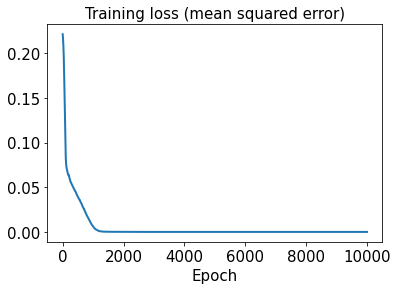

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

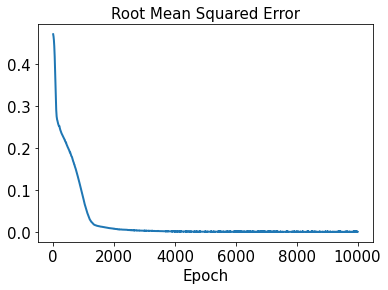

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
test_results1 = sd1.evaluate(t_test)

1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [25]:
decoded_train1 = sd1.predict(t_train)

In [26]:
decoded_test1 = sd1.predict(t_test)

In [27]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [28]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [29]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.001377008778325912


In [30]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.0022113380261202186


In [31]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.0009468584473521375, 0.0012927680755818682, 0.001203295523963467, 0.001620285582291502, 0.0017847093064796628, 0.0015823036645364543, 0.001470790015161964, 0.000831605407537673, 0.0016940557019569863, 0.0018289813318955403, 0.0008374833131248783, 0.001366915255022616, 0.001119561932129553, 0.0015601132439737317, 0.001422512864922236, 0.000793414575096906, 0.0013173185162693186, 0.0013132549298891048, 0.0008255347267670783, 0.0016986799135924784, 0.0014869958598913223, 0.0015033513527519023, 0.0017155925500364534, 0.000995092619669886, 0.0005331299542312064, 0.0011889506331138656, 0.0012725057224721528, 0.0011878700041867553, 0.0013089519947867049, 0.0016367841173736747, 0.0018816871692373242, 0.0010959690569452344, 0.0018629616590519515]


In [32]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.001180166796567487, 0.0018208430048166308, 0.0025529467621296185, 0.0018481994062220653, 0.0024202074624549356, 0.0037999780463412168, 0.0011993757109035226, 0.0028465600463736117]


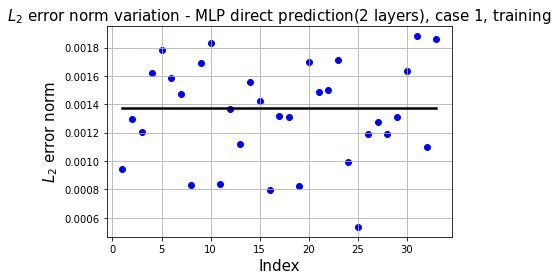

In [33]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

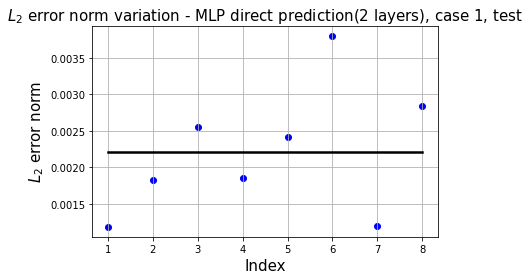

In [34]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

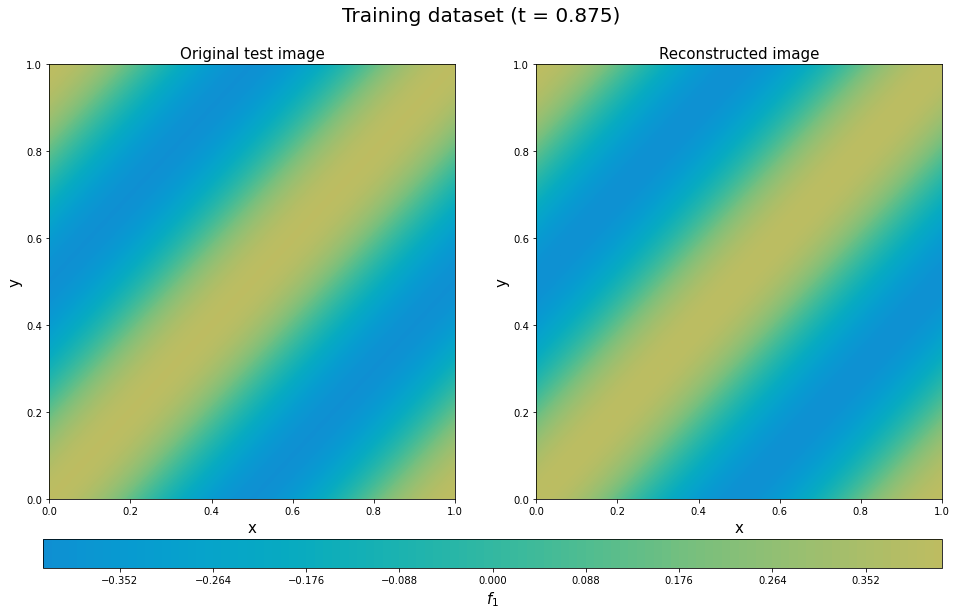

In [35]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

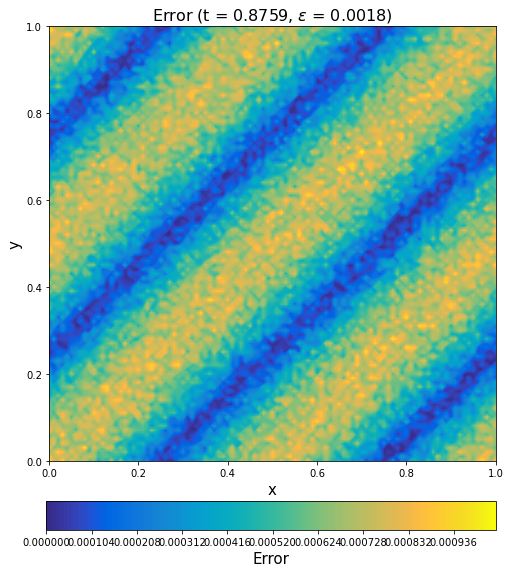

In [36]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.8759, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

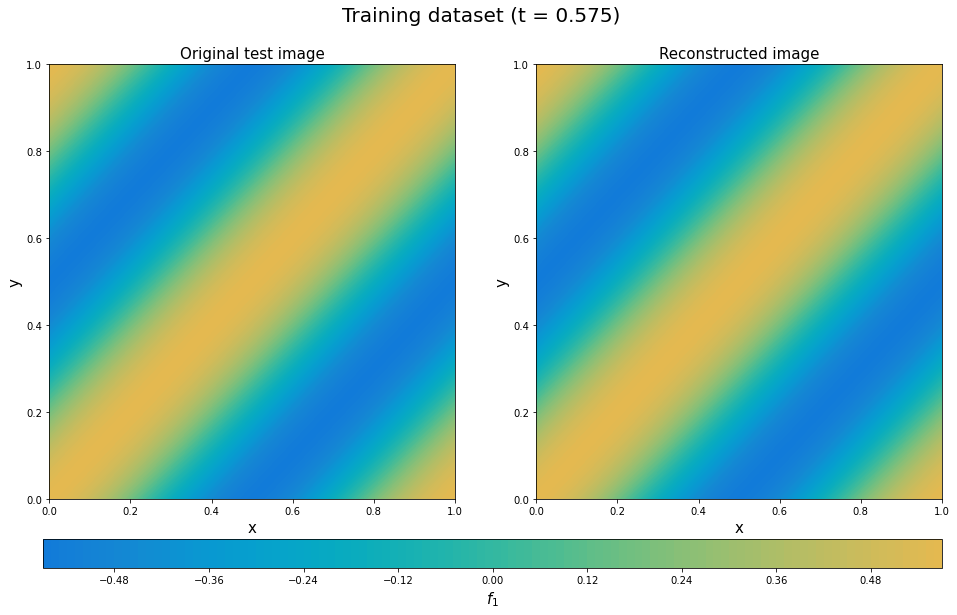

In [37]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

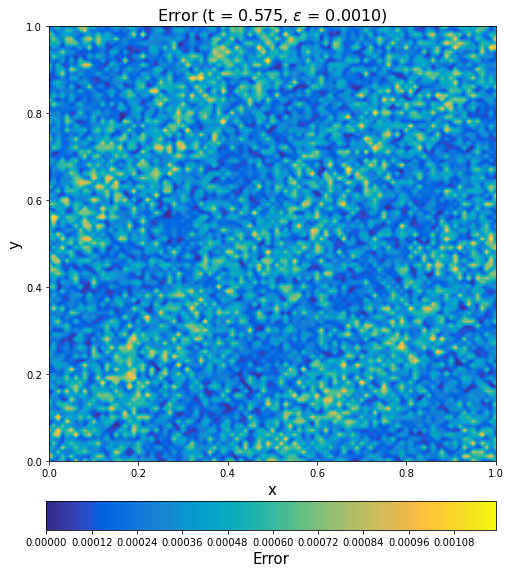

In [38]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

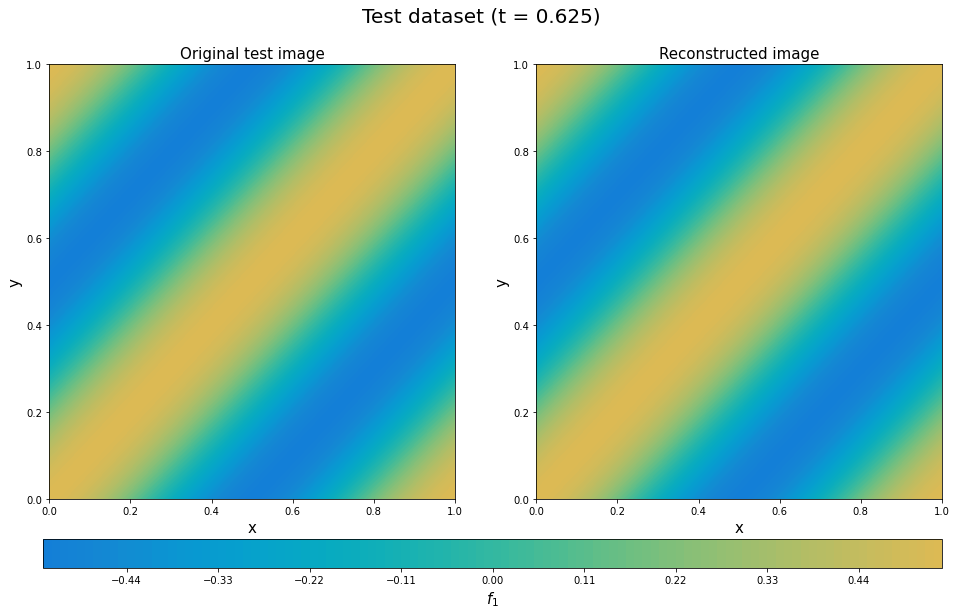

In [39]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

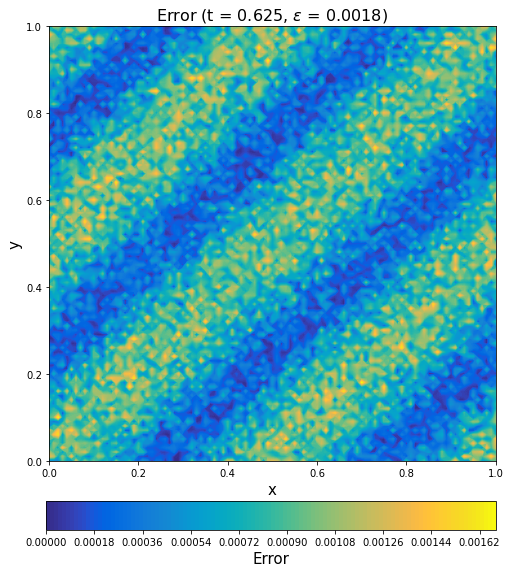

In [40]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

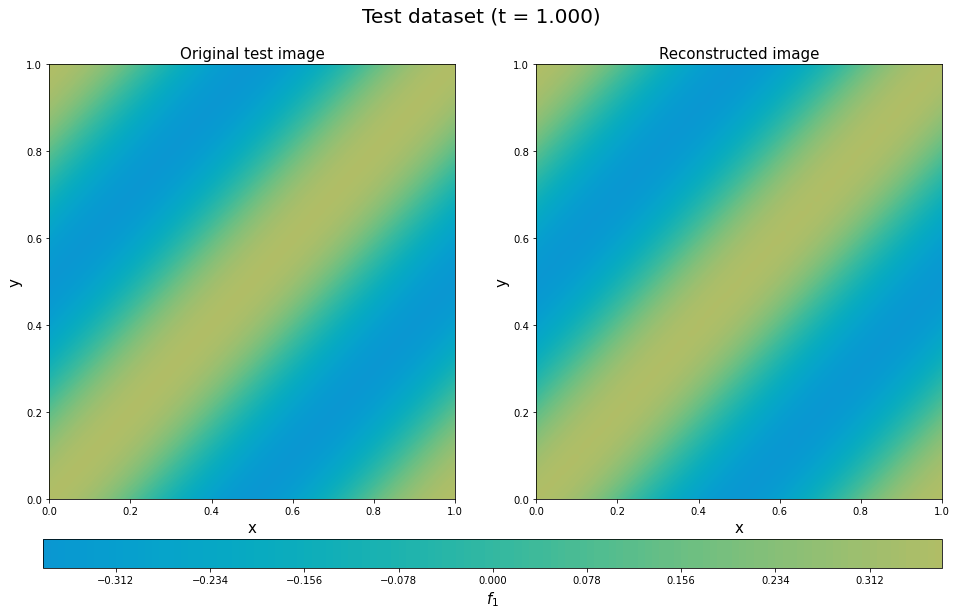

In [41]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

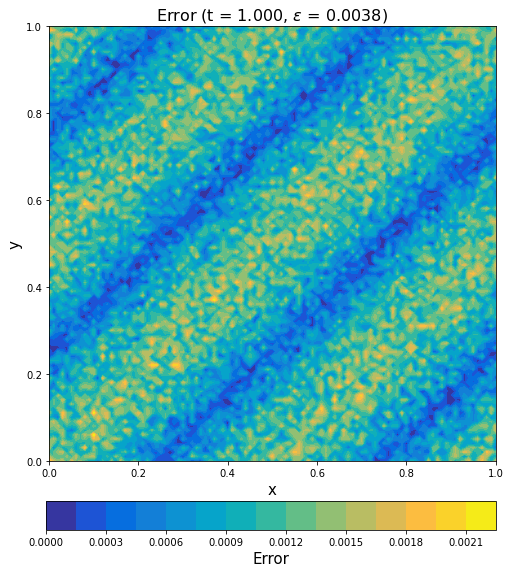

In [42]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [43]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [44]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [45]:
sensor2 = sensor2.reshape((41, 16, 1))

In [46]:
sensor2.shape

(41, 16, 1)

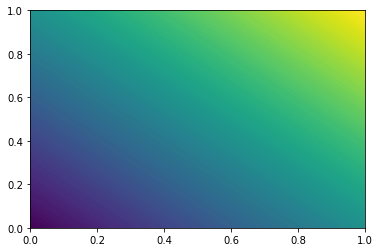

In [47]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [48]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [49]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [50]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [51]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [52]:
start2 = datetime.datetime.now()
history2 = sd2.fit(t_train, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6981 - rmse: 1.6426
Epoch 2/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6873 - rmse: 1.6393
Epoch 3/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6767 - rmse: 1.6361
Epoch 4/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6662 - rmse: 1.6328
Epoch 5/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6559 - rmse: 1.6297
Epoch 6/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6459 - rmse: 1.6266
Epoch 7/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6361 - rmse: 1.6236
Epoch 8/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6266 - rmse: 1.6207
Epoch 9/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6173 - rmse: 1.6178
Epoch 10/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6081 - rmse: 1.6150
Epoch 11/10000
2/2 [======================

2/2 [==============================] - 0s 3ms/step - loss: 2.1276 - rmse: 1.4586
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1189 - rmse: 1.4556
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1100 - rmse: 1.4526
Epoch 89/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1011 - rmse: 1.4495
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0921 - rmse: 1.4464
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0831 - rmse: 1.4433
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0738 - rmse: 1.4401
Epoch 93/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0644 - rmse: 1.4368
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0547 - rmse: 1.4334
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0444 - rmse: 1.4298
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 1.0701 - rmse: 1.0345
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0565 - rmse: 1.0279
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0428 - rmse: 1.0212
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0291 - rmse: 1.0145
Epoch 174/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0156 - rmse: 1.0078
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0020 - rmse: 1.0010
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9886 - rmse: 0.9943
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9757 - rmse: 0.9878
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9631 - rmse: 0.9814
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9503 - rmse: 0.9748
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.2740 - rmse: 0.5234
Epoch 255/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2689 - rmse: 0.5185
Epoch 256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2638 - rmse: 0.5136
Epoch 257/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2587 - rmse: 0.5087
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2539 - rmse: 0.5038
Epoch 259/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2490 - rmse: 0.4990
Epoch 260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2442 - rmse: 0.4941
Epoch 261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2393 - rmse: 0.4892
Epoch 262/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2347 - rmse: 0.4844
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2302 - rmse: 0.4797
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0522 - rmse: 0.2284
Epoch 339/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0513 - rmse: 0.2264
Epoch 340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0504 - rmse: 0.2244
Epoch 341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0495 - rmse: 0.2225
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0486 - rmse: 0.2205
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0478 - rmse: 0.2186
Epoch 344/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0470 - rmse: 0.2167
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0462 - rmse: 0.2149
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0454 - rmse: 0.2131
Epoch 347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0447 - rmse: 0.2114
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 423/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 425/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1355
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1133
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1131
Epoch 508/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0127 - rmse: 0.1129
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1127
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1126
Epoch 511/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0127 - rmse: 0.1125
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1124
Epoch 513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0126 - rmse: 0.1122
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1120
Epoch 515/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0125 - rmse: 0.1118
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0104 - rmse: 0.1019
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1018
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1017
Epoch 593/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 595/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 597/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 599/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0929
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0928
Epoch 676/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0086 - rmse: 0.0927
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0927
Epoch 678/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0086 - rmse: 0.0926
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0925
Epoch 680/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0085 - rmse: 0.0924
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0923
Epoch 682/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0085 - rmse: 0.0923
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0922
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0863
Epoch 760/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0863
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0862
Epoch 762/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0861
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0861
Epoch 764/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 766/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 843/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 846/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 851/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 927/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 929/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 931/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 933/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 935/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 1011/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 1014/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 1019/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0717
Epoch 1094/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0717
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0716
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0716
Epoch 1097/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 1099/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0714
Epoch 1101/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0714
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0714
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 1177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 1179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 1180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 1181/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 1183/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0701
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0702
Epoch 1185/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0682
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 1264/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 1267/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 1345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 1347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 1349/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0667
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0667
Epoch 1351/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0044 - rmse: 0.0667
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 1429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 1431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 1432/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 1434/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 1509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 1511/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 1512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 1513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0636
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 1515/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 1594/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 1596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 1597/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 1599/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 1678/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 1680/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 1681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 1682/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 1683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 1758/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 1761/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 1763/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0578
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1841/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1846/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1925/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 2007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 2008/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 2009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 2012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 2013/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 2015/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 2091/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 2092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 2097/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 2098/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 2173/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 2174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 2176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 2180/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 2256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 2259/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 2261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 2262/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 2263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 2264/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 2339/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 2341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 2342/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 2344/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 9.1101e-04 - rmse: 0.0302
Epoch 2422/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0681e-04 - rmse: 0.0301
Epoch 2423/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.0329e-04 - rmse: 0.0301
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9969e-04 - rmse: 0.0300
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9762e-04 - rmse: 0.0300
Epoch 2426/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9414e-04 - rmse: 0.0299
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8902e-04 - rmse: 0.0298
Epoch 2428/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8436e-04 - rmse: 0.0297
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7997e-04 - rmse: 0.0297
Epoch 2430/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7615e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 6.7085e-04 - rmse: 0.0259
Epoch 2502/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7114e-04 - rmse: 0.0259
Epoch 2503/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7235e-04 - rmse: 0.0259
Epoch 2504/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7594e-04 - rmse: 0.0260
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8045e-04 - rmse: 0.0261
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8333e-04 - rmse: 0.0261
Epoch 2507/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8695e-04 - rmse: 0.0262
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9138e-04 - rmse: 0.0263
Epoch 2509/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9780e-04 - rmse: 0.0264
Epoch 2510/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0057e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.6910e-04 - rmse: 0.0217
Epoch 2582/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6704e-04 - rmse: 0.0216
Epoch 2583/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6465e-04 - rmse: 0.0216
Epoch 2584/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6236e-04 - rmse: 0.0215
Epoch 2585/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6181e-04 - rmse: 0.0215
Epoch 2586/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5940e-04 - rmse: 0.0214
Epoch 2587/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5692e-04 - rmse: 0.0214
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5514e-04 - rmse: 0.0213
Epoch 2589/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5350e-04 - rmse: 0.0213
Epoch 2590/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5219e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 3.1427e-04 - rmse: 0.0177
Epoch 2662/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1270e-04 - rmse: 0.0177
Epoch 2663/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1137e-04 - rmse: 0.0176
Epoch 2664/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1016e-04 - rmse: 0.0176
Epoch 2665/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0902e-04 - rmse: 0.0176
Epoch 2666/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0788e-04 - rmse: 0.0175
Epoch 2667/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0674e-04 - rmse: 0.0175
Epoch 2668/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0532e-04 - rmse: 0.0175
Epoch 2669/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0389e-04 - rmse: 0.0174
Epoch 2670/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0284e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 2.1364e-04 - rmse: 0.0146
Epoch 2742/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1334e-04 - rmse: 0.0146
Epoch 2743/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1254e-04 - rmse: 0.0146
Epoch 2744/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1121e-04 - rmse: 0.0145
Epoch 2745/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0974e-04 - rmse: 0.0145
Epoch 2746/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0824e-04 - rmse: 0.0144
Epoch 2747/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0670e-04 - rmse: 0.0144
Epoch 2748/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0576e-04 - rmse: 0.0143
Epoch 2749/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0440e-04 - rmse: 0.0143
Epoch 2750/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0330e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.3580e-04 - rmse: 0.0117
Epoch 2822/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3358e-04 - rmse: 0.0116
Epoch 2823/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3206e-04 - rmse: 0.0115
Epoch 2824/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3121e-04 - rmse: 0.0115
Epoch 2825/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3062e-04 - rmse: 0.0114
Epoch 2826/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3019e-04 - rmse: 0.0114
Epoch 2827/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2974e-04 - rmse: 0.0114
Epoch 2828/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2925e-04 - rmse: 0.0114
Epoch 2829/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2860e-04 - rmse: 0.0113
Epoch 2830/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2774e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 8.4882e-05 - rmse: 0.0092
Epoch 2902/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4406e-05 - rmse: 0.0092
Epoch 2903/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3678e-05 - rmse: 0.0091
Epoch 2904/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2565e-05 - rmse: 0.0091
Epoch 2905/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1589e-05 - rmse: 0.0090
Epoch 2906/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0539e-05 - rmse: 0.0090
Epoch 2907/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0483e-05 - rmse: 0.0090
Epoch 2908/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0260e-05 - rmse: 0.0090
Epoch 2909/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0417e-05 - rmse: 0.0090
Epoch 2910/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0882e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 5.2739e-05 - rmse: 0.0073
Epoch 2982/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2559e-05 - rmse: 0.0072
Epoch 2983/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2239e-05 - rmse: 0.0072
Epoch 2984/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1897e-05 - rmse: 0.0072
Epoch 2985/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1587e-05 - rmse: 0.0072
Epoch 2986/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1219e-05 - rmse: 0.0072
Epoch 2987/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0933e-05 - rmse: 0.0071
Epoch 2988/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0553e-05 - rmse: 0.0071
Epoch 2989/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0214e-05 - rmse: 0.0071
Epoch 2990/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9904e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 3.2313e-05 - rmse: 0.0057
Epoch 3062/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2318e-05 - rmse: 0.0057
Epoch 3063/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2199e-05 - rmse: 0.0057
Epoch 3064/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1969e-05 - rmse: 0.0057
Epoch 3065/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1581e-05 - rmse: 0.0056
Epoch 3066/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1171e-05 - rmse: 0.0056
Epoch 3067/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0879e-05 - rmse: 0.0056
Epoch 3068/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0685e-05 - rmse: 0.0055
Epoch 3069/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0530e-05 - rmse: 0.0055
Epoch 3070/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0363e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.1819e-05 - rmse: 0.0047
Epoch 3142/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1981e-05 - rmse: 0.0047
Epoch 3143/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2032e-05 - rmse: 0.0047
Epoch 3144/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1690e-05 - rmse: 0.0047
Epoch 3145/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1161e-05 - rmse: 0.0046
Epoch 3146/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0610e-05 - rmse: 0.0045
Epoch 3147/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9885e-05 - rmse: 0.0045
Epoch 3148/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9280e-05 - rmse: 0.0044
Epoch 3149/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8767e-05 - rmse: 0.0043
Epoch 3150/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8570e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.1711e-05 - rmse: 0.0034
Epoch 3222/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1637e-05 - rmse: 0.0034
Epoch 3223/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1536e-05 - rmse: 0.0034
Epoch 3224/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1468e-05 - rmse: 0.0034
Epoch 3225/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1424e-05 - rmse: 0.0034
Epoch 3226/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1349e-05 - rmse: 0.0034
Epoch 3227/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1269e-05 - rmse: 0.0034
Epoch 3228/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1206e-05 - rmse: 0.0033
Epoch 3229/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1140e-05 - rmse: 0.0033
Epoch 3230/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1109e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 6.9135e-06 - rmse: 0.0026
Epoch 3302/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8867e-06 - rmse: 0.0026
Epoch 3303/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9018e-06 - rmse: 0.0026
Epoch 3304/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9390e-06 - rmse: 0.0026
Epoch 3305/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0253e-06 - rmse: 0.0027
Epoch 3306/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1596e-06 - rmse: 0.0027
Epoch 3307/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3203e-06 - rmse: 0.0027
Epoch 3308/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3117e-06 - rmse: 0.0027
Epoch 3309/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1635e-06 - rmse: 0.0027
Epoch 3310/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9914e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.3487e-06 - rmse: 0.0021
Epoch 3382/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2098e-06 - rmse: 0.0021
Epoch 3383/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1189e-06 - rmse: 0.0020
Epoch 3384/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0917e-06 - rmse: 0.0020
Epoch 3385/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1324e-06 - rmse: 0.0020
Epoch 3386/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2238e-06 - rmse: 0.0021
Epoch 3387/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3349e-06 - rmse: 0.0021
Epoch 3388/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3151e-06 - rmse: 0.0021
Epoch 3389/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2826e-06 - rmse: 0.0021
Epoch 3390/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3006e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.4174e-06 - rmse: 0.0016
Epoch 3462/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3826e-06 - rmse: 0.0015
Epoch 3463/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3499e-06 - rmse: 0.0015
Epoch 3464/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3342e-06 - rmse: 0.0015
Epoch 3465/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3299e-06 - rmse: 0.0015
Epoch 3466/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3346e-06 - rmse: 0.0015
Epoch 3467/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3504e-06 - rmse: 0.0015
Epoch 3468/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3865e-06 - rmse: 0.0015
Epoch 3469/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4066e-06 - rmse: 0.0016
Epoch 3470/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4455e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.4239e-06 - rmse: 0.0012
Epoch 3542/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4333e-06 - rmse: 0.0012
Epoch 3543/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4445e-06 - rmse: 0.0012
Epoch 3544/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4361e-06 - rmse: 0.0012
Epoch 3545/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4179e-06 - rmse: 0.0012
Epoch 3546/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4061e-06 - rmse: 0.0012
Epoch 3547/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3982e-06 - rmse: 0.0012
Epoch 3548/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3910e-06 - rmse: 0.0012
Epoch 3549/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3916e-06 - rmse: 0.0012
Epoch 3550/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4004e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 8.8198e-07 - rmse: 9.3914e-04
Epoch 3621/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7735e-07 - rmse: 9.3667e-04
Epoch 3622/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8855e-07 - rmse: 9.4263e-04
Epoch 3623/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1191e-07 - rmse: 9.5494e-04
Epoch 3624/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9970e-07 - rmse: 9.4853e-04
Epoch 3625/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7070e-07 - rmse: 9.3312e-04
Epoch 3626/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5717e-07 - rmse: 9.2583e-04
Epoch 3627/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5483e-07 - rmse: 9.2457e-04
Epoch 3628/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6293e-07 - rmse: 9.2894e-04
Epoch 3629/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.8913e-07 - rmse: 7.6754e-04
Epoch 3698/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8914e-07 - rmse: 7.6755e-04
Epoch 3699/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9131e-07 - rmse: 7.6897e-04
Epoch 3700/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0482e-07 - rmse: 7.7770e-04
Epoch 3701/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2642e-07 - rmse: 7.9147e-04
Epoch 3702/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2481e-07 - rmse: 7.9045e-04
Epoch 3703/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9877e-07 - rmse: 7.7380e-04
Epoch 3704/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0651e-07 - rmse: 7.7879e-04
Epoch 3705/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4306e-07 - rmse: 8.0191e-04
Epoch 3706/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.9870e-07 - rmse: 6.3143e-04
Epoch 3775/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0171e-07 - rmse: 6.3381e-04
Epoch 3776/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0812e-07 - rmse: 6.3884e-04
Epoch 3777/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1000e-07 - rmse: 6.4031e-04
Epoch 3778/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1026e-07 - rmse: 6.4052e-04
Epoch 3779/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3228e-07 - rmse: 6.5748e-04
Epoch 3780/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5204e-07 - rmse: 6.7234e-04
Epoch 3781/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3229e-07 - rmse: 6.5748e-04
Epoch 3782/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9039e-07 - rmse: 6.2481e-04
Epoch 3783/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.9466e-07 - rmse: 5.4283e-04
Epoch 3852/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1083e-07 - rmse: 5.5752e-04
Epoch 3853/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2793e-07 - rmse: 5.7265e-04
Epoch 3854/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2336e-07 - rmse: 5.6864e-04
Epoch 3855/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0837e-07 - rmse: 5.5531e-04
Epoch 3856/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9611e-07 - rmse: 5.4416e-04
Epoch 3857/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9052e-07 - rmse: 5.3900e-04
Epoch 3858/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8733e-07 - rmse: 5.3604e-04
Epoch 3859/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8054e-07 - rmse: 5.2966e-04
Epoch 3860/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.4283e-07 - rmse: 4.9278e-04
Epoch 3929/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4452e-07 - rmse: 4.9449e-04
Epoch 3930/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3079e-07 - rmse: 4.8040e-04
Epoch 3931/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2774e-07 - rmse: 4.7722e-04
Epoch 3932/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2996e-07 - rmse: 4.7954e-04
Epoch 3933/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2814e-07 - rmse: 4.7764e-04
Epoch 3934/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2447e-07 - rmse: 4.7379e-04
Epoch 3935/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2192e-07 - rmse: 4.7108e-04
Epoch 3936/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2253e-07 - rmse: 4.7173e-04
Epoch 3937/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.2787e-07 - rmse: 4.7736e-04
Epoch 4006/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0712e-07 - rmse: 4.5510e-04
Epoch 4007/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0091e-07 - rmse: 4.4823e-04
Epoch 4008/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1862e-07 - rmse: 4.6757e-04
Epoch 4009/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1344e-07 - rmse: 4.6199e-04
Epoch 4010/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9562e-07 - rmse: 4.4229e-04
Epoch 4011/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9216e-07 - rmse: 4.3836e-04
Epoch 4012/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0042e-07 - rmse: 4.4768e-04
Epoch 4013/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0501e-07 - rmse: 4.5278e-04
Epoch 4014/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.5074e-07 - rmse: 5.0074e-04
Epoch 4083/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3094e-07 - rmse: 4.8056e-04
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8972e-07 - rmse: 4.3557e-04
Epoch 4085/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9203e-07 - rmse: 4.3821e-04
Epoch 4086/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8949e-07 - rmse: 4.3530e-04
Epoch 4087/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7006e-07 - rmse: 4.1238e-04
Epoch 4088/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5984e-07 - rmse: 3.9980e-04
Epoch 4089/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7636e-07 - rmse: 4.1996e-04
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7617e-07 - rmse: 4.1972e-04
Epoch 4091/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4723e-07 - rmse: 3.8371e-04
Epoch 4160/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4562e-07 - rmse: 3.8161e-04
Epoch 4161/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4993e-07 - rmse: 3.8721e-04
Epoch 4162/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5267e-07 - rmse: 3.9073e-04
Epoch 4163/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5046e-07 - rmse: 3.8789e-04
Epoch 4164/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5185e-07 - rmse: 3.8969e-04
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4628e-07 - rmse: 3.8247e-04
Epoch 4166/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4033e-07 - rmse: 3.7461e-04
Epoch 4167/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5714e-07 - rmse: 3.9640e-04
Epoch 4168/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.3009e-07 - rmse: 3.6068e-04
Epoch 4237/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4223e-07 - rmse: 3.7714e-04
Epoch 4238/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3360e-07 - rmse: 3.6551e-04
Epoch 4239/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3876e-07 - rmse: 3.7251e-04
Epoch 4240/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6078e-07 - rmse: 4.0098e-04
Epoch 4241/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4686e-07 - rmse: 3.8322e-04
Epoch 4242/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3106e-07 - rmse: 3.6202e-04
Epoch 4243/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3192e-07 - rmse: 3.6320e-04
Epoch 4244/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3069e-07 - rmse: 3.6151e-04
Epoch 4245/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.8730e-07 - rmse: 4.3278e-04
Epoch 4314/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7981e-07 - rmse: 4.2405e-04
Epoch 4315/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3515e-07 - rmse: 3.6763e-04
Epoch 4316/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4805e-07 - rmse: 3.8477e-04
Epoch 4317/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0510e-07 - rmse: 4.5288e-04
Epoch 4318/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7399e-07 - rmse: 4.1712e-04
Epoch 4319/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2368e-07 - rmse: 3.5169e-04
Epoch 4320/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8346e-07 - rmse: 4.2832e-04
Epoch 4321/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8926e-07 - rmse: 4.3504e-04
Epoch 4322/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.1643e-07 - rmse: 3.4121e-04
Epoch 4391/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2640e-07 - rmse: 3.5552e-04
Epoch 4392/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3701e-07 - rmse: 3.7015e-04
Epoch 4393/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2995e-07 - rmse: 3.6048e-04
Epoch 4394/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2290e-07 - rmse: 3.5057e-04
Epoch 4395/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1979e-07 - rmse: 3.4611e-04
Epoch 4396/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1600e-07 - rmse: 3.4059e-04
Epoch 4397/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1560e-07 - rmse: 3.4001e-04
Epoch 4398/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1639e-07 - rmse: 3.4115e-04
Epoch 4399/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.1738e-07 - rmse: 3.4261e-04
Epoch 4468/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2167e-07 - rmse: 3.4881e-04
Epoch 4469/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2411e-07 - rmse: 3.5230e-04
Epoch 4470/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1322e-07 - rmse: 3.3649e-04
Epoch 4471/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1238e-07 - rmse: 3.3524e-04
Epoch 4472/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1690e-07 - rmse: 3.4191e-04
Epoch 4473/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1570e-07 - rmse: 3.4015e-04
Epoch 4474/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1126e-07 - rmse: 3.3355e-04
Epoch 4475/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1085e-07 - rmse: 3.3295e-04
Epoch 4476/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.3089e-07 - rmse: 3.6179e-04
Epoch 4545/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0014e-07 - rmse: 3.1645e-04
Epoch 4546/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1719e-07 - rmse: 3.4233e-04
Epoch 4547/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1891e-07 - rmse: 3.4483e-04
Epoch 4548/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9545e-08 - rmse: 3.1551e-04
Epoch 4549/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0634e-07 - rmse: 3.2610e-04
Epoch 4550/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1360e-07 - rmse: 3.3704e-04
Epoch 4551/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0153e-07 - rmse: 3.1864e-04
Epoch 4552/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0197e-07 - rmse: 3.1933e-04
Epoch 4553/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.6218e-08 - rmse: 3.1019e-04
Epoch 4622/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3662e-08 - rmse: 3.0604e-04
Epoch 4623/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1571e-08 - rmse: 3.0261e-04
Epoch 4624/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2490e-08 - rmse: 3.0412e-04
Epoch 4625/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3239e-08 - rmse: 3.0535e-04
Epoch 4626/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2774e-08 - rmse: 3.0459e-04
Epoch 4627/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1199e-08 - rmse: 3.0199e-04
Epoch 4628/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1038e-08 - rmse: 3.0173e-04
Epoch 4629/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3797e-08 - rmse: 3.0626e-04
Epoch 4630/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.0072e-08 - rmse: 3.0012e-04
Epoch 4699/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2456e-07 - rmse: 3.5293e-04
Epoch 4700/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5776e-07 - rmse: 3.9719e-04
Epoch 4701/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0539e-07 - rmse: 3.2465e-04
Epoch 4702/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0148e-07 - rmse: 3.1855e-04
Epoch 4703/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0327e-07 - rmse: 3.2135e-04
Epoch 4704/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1513e-08 - rmse: 3.0251e-04
Epoch 4705/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9631e-08 - rmse: 2.9938e-04
Epoch 4706/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1183e-07 - rmse: 3.3441e-04
Epoch 4707/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.1024e-07 - rmse: 3.3202e-04
Epoch 4776/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2064e-08 - rmse: 3.0342e-04
Epoch 4777/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3104e-08 - rmse: 2.8828e-04
Epoch 4778/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2935e-08 - rmse: 3.0485e-04
Epoch 4779/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7921e-08 - rmse: 2.9652e-04
Epoch 4780/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2156e-08 - rmse: 2.8663e-04
Epoch 4781/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9990e-08 - rmse: 3.1621e-04
Epoch 4782/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4179e-08 - rmse: 3.0689e-04
Epoch 4783/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1307e-08 - rmse: 2.8514e-04
Epoch 4784/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 8.4921e-08 - rmse: 2.9141e-04
Epoch 4853/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2366e-08 - rmse: 2.6901e-04
Epoch 4854/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6250e-08 - rmse: 2.7613e-04
Epoch 4855/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2688e-08 - rmse: 2.6961e-04
Epoch 4856/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1256e-08 - rmse: 2.6694e-04
Epoch 4857/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3221e-08 - rmse: 2.7059e-04
Epoch 4858/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8531e-08 - rmse: 2.9754e-04
Epoch 4859/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7849e-08 - rmse: 2.9639e-04
Epoch 4860/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9103e-08 - rmse: 2.8125e-04
Epoch 4861/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.2666e-08 - rmse: 3.0441e-04
Epoch 4930/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4984e-08 - rmse: 2.9152e-04
Epoch 4931/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4182e-08 - rmse: 2.7236e-04
Epoch 4932/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6201e-08 - rmse: 2.9360e-04
Epoch 4933/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1265e-08 - rmse: 2.8507e-04
Epoch 4934/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7402e-08 - rmse: 2.5962e-04
Epoch 4935/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5014e-08 - rmse: 2.7389e-04
Epoch 4936/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0045e-08 - rmse: 2.6466e-04
Epoch 4937/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7501e-08 - rmse: 2.5981e-04
Epoch 4938/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.0561e-07 - rmse: 3.2498e-04
Epoch 5007/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6131e-08 - rmse: 2.9348e-04
Epoch 5008/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3588e-08 - rmse: 2.8912e-04
Epoch 5009/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1591e-07 - rmse: 3.4045e-04
Epoch 5010/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0121e-07 - rmse: 3.1814e-04
Epoch 5011/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7471e-08 - rmse: 2.5975e-04
Epoch 5012/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0746e-07 - rmse: 3.2782e-04
Epoch 5013/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5771e-08 - rmse: 2.7526e-04
Epoch 5014/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2162e-08 - rmse: 2.6863e-04
Epoch 5015/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.4045e-08 - rmse: 2.8991e-04
Epoch 5084/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5939e-08 - rmse: 2.7557e-04
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3477e-08 - rmse: 2.5195e-04
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2929e-08 - rmse: 2.7005e-04
Epoch 5087/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1999e-08 - rmse: 2.4900e-04
Epoch 5088/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5562e-08 - rmse: 2.5605e-04
Epoch 5089/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1794e-08 - rmse: 2.4858e-04
Epoch 5090/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9680e-08 - rmse: 2.4429e-04
Epoch 5091/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0480e-08 - rmse: 2.4593e-04
Epoch 5092/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.5262e-08 - rmse: 2.3508e-04
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9201e-08 - rmse: 2.4331e-04
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9129e-08 - rmse: 2.4316e-04
Epoch 5163/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4693e-08 - rmse: 2.3387e-04
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8694e-08 - rmse: 2.6210e-04
Epoch 5165/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1977e-08 - rmse: 2.4895e-04
Epoch 5166/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7390e-08 - rmse: 2.3956e-04
Epoch 5167/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3765e-08 - rmse: 2.5252e-04
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3396e-08 - rmse: 2.3108e-04
Epoch 5169/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.1414e-08 - rmse: 2.2675e-04
Epoch 5238/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3935e-08 - rmse: 2.3224e-04
Epoch 5239/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2827e-08 - rmse: 2.2984e-04
Epoch 5240/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0859e-08 - rmse: 2.2552e-04
Epoch 5241/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6147e-08 - rmse: 2.9351e-04
Epoch 5242/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3276e-07 - rmse: 3.6436e-04
Epoch 5243/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6692e-08 - rmse: 2.9443e-04
Epoch 5244/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1639e-07 - rmse: 3.4116e-04
Epoch 5245/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8805e-08 - rmse: 2.9800e-04
Epoch 5246/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.6053e-08 - rmse: 2.3675e-04
Epoch 5315/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6157e-08 - rmse: 2.1484e-04
Epoch 5316/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5756e-08 - rmse: 2.3613e-04
Epoch 5317/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8148e-08 - rmse: 2.1943e-04
Epoch 5318/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1359e-08 - rmse: 2.2662e-04
Epoch 5319/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7364e-08 - rmse: 2.1763e-04
Epoch 5320/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7948e-08 - rmse: 2.1897e-04
Epoch 5321/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6796e-08 - rmse: 2.1632e-04
Epoch 5322/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4785e-08 - rmse: 2.3406e-04
Epoch 5323/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 4.5516e-08 - rmse: 2.1334e-04
Epoch 5392/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4992e-08 - rmse: 2.1211e-04
Epoch 5393/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7375e-08 - rmse: 2.1766e-04
Epoch 5394/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8525e-08 - rmse: 2.2028e-04
Epoch 5395/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8002e-08 - rmse: 2.1909e-04
Epoch 5396/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5651e-08 - rmse: 2.1366e-04
Epoch 5397/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4122e-08 - rmse: 2.1005e-04
Epoch 5398/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3816e-08 - rmse: 2.0932e-04
Epoch 5399/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6043e-08 - rmse: 2.1458e-04
Epoch 5400/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.0757e-08 - rmse: 2.0188e-04
Epoch 5469/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9230e-08 - rmse: 1.9806e-04
Epoch 5470/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0897e-08 - rmse: 2.0223e-04
Epoch 5471/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5416e-08 - rmse: 2.1311e-04
Epoch 5472/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1600e-08 - rmse: 2.0396e-04
Epoch 5473/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9492e-08 - rmse: 1.9873e-04
Epoch 5474/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2425e-08 - rmse: 2.2896e-04
Epoch 5475/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4731e-08 - rmse: 2.1150e-04
Epoch 5476/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1295e-08 - rmse: 2.0321e-04
Epoch 5477/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 4.0327e-08 - rmse: 2.0082e-04
Epoch 5546/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2003e-08 - rmse: 2.4900e-04
Epoch 5547/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5530e-08 - rmse: 2.1338e-04
Epoch 5548/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8374e-08 - rmse: 1.9589e-04
Epoch 5549/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7302e-08 - rmse: 1.9314e-04
Epoch 5550/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6893e-08 - rmse: 1.9208e-04
Epoch 5551/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5188e-08 - rmse: 1.8759e-04
Epoch 5552/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5548e-08 - rmse: 1.8854e-04
Epoch 5553/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6706e-08 - rmse: 1.9159e-04
Epoch 5554/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 4.3343e-08 - rmse: 2.0819e-04
Epoch 5623/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4005e-08 - rmse: 2.0977e-04
Epoch 5624/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0116e-08 - rmse: 2.0029e-04
Epoch 5625/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3694e-08 - rmse: 2.0903e-04
Epoch 5626/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9856e-08 - rmse: 2.2328e-04
Epoch 5627/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5094e-08 - rmse: 1.8733e-04
Epoch 5628/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3611e-07 - rmse: 3.6893e-04
Epoch 5629/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2967e-08 - rmse: 2.8804e-04
Epoch 5630/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4297e-07 - rmse: 3.7811e-04
Epoch 5631/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.5743e-08 - rmse: 1.8906e-04
Epoch 5700/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6336e-08 - rmse: 1.9062e-04
Epoch 5701/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1112e-08 - rmse: 2.2608e-04
Epoch 5702/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5446e-08 - rmse: 2.7467e-04
Epoch 5703/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3029e-08 - rmse: 2.7024e-04
Epoch 5704/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0959e-08 - rmse: 2.0238e-04
Epoch 5705/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1604e-08 - rmse: 2.8566e-04
Epoch 5706/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0755e-08 - rmse: 2.2529e-04
Epoch 5707/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2173e-08 - rmse: 2.2841e-04
Epoch 5708/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.7268e-08 - rmse: 1.6513e-04
Epoch 5777/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6678e-08 - rmse: 1.6333e-04
Epoch 5778/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6872e-08 - rmse: 1.6393e-04
Epoch 5779/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6858e-08 - rmse: 1.6388e-04
Epoch 5780/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6627e-08 - rmse: 1.6318e-04
Epoch 5781/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6253e-08 - rmse: 1.6203e-04
Epoch 5782/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6553e-08 - rmse: 1.6295e-04
Epoch 5783/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6193e-08 - rmse: 1.6184e-04
Epoch 5784/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5820e-08 - rmse: 1.6069e-04
Epoch 5785/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.5427e-08 - rmse: 1.5946e-04
Epoch 5854/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5122e-08 - rmse: 1.5850e-04
Epoch 5855/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6071e-08 - rmse: 1.6147e-04
Epoch 5856/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1948e-08 - rmse: 2.8627e-04
Epoch 5857/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7030e-08 - rmse: 2.7754e-04
Epoch 5858/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0795e-07 - rmse: 3.2856e-04
Epoch 5859/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3327e-08 - rmse: 2.0815e-04
Epoch 5860/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6424e-07 - rmse: 4.0527e-04
Epoch 5861/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8647e-08 - rmse: 2.8044e-04
Epoch 5862/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.7686e-08 - rmse: 1.6639e-04
Epoch 5931/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2766e-08 - rmse: 1.5089e-04
Epoch 5932/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2495e-08 - rmse: 1.8026e-04
Epoch 5933/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2499e-08 - rmse: 1.5000e-04
Epoch 5934/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7303e-08 - rmse: 1.6524e-04
Epoch 5935/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3800e-08 - rmse: 1.5427e-04
Epoch 5936/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1347e-08 - rmse: 1.7705e-04
Epoch 5937/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2403e-08 - rmse: 1.4967e-04
Epoch 5938/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4196e-08 - rmse: 1.5555e-04
Epoch 5939/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 4.2087e-08 - rmse: 2.0515e-04
Epoch 6008/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6223e-08 - rmse: 2.7608e-04
Epoch 6009/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2661e-08 - rmse: 2.0655e-04
Epoch 6010/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9838e-08 - rmse: 2.4462e-04
Epoch 6011/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2244e-08 - rmse: 1.7956e-04
Epoch 6012/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7797e-08 - rmse: 1.9442e-04
Epoch 6013/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1591e-08 - rmse: 2.0394e-04
Epoch 6014/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2643e-08 - rmse: 1.8067e-04
Epoch 6015/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0142e-08 - rmse: 2.0035e-04
Epoch 6016/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.9070e-08 - rmse: 1.7050e-04
Epoch 6085/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0755e-08 - rmse: 1.7537e-04
Epoch 6086/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4191e-08 - rmse: 2.3279e-04
Epoch 6087/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1994e-08 - rmse: 1.4831e-04
Epoch 6088/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4225e-08 - rmse: 1.8500e-04
Epoch 6089/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6610e-08 - rmse: 2.1589e-04
Epoch 6090/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9451e-08 - rmse: 1.3947e-04
Epoch 6091/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7531e-08 - rmse: 2.1802e-04
Epoch 6092/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0814e-08 - rmse: 1.7554e-04
Epoch 6093/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.6391e-08 - rmse: 1.2803e-04
Epoch 6162/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6215e-08 - rmse: 1.2734e-04
Epoch 6163/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6462e-08 - rmse: 1.2830e-04
Epoch 6164/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6734e-08 - rmse: 1.2936e-04
Epoch 6165/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6423e-08 - rmse: 1.2815e-04
Epoch 6166/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6358e-08 - rmse: 1.2790e-04
Epoch 6167/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7041e-08 - rmse: 1.3054e-04
Epoch 6168/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6773e-08 - rmse: 1.2951e-04
Epoch 6169/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6173e-08 - rmse: 1.2717e-04
Epoch 6170/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.5074e-08 - rmse: 1.2278e-04
Epoch 6239/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4882e-08 - rmse: 1.2199e-04
Epoch 6240/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4850e-08 - rmse: 1.2186e-04
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5163e-08 - rmse: 1.2314e-04
Epoch 6242/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7749e-08 - rmse: 2.1852e-04
Epoch 6243/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6193e-08 - rmse: 2.1492e-04
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9957e-08 - rmse: 1.7308e-04
Epoch 6245/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2641e-08 - rmse: 2.0650e-04
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0606e-08 - rmse: 1.7495e-04
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4619e-07 - rmse: 3.8234e-04
Epoch 6316/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0515e-07 - rmse: 3.2427e-04
Epoch 6317/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6854e-07 - rmse: 4.1054e-04
Epoch 6318/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5553e-07 - rmse: 3.9437e-04
Epoch 6319/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1705e-08 - rmse: 1.7806e-04
Epoch 6320/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9293e-08 - rmse: 2.9882e-04
Epoch 6321/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4275e-08 - rmse: 2.3297e-04
Epoch 6322/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8874e-08 - rmse: 1.3738e-04
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0563e-08 - rmse: 2.4609e-04
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.0345e-08 - rmse: 1.0171e-04
Epoch 6393/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0890e-08 - rmse: 1.0436e-04
Epoch 6394/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0742e-08 - rmse: 1.0364e-04
Epoch 6395/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0294e-08 - rmse: 1.0146e-04
Epoch 6396/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0973e-08 - rmse: 1.0475e-04
Epoch 6397/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0926e-08 - rmse: 1.0453e-04
Epoch 6398/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0355e-08 - rmse: 1.0176e-04
Epoch 6399/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4766e-08 - rmse: 1.2151e-04
Epoch 6400/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1616e-08 - rmse: 1.0778e-04
Epoch 6401/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.9868e-08 - rmse: 1.4096e-04
Epoch 6470/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3024e-08 - rmse: 2.0742e-04
Epoch 6471/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2472e-08 - rmse: 1.4991e-04
Epoch 6472/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1846e-08 - rmse: 1.0884e-04
Epoch 6473/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6596e-08 - rmse: 1.9130e-04
Epoch 6474/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5710e-08 - rmse: 1.2534e-04
Epoch 6475/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2580e-08 - rmse: 1.1216e-04
Epoch 6476/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4694e-08 - rmse: 1.5714e-04
Epoch 6477/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5181e-09 - rmse: 9.7561e-05
Epoch 6478/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4995e-08 - rmse: 1.2245e-04
Epoch 6547/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1086e-08 - rmse: 1.0529e-04
Epoch 6548/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2008e-09 - rmse: 9.5921e-05
Epoch 6549/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3038e-09 - rmse: 9.6456e-05
Epoch 6550/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9337e-09 - rmse: 8.9071e-05
Epoch 6551/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6443e-09 - rmse: 9.8205e-05
Epoch 6552/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5607e-09 - rmse: 9.7779e-05
Epoch 6553/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5123e-09 - rmse: 9.2262e-05
Epoch 6554/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0518e-08 - rmse: 1.0256e-04
Epoch 6555/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.1349e-08 - rmse: 1.0653e-04
Epoch 6624/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2636e-09 - rmse: 9.6248e-05
Epoch 6625/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3636e-09 - rmse: 9.6766e-05
Epoch 6626/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3412e-08 - rmse: 1.1581e-04
Epoch 6627/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2536e-09 - rmse: 9.0849e-05
Epoch 6628/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5918e-09 - rmse: 9.2692e-05
Epoch 6629/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7451e-09 - rmse: 9.8717e-05
Epoch 6630/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5483e-08 - rmse: 2.5590e-04
Epoch 6631/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0775e-08 - rmse: 2.4653e-04
Epoch 6632/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.5542e-08 - rmse: 2.1341e-04
Epoch 6701/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7822e-08 - rmse: 2.1868e-04
Epoch 6702/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5261e-08 - rmse: 2.5546e-04
Epoch 6703/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1916e-07 - rmse: 4.6815e-04
Epoch 6704/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.0936e-08 - rmse: 3.0156e-04
Epoch 6705/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8082e-08 - rmse: 1.3447e-04
Epoch 6706/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7725e-08 - rmse: 2.1846e-04
Epoch 6707/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7344e-08 - rmse: 2.3947e-04
Epoch 6708/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3439e-08 - rmse: 1.1593e-04
Epoch 6709/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 9.7227e-09 - rmse: 9.8604e-05
Epoch 6778/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1694e-08 - rmse: 1.7803e-04
Epoch 6779/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3815e-08 - rmse: 1.1754e-04
Epoch 6780/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0849e-08 - rmse: 1.4439e-04
Epoch 6781/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0061e-08 - rmse: 1.7338e-04
Epoch 6782/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7293e-08 - rmse: 1.3150e-04
Epoch 6783/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8947e-08 - rmse: 1.3765e-04
Epoch 6784/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0914e-08 - rmse: 1.7582e-04
Epoch 6785/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8918e-08 - rmse: 1.9728e-04
Epoch 6786/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.7266e-08 - rmse: 2.5936e-04
Epoch 6855/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4908e-07 - rmse: 3.8611e-04
Epoch 6856/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6056e-07 - rmse: 4.0070e-04
Epoch 6857/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6673e-08 - rmse: 2.1604e-04
Epoch 6858/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5176e-07 - rmse: 5.0176e-04
Epoch 6859/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0225e-07 - rmse: 4.4972e-04
Epoch 6860/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2196e-08 - rmse: 1.4898e-04
Epoch 6861/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3280e-08 - rmse: 2.5156e-04
Epoch 6862/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2655e-08 - rmse: 1.1249e-04
Epoch 6863/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.7840e-09 - rmse: 5.2764e-05
Epoch 6932/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7450e-09 - rmse: 5.2393e-05
Epoch 6933/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7294e-09 - rmse: 5.2243e-05
Epoch 6934/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5995e-09 - rmse: 5.0985e-05
Epoch 6935/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5714e-09 - rmse: 6.7612e-05
Epoch 6936/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0927e-09 - rmse: 5.5612e-05
Epoch 6937/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8324e-09 - rmse: 5.3220e-05
Epoch 6938/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8282e-09 - rmse: 5.3180e-05
Epoch 6939/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8800e-09 - rmse: 5.3666e-05
Epoch 6940/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.3318e-09 - rmse: 4.8289e-05
Epoch 7009/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5290e-09 - rmse: 5.0290e-05
Epoch 7010/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2030e-09 - rmse: 4.6936e-05
Epoch 7011/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2276e-09 - rmse: 4.7197e-05
Epoch 7012/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6969e-09 - rmse: 5.1931e-05
Epoch 7013/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3240e-09 - rmse: 4.8207e-05
Epoch 7014/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8402e-09 - rmse: 5.3293e-05
Epoch 7015/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6537e-09 - rmse: 6.8218e-05
Epoch 7016/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5705e-09 - rmse: 5.0700e-05
Epoch 7017/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.2020e-09 - rmse: 4.6926e-05
Epoch 7086/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9200e-09 - rmse: 4.3818e-05
Epoch 7087/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7573e-09 - rmse: 4.1921e-05
Epoch 7088/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7110e-09 - rmse: 4.1364e-05
Epoch 7089/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7290e-09 - rmse: 4.1581e-05
Epoch 7090/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9144e-09 - rmse: 4.3754e-05
Epoch 7091/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1421e-09 - rmse: 4.6283e-05
Epoch 7092/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3227e-09 - rmse: 4.8194e-05
Epoch 7093/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7675e-09 - rmse: 4.2041e-05
Epoch 7094/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.5884e-09 - rmse: 3.9855e-05
Epoch 7163/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4862e-09 - rmse: 4.9861e-05
Epoch 7164/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3427e-09 - rmse: 5.7816e-05
Epoch 7165/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8375e-09 - rmse: 5.3268e-05
Epoch 7166/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4417e-09 - rmse: 3.7969e-05
Epoch 7167/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9245e-09 - rmse: 5.4078e-05
Epoch 7168/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5563e-09 - rmse: 5.9634e-05
Epoch 7169/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8534e-09 - rmse: 5.3417e-05
Epoch 7170/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1224e-09 - rmse: 4.6069e-05
Epoch 7171/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.5109e-07 - rmse: 5.0109e-04
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2323e-07 - rmse: 5.6853e-04
Epoch 7241/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4436e-07 - rmse: 4.9433e-04
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4283e-07 - rmse: 3.7793e-04
Epoch 7243/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6417e-07 - rmse: 8.1497e-04
Epoch 7244/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3689e-07 - rmse: 5.8042e-04
Epoch 7245/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4637e-07 - rmse: 5.8853e-04
Epoch 7246/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1762e-06 - rmse: 0.0011
Epoch 7247/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3181e-06 - rmse: 0.0011
Epoch 7248/10000
2/2 [==============================] - 0s 3ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 4.9259e-09 - rmse: 7.0184e-05
Epoch 7318/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4513e-09 - rmse: 7.3833e-05
Epoch 7319/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9618e-09 - rmse: 7.0440e-05
Epoch 7320/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4550e-09 - rmse: 3.8145e-05
Epoch 7321/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5275e-09 - rmse: 3.9084e-05
Epoch 7322/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2517e-09 - rmse: 3.5379e-05
Epoch 7323/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0313e-09 - rmse: 4.5070e-05
Epoch 7324/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9006e-09 - rmse: 4.3596e-05
Epoch 7325/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5439e-09 - rmse: 3.9293e-05
Epoch 7326/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.0594e-10 - rmse: 2.8389e-05
Epoch 7395/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0825e-09 - rmse: 3.2901e-05
Epoch 7396/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8748e-09 - rmse: 9.4206e-05
Epoch 7397/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2349e-09 - rmse: 9.0747e-05
Epoch 7398/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6178e-10 - rmse: 2.5725e-05
Epoch 7399/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7662e-09 - rmse: 7.5936e-05
Epoch 7400/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9414e-09 - rmse: 7.0295e-05
Epoch 7401/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2871e-09 - rmse: 5.7333e-05
Epoch 7402/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5851e-09 - rmse: 3.9814e-05
Epoch 7403/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.8818e-09 - rmse: 4.3380e-05
Epoch 7472/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0726e-09 - rmse: 3.2751e-05
Epoch 7473/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7212e-09 - rmse: 5.2165e-05
Epoch 7474/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9724e-10 - rmse: 3.1579e-05
Epoch 7475/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1322e-08 - rmse: 1.0641e-04
Epoch 7476/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0521e-08 - rmse: 1.0257e-04
Epoch 7477/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1100e-09 - rmse: 3.3316e-05
Epoch 7478/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4111e-09 - rmse: 3.7565e-05
Epoch 7479/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6878e-09 - rmse: 4.1083e-05
Epoch 7480/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.3757e-10 - rmse: 1.5413e-05
Epoch 7549/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5424e-09 - rmse: 7.4448e-05
Epoch 7550/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9140e-09 - rmse: 8.3150e-05
Epoch 7551/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2538e-09 - rmse: 4.7474e-05
Epoch 7552/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6402e-09 - rmse: 4.0499e-05
Epoch 7553/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5661e-09 - rmse: 5.0657e-05
Epoch 7554/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1853e-09 - rmse: 4.6748e-05
Epoch 7555/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7424e-09 - rmse: 6.1175e-05
Epoch 7556/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1809e-09 - rmse: 4.6700e-05
Epoch 7557/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.4154e-11 - rmse: 8.0096e-06
Epoch 7626/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1357e-11 - rmse: 8.4473e-06
Epoch 7627/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5080e-10 - rmse: 1.2280e-05
Epoch 7628/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2704e-10 - rmse: 1.1271e-05
Epoch 7629/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7170e-10 - rmse: 1.6483e-05
Epoch 7630/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0432e-10 - rmse: 1.4294e-05
Epoch 7631/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3461e-10 - rmse: 1.5317e-05
Epoch 7632/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0232e-10 - rmse: 1.4224e-05
Epoch 7633/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2019e-10 - rmse: 1.4839e-05
Epoch 7634/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 8.5912e-11 - rmse: 9.2689e-06
Epoch 7703/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1489e-11 - rmse: 9.0271e-06
Epoch 7704/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2676e-11 - rmse: 9.6268e-06
Epoch 7705/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7348e-10 - rmse: 1.3171e-05
Epoch 7706/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1513e-10 - rmse: 1.0730e-05
Epoch 7707/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8862e-11 - rmse: 7.6722e-06
Epoch 7708/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2020e-11 - rmse: 8.4864e-06
Epoch 7709/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1408e-11 - rmse: 9.0227e-06
Epoch 7710/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4149e-11 - rmse: 8.0093e-06
Epoch 7711/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.1441e-10 - rmse: 1.0696e-05
Epoch 7780/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0949e-10 - rmse: 1.0464e-05
Epoch 7781/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2995e-10 - rmse: 1.1400e-05
Epoch 7782/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0346e-10 - rmse: 1.0172e-05
Epoch 7783/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9704e-11 - rmse: 8.3489e-06
Epoch 7784/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3005e-10 - rmse: 1.5167e-05
Epoch 7785/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3048e-10 - rmse: 2.0748e-05
Epoch 7786/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3287e-10 - rmse: 1.8245e-05
Epoch 7787/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4527e-11 - rmse: 8.6329e-06
Epoch 7788/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.6131e-10 - rmse: 1.2701e-05
Epoch 7857/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4527e-10 - rmse: 1.5661e-05
Epoch 7858/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8146e-10 - rmse: 1.6777e-05
Epoch 7859/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5829e-10 - rmse: 1.6071e-05
Epoch 7860/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4162e-10 - rmse: 1.1901e-05
Epoch 7861/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4165e-10 - rmse: 1.1902e-05
Epoch 7862/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3477e-10 - rmse: 1.8297e-05
Epoch 7863/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3811e-10 - rmse: 2.7168e-05
Epoch 7864/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1532e-10 - rmse: 2.4806e-05
Epoch 7865/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.9575e-10 - rmse: 1.9893e-05
Epoch 7934/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6018e-10 - rmse: 1.6130e-05
Epoch 7935/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7038e-09 - rmse: 4.1277e-05
Epoch 7936/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4419e-10 - rmse: 1.2008e-05
Epoch 7937/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8042e-10 - rmse: 2.4092e-05
Epoch 7938/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9183e-10 - rmse: 2.2177e-05
Epoch 7939/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0568e-10 - rmse: 2.2487e-05
Epoch 7940/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3938e-09 - rmse: 3.7333e-05
Epoch 7941/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5673e-09 - rmse: 5.0669e-05
Epoch 7942/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.8186e-09 - rmse: 4.2645e-05
Epoch 8011/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8290e-10 - rmse: 1.9568e-05
Epoch 8012/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1721e-09 - rmse: 3.4236e-05
Epoch 8013/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3097e-09 - rmse: 7.2868e-05
Epoch 8014/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6875e-08 - rmse: 1.2991e-04
Epoch 8015/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2001e-08 - rmse: 1.4833e-04
Epoch 8016/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6407e-08 - rmse: 1.6250e-04
Epoch 8017/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2584e-09 - rmse: 4.7522e-05
Epoch 8018/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1732e-08 - rmse: 2.6783e-04
Epoch 8019/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.7434e-09 - rmse: 4.1754e-05
Epoch 8088/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9290e-09 - rmse: 7.0207e-05
Epoch 8089/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6647e-10 - rmse: 1.6324e-05
Epoch 8090/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9813e-10 - rmse: 1.4076e-05
Epoch 8091/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7437e-10 - rmse: 2.3966e-05
Epoch 8092/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6675e-10 - rmse: 2.3806e-05
Epoch 8093/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6668e-10 - rmse: 2.7689e-05
Epoch 8094/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4591e-09 - rmse: 4.9589e-05
Epoch 8095/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0526e-08 - rmse: 1.0259e-04
Epoch 8096/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.8950e-13 - rmse: 8.8854e-07
Epoch 8165/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5195e-13 - rmse: 3.8981e-07
Epoch 8166/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3215e-13 - rmse: 5.7633e-07
Epoch 8167/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4968e-13 - rmse: 7.4140e-07
Epoch 8168/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2404e-12 - rmse: 2.4981e-06
Epoch 8169/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7031e-12 - rmse: 1.9243e-06
Epoch 8170/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2490e-13 - rmse: 9.0824e-07
Epoch 8171/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1937e-13 - rmse: 9.5884e-07
Epoch 8172/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8826e-12 - rmse: 1.3721e-06
Epoch 8173/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.8096e-11 - rmse: 4.2539e-06
Epoch 8242/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4704e-11 - rmse: 8.0439e-06
Epoch 8243/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0062e-10 - rmse: 1.0031e-05
Epoch 8244/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8970e-11 - rmse: 9.4324e-06
Epoch 8245/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7318e-11 - rmse: 7.5708e-06
Epoch 8246/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6062e-12 - rmse: 2.7579e-06
Epoch 8247/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1493e-12 - rmse: 2.4798e-06
Epoch 8248/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6340e-12 - rmse: 1.9063e-06
Epoch 8249/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1376e-12 - rmse: 2.0341e-06
Epoch 8250/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 4.8880e-13 - rmse: 6.9914e-07
Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9764e-13 - rmse: 6.3059e-07
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5654e-12 - rmse: 1.2511e-06
Epoch 8321/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2114e-13 - rmse: 7.8812e-07
Epoch 8322/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3491e-13 - rmse: 9.1373e-07
Epoch 8323/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2248e-13 - rmse: 6.4998e-07
Epoch 8324/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7897e-13 - rmse: 6.1560e-07
Epoch 8325/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3382e-13 - rmse: 4.8355e-07
Epoch 8326/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0582e-13 - rmse: 6.3704e-07
Epoch 8327/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.1294e-13 - rmse: 3.3607e-07
Epoch 8396/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5378e-14 - rmse: 2.7455e-07
Epoch 8397/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7134e-14 - rmse: 2.9518e-07
Epoch 8398/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1392e-14 - rmse: 2.4777e-07
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1018e-13 - rmse: 3.3194e-07
Epoch 8400/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1626e-14 - rmse: 2.4824e-07
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2272e-13 - rmse: 3.5032e-07
Epoch 8402/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2644e-14 - rmse: 3.0437e-07
Epoch 8403/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5175e-14 - rmse: 3.0851e-07
Epoch 8404/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 6.7875e-14 - rmse: 2.6053e-07
Epoch 8473/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0593e-13 - rmse: 3.2547e-07
Epoch 8474/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7679e-13 - rmse: 4.2046e-07
Epoch 8475/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7528e-13 - rmse: 4.1867e-07
Epoch 8476/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1436e-13 - rmse: 3.3818e-07
Epoch 8477/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4815e-13 - rmse: 3.8491e-07
Epoch 8478/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9579e-14 - rmse: 2.9930e-07
Epoch 8479/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4220e-13 - rmse: 3.7710e-07
Epoch 8480/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1565e-13 - rmse: 3.4008e-07
Epoch 8481/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.4005e-12 - rmse: 2.0977e-06
Epoch 8550/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6259e-12 - rmse: 1.6205e-06
Epoch 8551/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6174e-12 - rmse: 2.7600e-06
Epoch 8552/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9604e-12 - rmse: 2.6382e-06
Epoch 8553/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2995e-11 - rmse: 7.9370e-06
Epoch 8554/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6973e-11 - rmse: 4.1198e-06
Epoch 8555/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8563e-11 - rmse: 4.3085e-06
Epoch 8556/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6963e-11 - rmse: 5.1926e-06
Epoch 8557/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5516e-11 - rmse: 7.4509e-06
Epoch 8558/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.1761e-09 - rmse: 9.0422e-05
Epoch 8627/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8790e-10 - rmse: 1.3708e-05
Epoch 8628/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5546e-10 - rmse: 2.3568e-05
Epoch 8629/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7243e-10 - rmse: 1.3131e-05
Epoch 8630/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4773e-10 - rmse: 1.5740e-05
Epoch 8631/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1929e-10 - rmse: 1.4808e-05
Epoch 8632/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3363e-13 - rmse: 9.6625e-07
Epoch 8633/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9667e-11 - rmse: 6.2981e-06
Epoch 8634/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1398e-11 - rmse: 3.3761e-06
Epoch 8635/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.1120e-07 - rmse: 7.1498e-04
Epoch 8705/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7790e-08 - rmse: 2.9629e-04
Epoch 8706/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3914e-07 - rmse: 4.8902e-04
Epoch 8707/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9976e-07 - rmse: 4.4694e-04
Epoch 8708/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0412e-08 - rmse: 2.0103e-04
Epoch 8709/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3470e-08 - rmse: 2.5193e-04
Epoch 8710/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7688e-08 - rmse: 2.6017e-04
Epoch 8711/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0595e-08 - rmse: 2.0148e-04
Epoch 8712/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1551e-08 - rmse: 1.7763e-04
Epoch 8713/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.0485e-09 - rmse: 3.2381e-05
Epoch 8782/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3254e-10 - rmse: 1.8236e-05
Epoch 8783/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9538e-10 - rmse: 1.3978e-05
Epoch 8784/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1225e-09 - rmse: 3.3503e-05
Epoch 8785/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7618e-10 - rmse: 1.9395e-05
Epoch 8786/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2752e-10 - rmse: 1.8098e-05
Epoch 8787/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6012e-10 - rmse: 2.7570e-05
Epoch 8788/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6229e-10 - rmse: 1.6196e-05
Epoch 8789/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0362e-09 - rmse: 4.5125e-05
Epoch 8790/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.0926e-09 - rmse: 6.3974e-05
Epoch 8859/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8231e-09 - rmse: 7.6309e-05
Epoch 8860/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0611e-08 - rmse: 1.4356e-04
Epoch 8861/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8479e-09 - rmse: 5.3366e-05
Epoch 8862/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7253e-09 - rmse: 6.8741e-05
Epoch 8863/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6757e-10 - rmse: 1.6357e-05
Epoch 8864/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6650e-10 - rmse: 1.2904e-05
Epoch 8865/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8767e-10 - rmse: 2.2083e-05
Epoch 8866/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2866e-10 - rmse: 3.0474e-05
Epoch 8867/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.6995e-11 - rmse: 8.1850e-06
Epoch 8936/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7006e-11 - rmse: 6.8561e-06
Epoch 8937/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1965e-11 - rmse: 7.2087e-06
Epoch 8938/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1532e-11 - rmse: 8.4577e-06
Epoch 8939/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3390e-11 - rmse: 7.3068e-06
Epoch 8940/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1060e-11 - rmse: 7.8141e-06
Epoch 8941/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6109e-11 - rmse: 5.1097e-06
Epoch 8942/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6224e-11 - rmse: 8.1378e-06
Epoch 8943/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3436e-11 - rmse: 7.9647e-06
Epoch 8944/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.1431e-11 - rmse: 5.6063e-06
Epoch 9013/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7360e-11 - rmse: 5.2307e-06
Epoch 9014/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8717e-11 - rmse: 5.3588e-06
Epoch 9015/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9880e-11 - rmse: 5.4663e-06
Epoch 9016/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4241e-11 - rmse: 7.3648e-06
Epoch 9017/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7224e-11 - rmse: 5.2177e-06
Epoch 9018/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0908e-11 - rmse: 4.5725e-06
Epoch 9019/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6766e-12 - rmse: 3.1107e-06
Epoch 9020/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7985e-11 - rmse: 6.1632e-06
Epoch 9021/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.3913e-12 - rmse: 3.0645e-06
Epoch 9090/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7733e-12 - rmse: 3.1262e-06
Epoch 9091/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2389e-11 - rmse: 3.5198e-06
Epoch 9092/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2727e-11 - rmse: 7.2613e-06
Epoch 9093/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7184e-12 - rmse: 2.5920e-06
Epoch 9094/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6228e-11 - rmse: 4.0283e-06
Epoch 9095/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9459e-11 - rmse: 7.7110e-06
Epoch 9096/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5183e-11 - rmse: 8.0736e-06
Epoch 9097/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2379e-11 - rmse: 3.5183e-06
Epoch 9098/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.7324e-10 - rmse: 1.9319e-05
Epoch 9167/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4257e-10 - rmse: 1.1940e-05
Epoch 9168/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6694e-11 - rmse: 8.7575e-06
Epoch 9169/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4206e-10 - rmse: 1.8495e-05
Epoch 9170/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1740e-10 - rmse: 2.6784e-05
Epoch 9171/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3332e-10 - rmse: 1.1547e-05
Epoch 9172/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9305e-10 - rmse: 1.9826e-05
Epoch 9173/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4406e-11 - rmse: 9.7163e-06
Epoch 9174/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9177e-10 - rmse: 2.6302e-05
Epoch 9175/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.6031e-11 - rmse: 4.0039e-06
Epoch 9244/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4739e-12 - rmse: 2.5444e-06
Epoch 9245/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0910e-11 - rmse: 4.5727e-06
Epoch 9246/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6840e-12 - rmse: 2.7720e-06
Epoch 9247/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4458e-11 - rmse: 3.8024e-06
Epoch 9248/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1442e-11 - rmse: 9.0245e-06
Epoch 9249/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4084e-11 - rmse: 5.8382e-06
Epoch 9250/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6008e-10 - rmse: 1.2652e-05
Epoch 9251/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4492e-11 - rmse: 4.9490e-06
Epoch 9252/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 3.2082e-11 - rmse: 5.6641e-06
Epoch 9321/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6980e-11 - rmse: 6.8542e-06
Epoch 9322/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4567e-11 - rmse: 8.0354e-06
Epoch 9323/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5501e-11 - rmse: 5.9583e-06
Epoch 9324/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5556e-11 - rmse: 8.0967e-06
Epoch 9325/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6405e-11 - rmse: 6.8122e-06
Epoch 9326/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0234e-11 - rmse: 8.3806e-06
Epoch 9327/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6747e-11 - rmse: 5.1717e-06
Epoch 9328/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9965e-11 - rmse: 5.4741e-06
Epoch 9329/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 3.4128e-11 - rmse: 5.8419e-06
Epoch 9398/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0218e-11 - rmse: 9.4983e-06
Epoch 9399/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8618e-11 - rmse: 8.2836e-06
Epoch 9400/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7430e-11 - rmse: 6.8870e-06
Epoch 9401/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2385e-10 - rmse: 1.1129e-05
Epoch 9402/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4369e-11 - rmse: 9.7144e-06
Epoch 9403/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6480e-11 - rmse: 6.0399e-06
Epoch 9404/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2759e-12 - rmse: 3.0456e-06
Epoch 9405/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9893e-11 - rmse: 4.4601e-06
Epoch 9406/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.5178e-13 - rmse: 6.7215e-07
Epoch 9475/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9952e-13 - rmse: 7.0677e-07
Epoch 9476/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2775e-13 - rmse: 7.9231e-07
Epoch 9477/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7029e-13 - rmse: 7.5517e-07
Epoch 9478/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3209e-13 - rmse: 5.7627e-07
Epoch 9479/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2589e-13 - rmse: 7.9113e-07
Epoch 9480/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8946e-13 - rmse: 9.4311e-07
Epoch 9481/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5620e-13 - rmse: 5.0617e-07
Epoch 9482/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7262e-13 - rmse: 5.2213e-07
Epoch 9483/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.0133e-10 - rmse: 1.7359e-05
Epoch 9552/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2772e-10 - rmse: 2.0681e-05
Epoch 9553/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0285e-09 - rmse: 3.2070e-05
Epoch 9554/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5561e-10 - rmse: 2.7488e-05
Epoch 9555/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4411e-10 - rmse: 2.3326e-05
Epoch 9556/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0568e-10 - rmse: 2.0142e-05
Epoch 9557/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9935e-11 - rmse: 4.4648e-06
Epoch 9558/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1336e-12 - rmse: 2.2657e-06
Epoch 9559/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4025e-11 - rmse: 6.6352e-06
Epoch 9560/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.3971e-07 - rmse: 8.6006e-04
Epoch 9629/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2385e-06 - rmse: 0.0011
Epoch 9630/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7197e-06 - rmse: 0.0019
Epoch 9631/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9355e-06 - rmse: 0.0020
Epoch 9632/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5338e-07 - rmse: 5.0337e-04
Epoch 9633/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2996e-07 - rmse: 8.5438e-04
Epoch 9634/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7494e-06 - rmse: 0.0017
Epoch 9635/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4440e-06 - rmse: 0.0019
Epoch 9636/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3390e-06 - rmse: 0.0015
Epoch 9637/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7898e-07 

Epoch 9706/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1122e-09 - rmse: 3.3350e-05
Epoch 9707/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1700e-10 - rmse: 3.0282e-05
Epoch 9708/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1686e-09 - rmse: 5.6290e-05
Epoch 9709/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0228e-08 - rmse: 1.0113e-04
Epoch 9710/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2053e-09 - rmse: 7.2148e-05
Epoch 9711/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3716e-10 - rmse: 1.5400e-05
Epoch 9712/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5755e-09 - rmse: 3.9693e-05
Epoch 9713/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4556e-09 - rmse: 3.8153e-05
Epoch 9714/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0663e-10 - rmse: 2.8401e-05
Epoch 9715/10000
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 6.7972e-10 - rmse: 2.6072e-05
Epoch 9784/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8843e-10 - rmse: 1.3727e-05
Epoch 9785/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4105e-10 - rmse: 1.1876e-05
Epoch 9786/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1330e-10 - rmse: 2.4765e-05
Epoch 9787/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9040e-10 - rmse: 2.6275e-05
Epoch 9788/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4977e-10 - rmse: 1.5804e-05
Epoch 9789/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6151e-11 - rmse: 8.1333e-06
Epoch 9790/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3895e-10 - rmse: 1.1788e-05
Epoch 9791/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0938e-10 - rmse: 2.6634e-05
Epoch 9792/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 3.1869e-11 - rmse: 5.6453e-06
Epoch 9861/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5043e-11 - rmse: 3.8786e-06
Epoch 9862/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1318e-11 - rmse: 4.6171e-06
Epoch 9863/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8399e-11 - rmse: 4.2895e-06
Epoch 9864/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6911e-11 - rmse: 4.1123e-06
Epoch 9865/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6631e-11 - rmse: 5.1605e-06
Epoch 9866/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2279e-11 - rmse: 3.5041e-06
Epoch 9867/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4566e-11 - rmse: 3.8165e-06
Epoch 9868/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0725e-11 - rmse: 5.5430e-06
Epoch 9869/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.8071e-09 - rmse: 4.2510e-05
Epoch 9938/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1740e-09 - rmse: 4.6626e-05
Epoch 9939/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6509e-08 - rmse: 1.6282e-04
Epoch 9940/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6447e-08 - rmse: 1.6263e-04
Epoch 9941/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9092e-08 - rmse: 2.4309e-04
Epoch 9942/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7067e-07 - rmse: 4.1313e-04
Epoch 9943/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5424e-07 - rmse: 5.0422e-04
Epoch 9944/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9649e-08 - rmse: 1.9912e-04
Epoch 9945/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7853e-08 - rmse: 1.9456e-04
Epoch 9946/10000
2/2 [==============================] - 0s 4ms/

In [53]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:01:26.512391


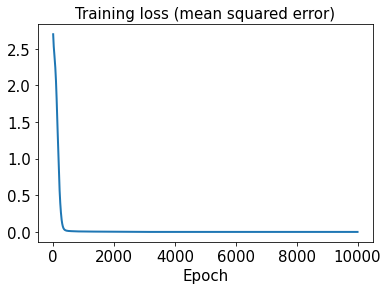

In [54]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

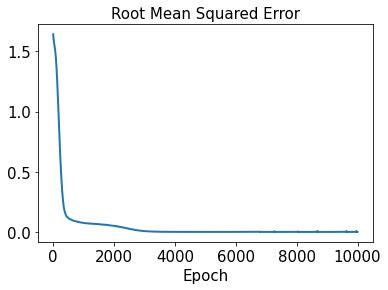

In [55]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [56]:
test_results2 = sd2.evaluate(t_test)

1/1 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [57]:
decoded_train2 = sd2.predict(t_train)

In [58]:
decoded_test2 = sd2.predict(t_test)

In [59]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [60]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [61]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

0.0002317448703793854


In [62]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.0007018615480966315


In [63]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[0.00020304713448487987, 0.0003049623573343456, 0.0002126673381871894, 0.0002707797082605669, 0.0002471086278129109, 0.000286976711307714, 0.0002561146334935927, 0.0001941370319825089, 0.0002515448888908193, 0.00018588974735858705, 0.00018858181033549134, 0.00033397543320081753, 0.00020937046123134572, 0.000311386545800541, 0.0002759883262353172, 0.0003396734507261165, 0.00019998398323619216, 0.00023066281232415073, 0.00033219232358223705, 0.0001969920417542628, 0.00018074004263554327, 0.0003250021763599089, 0.00018326287631423283, 0.00022314803137725623, 0.0001912980019988255, 0.0002813791157192855, 0.00022686238630003358, 0.00024280174279130064, 0.00023459941459156558, 0.0002987362351251016, 0.00026084667205011176, 0.00020614584411302026, 0.0001784724584071028]


In [64]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[0.0002195872099904359, 0.00026571662595451396, 0.0002927478949095348, 0.00021608703409635148, 0.0003180581470315661, 0.001395860118029256, 0.0002386464357137681, 0.0005928692709144105]


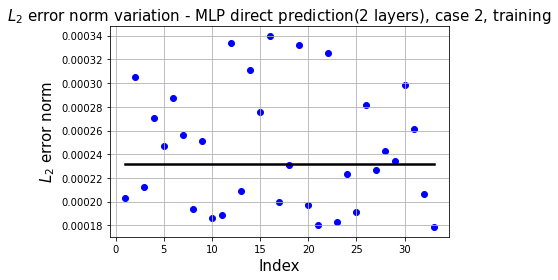

In [65]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

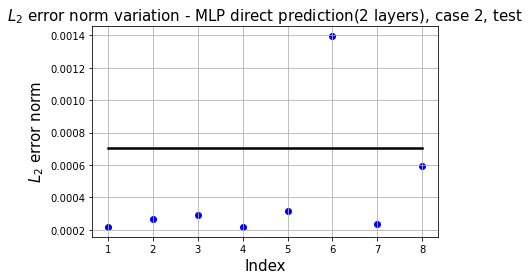

In [66]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

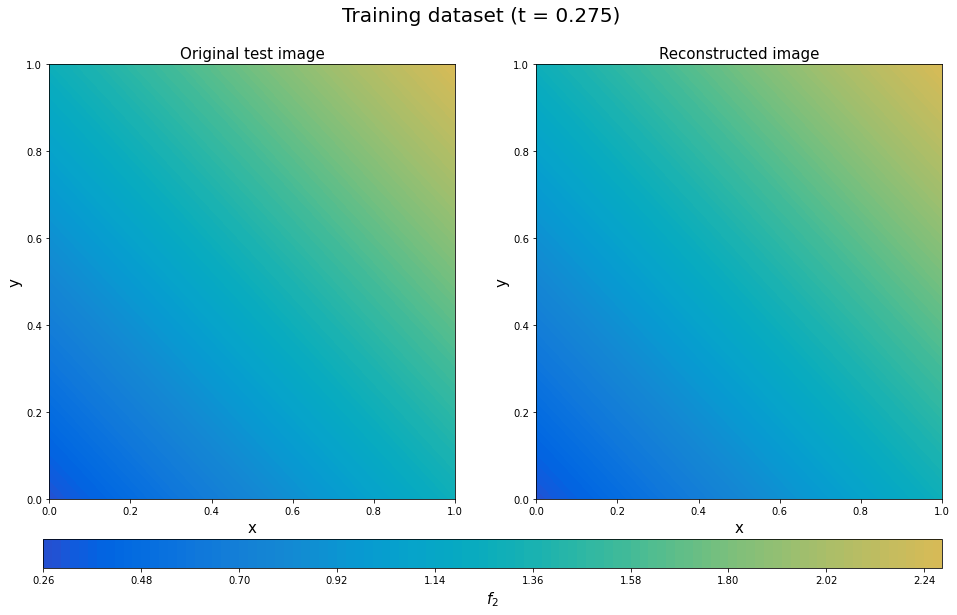

In [67]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

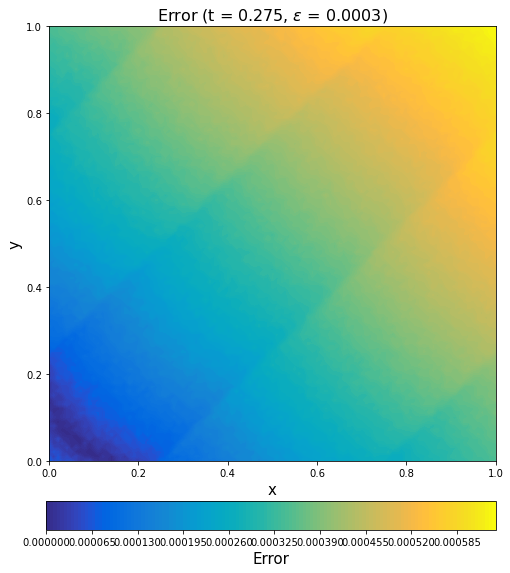

In [68]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

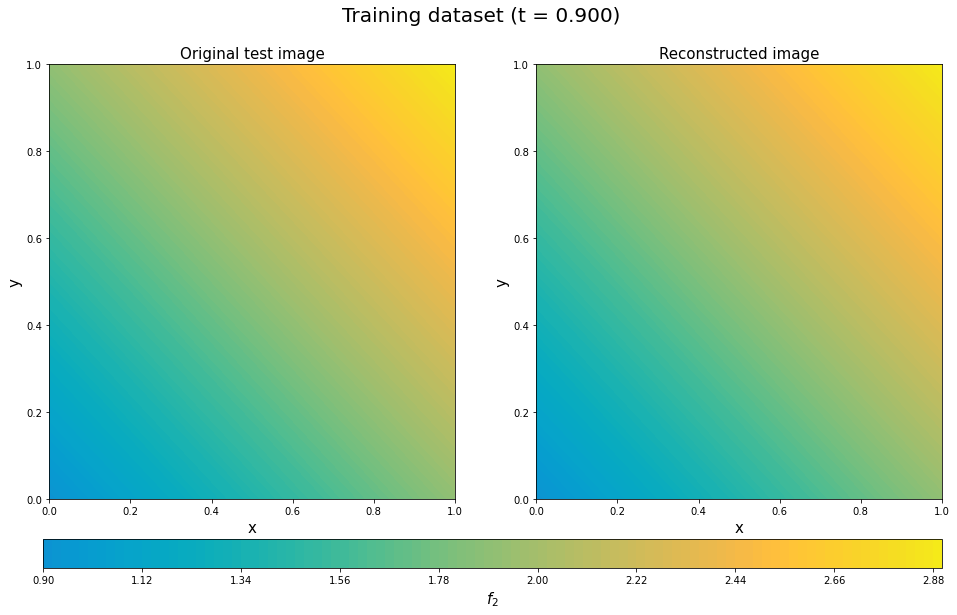

In [69]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

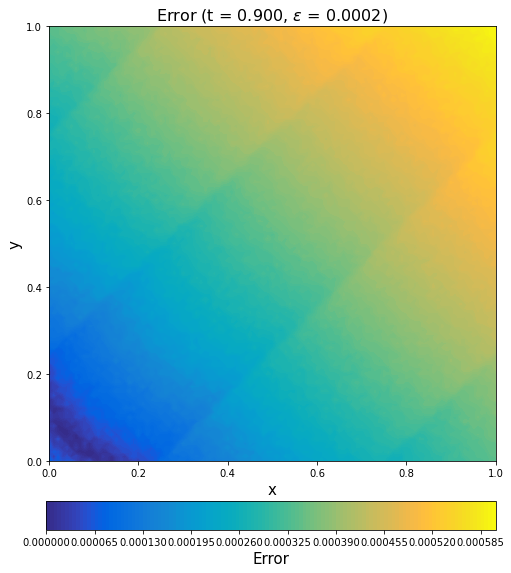

In [70]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

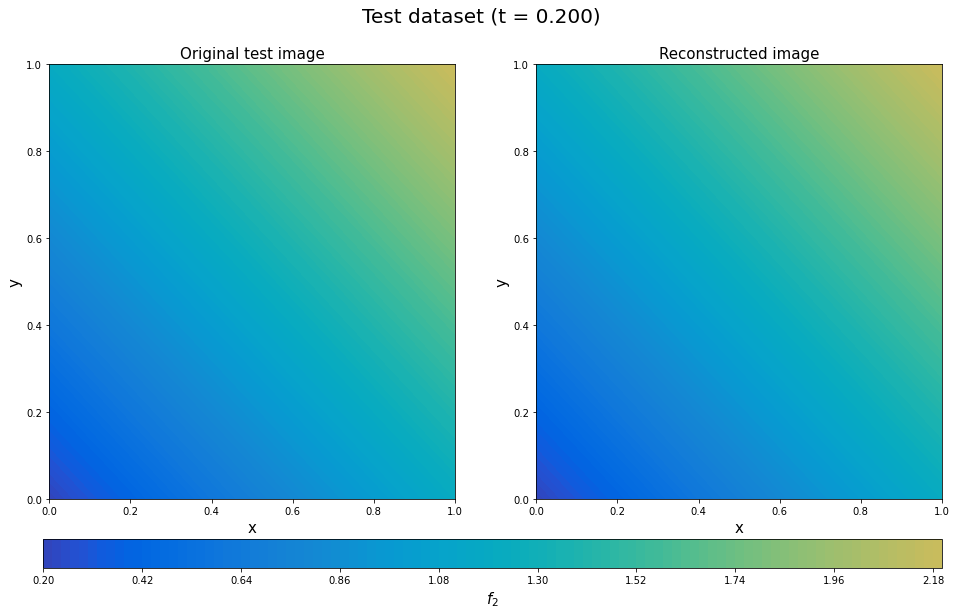

In [71]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

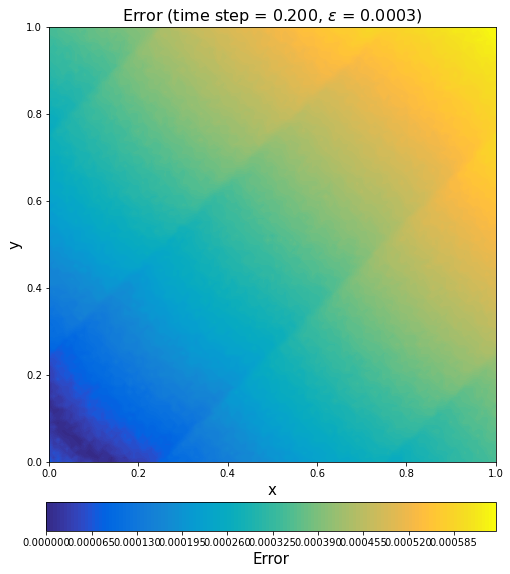

In [72]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

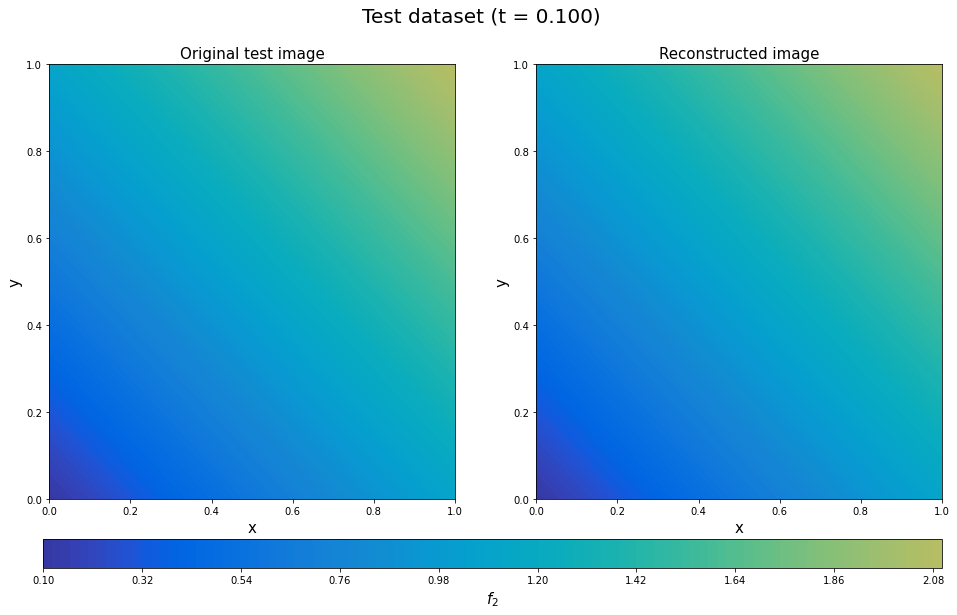

In [73]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

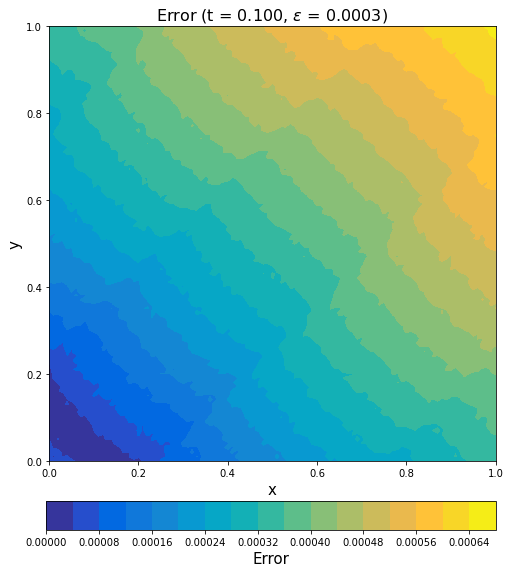

In [74]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [75]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [76]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [77]:
sensor3 = sensor3.reshape((41, 16, 1))

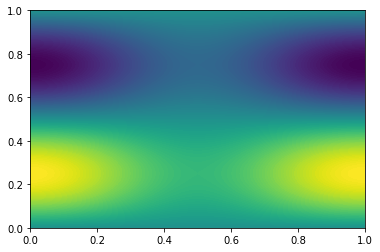

In [78]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [79]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [80]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [81]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [82]:
start3 = datetime.datetime.now()
history3 = sd3.fit(t_train, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8777 - rmse: 1.9692
Epoch 2/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8309 - rmse: 1.9573
Epoch 3/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7852 - rmse: 1.9456
Epoch 4/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7408 - rmse: 1.9341
Epoch 5/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6971 - rmse: 1.9228
Epoch 6/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6549 - rmse: 1.9118
Epoch 7/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6132 - rmse: 1.9008
Epoch 8/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5716 - rmse: 1.8899
Epoch 9/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5301 - rmse: 1.8789
Epoch 10/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4889 - rmse: 1.8679
Epoch 11/10000
2/2 [====================

2/2 [==============================] - 0s 2ms/step - loss: 1.7503 - rmse: 1.3230
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7384 - rmse: 1.3185
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7268 - rmse: 1.3141
Epoch 89/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7153 - rmse: 1.3097
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7039 - rmse: 1.3053
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6927 - rmse: 1.3010
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6816 - rmse: 1.2968
Epoch 93/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6707 - rmse: 1.2926
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6600 - rmse: 1.2884
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6494 - rmse: 1.2843
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 1.1073 - rmse: 1.0523
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1025 - rmse: 1.0500
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0977 - rmse: 1.0477
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0929 - rmse: 1.0454
Epoch 174/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0882 - rmse: 1.0432
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0836 - rmse: 1.0409
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0789 - rmse: 1.0387
Epoch 177/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0743 - rmse: 1.0365
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0698 - rmse: 1.0343
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0653 - rmse: 1.0321
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.8038 - rmse: 0.8966
Epoch 255/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8011 - rmse: 0.8951
Epoch 256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7984 - rmse: 0.8936
Epoch 257/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7958 - rmse: 0.8921
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7931 - rmse: 0.8906
Epoch 259/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7905 - rmse: 0.8891
Epoch 260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7878 - rmse: 0.8876
Epoch 261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7852 - rmse: 0.8861
Epoch 262/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.7826 - rmse: 0.8846
Epoch 263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7800 - rmse: 0.8832
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.6169 - rmse: 0.7855
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6151 - rmse: 0.7843
Epoch 340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6132 - rmse: 0.7831
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6112 - rmse: 0.7818
Epoch 342/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6093 - rmse: 0.7805
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6073 - rmse: 0.7793
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6053 - rmse: 0.7780
Epoch 345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6033 - rmse: 0.7767
Epoch 346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6014 - rmse: 0.7755
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5996 - rmse: 0.7743
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.4763 - rmse: 0.6901
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4747 - rmse: 0.6890
Epoch 424/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4732 - rmse: 0.6879
Epoch 425/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4716 - rmse: 0.6867
Epoch 426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4700 - rmse: 0.6856
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4685 - rmse: 0.6845
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4670 - rmse: 0.6834
Epoch 429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4656 - rmse: 0.6823
Epoch 430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4642 - rmse: 0.6813
Epoch 431/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4628 - rmse: 0.6803
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.3660 - rmse: 0.6050
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3650 - rmse: 0.6041
Epoch 508/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3639 - rmse: 0.6033
Epoch 509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3629 - rmse: 0.6024
Epoch 510/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3618 - rmse: 0.6015
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3607 - rmse: 0.6006
Epoch 512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3595 - rmse: 0.5996
Epoch 513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3583 - rmse: 0.5986
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3572 - rmse: 0.5977
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3561 - rmse: 0.5967
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2792 - rmse: 0.5284
Epoch 591/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2780 - rmse: 0.5273
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2770 - rmse: 0.5263
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2761 - rmse: 0.5254
Epoch 594/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2752 - rmse: 0.5246
Epoch 595/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2742 - rmse: 0.5237
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2733 - rmse: 0.5228
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2724 - rmse: 0.5219
Epoch 598/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2716 - rmse: 0.5211
Epoch 599/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2707 - rmse: 0.5203
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2172 - rmse: 0.4661
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2165 - rmse: 0.4653
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2158 - rmse: 0.4646
Epoch 677/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2152 - rmse: 0.4638
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2145 - rmse: 0.4631
Epoch 679/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2138 - rmse: 0.4624
Epoch 680/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2131 - rmse: 0.4616
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2123 - rmse: 0.4608
Epoch 682/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2116 - rmse: 0.4600
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2108 - rmse: 0.4592
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1720 - rmse: 0.4147
Epoch 759/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1716 - rmse: 0.4142
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1712 - rmse: 0.4137
Epoch 761/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1708 - rmse: 0.4132
Epoch 762/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1703 - rmse: 0.4127
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1699 - rmse: 0.4122
Epoch 764/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1695 - rmse: 0.4117
Epoch 765/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1691 - rmse: 0.4113
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1687 - rmse: 0.4108
Epoch 767/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1683 - rmse: 0.4102
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1405 - rmse: 0.3748
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1401 - rmse: 0.3743
Epoch 844/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1398 - rmse: 0.3739
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1395 - rmse: 0.3734
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1392 - rmse: 0.3731
Epoch 847/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1389 - rmse: 0.3726
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1385 - rmse: 0.3722
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1382 - rmse: 0.3718
Epoch 850/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1379 - rmse: 0.3714
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1376 - rmse: 0.3710
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1162 - rmse: 0.3409
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1160 - rmse: 0.3406
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1157 - rmse: 0.3402
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1154 - rmse: 0.3398
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1151 - rmse: 0.3393
Epoch 931/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1148 - rmse: 0.3389
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1145 - rmse: 0.3384
Epoch 933/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1142 - rmse: 0.3380
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1140 - rmse: 0.3376
Epoch 935/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1137 - rmse: 0.3372
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0971 - rmse: 0.3117
Epoch 1011/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0968 - rmse: 0.3112
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0965 - rmse: 0.3107
Epoch 1013/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0961 - rmse: 0.3101
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0957 - rmse: 0.3094
Epoch 1015/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0953 - rmse: 0.3088
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0950 - rmse: 0.3082
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0947 - rmse: 0.3077
Epoch 1018/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0943 - rmse: 0.3071
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0941 - rmse: 0.3067
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0764 - rmse: 0.2765
Epoch 1094/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0763 - rmse: 0.2761
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0761 - rmse: 0.2758
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0760 - rmse: 0.2756
Epoch 1097/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0758 - rmse: 0.2753
Epoch 1098/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0755 - rmse: 0.2748
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0752 - rmse: 0.2743
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0750 - rmse: 0.2738
Epoch 1101/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0747 - rmse: 0.2734
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0745 - rmse: 0.2730
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0586 - rmse: 0.2421
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0584 - rmse: 0.2416
Epoch 1178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0582 - rmse: 0.2412
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0579 - rmse: 0.2407
Epoch 1180/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0577 - rmse: 0.2403
Epoch 1181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0575 - rmse: 0.2398
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0573 - rmse: 0.2394
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0571 - rmse: 0.2390
Epoch 1184/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0570 - rmse: 0.2386
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0568 - rmse: 0.2383
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0454 - rmse: 0.2131
Epoch 1260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0453 - rmse: 0.2129
Epoch 1261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0453 - rmse: 0.2127
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0451 - rmse: 0.2125
Epoch 1263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0450 - rmse: 0.2121
Epoch 1264/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0449 - rmse: 0.2119
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0448 - rmse: 0.2115
Epoch 1266/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0446 - rmse: 0.2112
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0445 - rmse: 0.2110
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0444 - rmse: 0.2107
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0335 - rmse: 0.1831
Epoch 1343/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0334 - rmse: 0.1827
Epoch 1344/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0332 - rmse: 0.1823
Epoch 1345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0331 - rmse: 0.1820
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0330 - rmse: 0.1816
Epoch 1347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0329 - rmse: 0.1813
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0328 - rmse: 0.1810
Epoch 1349/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0327 - rmse: 0.1807
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0326 - rmse: 0.1804
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0324 - rmse: 0.1801
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0247 - rmse: 0.1571
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0246 - rmse: 0.1568
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0245 - rmse: 0.1565
Epoch 1428/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0244 - rmse: 0.1563
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1560
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1557
Epoch 1431/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0242 - rmse: 0.1555
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0241 - rmse: 0.1553
Epoch 1433/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0240 - rmse: 0.1550
Epoch 1434/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0239 - rmse: 0.1547
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 1509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 1511/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 1512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0177 - rmse: 0.1330
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 1514/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 1516/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0173 - rmse: 0.1317
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1156
Epoch 1592/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0133 - rmse: 0.1154
Epoch 1593/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0133 - rmse: 0.1152
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1147
Epoch 1596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1145
Epoch 1597/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0131 - rmse: 0.1143
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 1599/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0130 - rmse: 0.1139
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1137
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1013
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1011
Epoch 1676/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0102 - rmse: 0.1009
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1006
Epoch 1678/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0101 - rmse: 0.1004
Epoch 1679/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.1002
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1000
Epoch 1681/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0996
Epoch 1683/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0099 - rmse: 0.0994
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0075 - rmse: 0.0869
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0867
Epoch 1759/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0075 - rmse: 0.0866
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 1761/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0863
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0862
Epoch 1763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 1765/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0856
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0058 - rmse: 0.0764
Epoch 1841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 1843/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0058 - rmse: 0.0760
Epoch 1844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0759
Epoch 1845/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0057 - rmse: 0.0758
Epoch 1846/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0057 - rmse: 0.0757
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0755
Epoch 1848/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0057 - rmse: 0.0754
Epoch 1849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 1925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0674
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 1927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 1929/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 1930/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 1931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 1932/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 2007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 2008/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 2009/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 2011/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 2012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 2014/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 2015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 2090/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 2091/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 2092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 2093/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 2095/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 2097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 2098/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 2173/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 2174/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 2176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 2178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 2179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 2256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 2258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 2259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 2260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 2261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 2263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 2264/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0394
Epoch 2340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 2341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 2343/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 2344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 2346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 2347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 2422/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 2424/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 2426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 2428/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 2430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0323
Epoch 2505/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 2507/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 2509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 2510/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 2512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 2513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 8.6224e-04 - rmse: 0.0294
Epoch 2586/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5341e-04 - rmse: 0.0292
Epoch 2587/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4646e-04 - rmse: 0.0291
Epoch 2588/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3996e-04 - rmse: 0.0290
Epoch 2589/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3345e-04 - rmse: 0.0289
Epoch 2590/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2929e-04 - rmse: 0.0288
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2683e-04 - rmse: 0.0288
Epoch 2592/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2356e-04 - rmse: 0.0287
Epoch 2593/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2129e-04 - rmse: 0.0287
Epoch 2594/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1905e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 6.8799e-04 - rmse: 0.0262
Epoch 2666/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8827e-04 - rmse: 0.0262
Epoch 2667/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8866e-04 - rmse: 0.0262
Epoch 2668/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8809e-04 - rmse: 0.0262
Epoch 2669/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8543e-04 - rmse: 0.0262
Epoch 2670/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8234e-04 - rmse: 0.0261
Epoch 2671/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7853e-04 - rmse: 0.0260
Epoch 2672/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7306e-04 - rmse: 0.0259
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6798e-04 - rmse: 0.0258
Epoch 2674/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6438e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 5.8210e-04 - rmse: 0.0241
Epoch 2746/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7668e-04 - rmse: 0.0240
Epoch 2747/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6961e-04 - rmse: 0.0239
Epoch 2748/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6185e-04 - rmse: 0.0237
Epoch 2749/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5504e-04 - rmse: 0.0236
Epoch 2750/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5023e-04 - rmse: 0.0235
Epoch 2751/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4630e-04 - rmse: 0.0234
Epoch 2752/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4519e-04 - rmse: 0.0233
Epoch 2753/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4368e-04 - rmse: 0.0233
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4289e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.5353e-04 - rmse: 0.0213
Epoch 2826/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5264e-04 - rmse: 0.0213
Epoch 2827/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5150e-04 - rmse: 0.0212
Epoch 2828/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5021e-04 - rmse: 0.0212
Epoch 2829/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4947e-04 - rmse: 0.0212
Epoch 2830/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4946e-04 - rmse: 0.0212
Epoch 2831/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5168e-04 - rmse: 0.0213
Epoch 2832/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5317e-04 - rmse: 0.0213
Epoch 2833/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5247e-04 - rmse: 0.0213
Epoch 2834/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5153e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 3.7515e-04 - rmse: 0.0194
Epoch 2906/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7353e-04 - rmse: 0.0193
Epoch 2907/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7238e-04 - rmse: 0.0193
Epoch 2908/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7159e-04 - rmse: 0.0193
Epoch 2909/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7069e-04 - rmse: 0.0193
Epoch 2910/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6961e-04 - rmse: 0.0192
Epoch 2911/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6874e-04 - rmse: 0.0192
Epoch 2912/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6785e-04 - rmse: 0.0192
Epoch 2913/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6710e-04 - rmse: 0.0192
Epoch 2914/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6622e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 3.0733e-04 - rmse: 0.0175
Epoch 2986/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0660e-04 - rmse: 0.0175
Epoch 2987/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0592e-04 - rmse: 0.0175
Epoch 2988/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0515e-04 - rmse: 0.0175
Epoch 2989/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0389e-04 - rmse: 0.0174
Epoch 2990/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0351e-04 - rmse: 0.0174
Epoch 2991/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0316e-04 - rmse: 0.0174
Epoch 2992/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0286e-04 - rmse: 0.0174
Epoch 2993/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0309e-04 - rmse: 0.0174
Epoch 2994/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0291e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 2.5997e-04 - rmse: 0.0161
Epoch 3066/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6474e-04 - rmse: 0.0163
Epoch 3067/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7198e-04 - rmse: 0.0165
Epoch 3068/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7865e-04 - rmse: 0.0167
Epoch 3069/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8103e-04 - rmse: 0.0168
Epoch 3070/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7598e-04 - rmse: 0.0166
Epoch 3071/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6827e-04 - rmse: 0.0164
Epoch 3072/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6308e-04 - rmse: 0.0162
Epoch 3073/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5952e-04 - rmse: 0.0161
Epoch 3074/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5627e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 2.1042e-04 - rmse: 0.0145
Epoch 3146/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0925e-04 - rmse: 0.0145
Epoch 3147/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0890e-04 - rmse: 0.0145
Epoch 3148/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0836e-04 - rmse: 0.0144
Epoch 3149/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0802e-04 - rmse: 0.0144
Epoch 3150/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0763e-04 - rmse: 0.0144
Epoch 3151/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0731e-04 - rmse: 0.0144
Epoch 3152/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0697e-04 - rmse: 0.0144
Epoch 3153/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0663e-04 - rmse: 0.0144
Epoch 3154/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0642e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.7750e-04 - rmse: 0.0133
Epoch 3226/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7658e-04 - rmse: 0.0133
Epoch 3227/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7607e-04 - rmse: 0.0133
Epoch 3228/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7565e-04 - rmse: 0.0133
Epoch 3229/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7518e-04 - rmse: 0.0132
Epoch 3230/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7494e-04 - rmse: 0.0132
Epoch 3231/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7498e-04 - rmse: 0.0132
Epoch 3232/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7519e-04 - rmse: 0.0132
Epoch 3233/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7487e-04 - rmse: 0.0132
Epoch 3234/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7429e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.5295e-04 - rmse: 0.0124
Epoch 3306/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5455e-04 - rmse: 0.0124
Epoch 3307/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5479e-04 - rmse: 0.0124
Epoch 3308/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5324e-04 - rmse: 0.0124
Epoch 3309/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5098e-04 - rmse: 0.0123
Epoch 3310/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4943e-04 - rmse: 0.0122
Epoch 3311/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4789e-04 - rmse: 0.0122
Epoch 3312/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4587e-04 - rmse: 0.0121
Epoch 3313/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4449e-04 - rmse: 0.0120
Epoch 3314/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4469e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.2621e-04 - rmse: 0.0112
Epoch 3386/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2486e-04 - rmse: 0.0112
Epoch 3387/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2413e-04 - rmse: 0.0111
Epoch 3388/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2326e-04 - rmse: 0.0111
Epoch 3389/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2269e-04 - rmse: 0.0111
Epoch 3390/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2265e-04 - rmse: 0.0111
Epoch 3391/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2234e-04 - rmse: 0.0111
Epoch 3392/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2179e-04 - rmse: 0.0110
Epoch 3393/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2151e-04 - rmse: 0.0110
Epoch 3394/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2126e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.0525e-04 - rmse: 0.0103
Epoch 3466/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0510e-04 - rmse: 0.0103
Epoch 3467/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0496e-04 - rmse: 0.0102
Epoch 3468/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0534e-04 - rmse: 0.0103
Epoch 3469/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0681e-04 - rmse: 0.0103
Epoch 3470/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0835e-04 - rmse: 0.0104
Epoch 3471/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0885e-04 - rmse: 0.0104
Epoch 3472/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0817e-04 - rmse: 0.0104
Epoch 3473/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0697e-04 - rmse: 0.0103
Epoch 3474/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0583e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 8.7758e-05 - rmse: 0.0094
Epoch 3546/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7090e-05 - rmse: 0.0093
Epoch 3547/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7111e-05 - rmse: 0.0093
Epoch 3548/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7137e-05 - rmse: 0.0093
Epoch 3549/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7124e-05 - rmse: 0.0093
Epoch 3550/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7057e-05 - rmse: 0.0093
Epoch 3551/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7098e-05 - rmse: 0.0093
Epoch 3552/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7165e-05 - rmse: 0.0093
Epoch 3553/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7652e-05 - rmse: 0.0094
Epoch 3554/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8213e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 7.8567e-05 - rmse: 0.0089
Epoch 3626/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.7266e-05 - rmse: 0.0088
Epoch 3627/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6461e-05 - rmse: 0.0087
Epoch 3628/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6637e-05 - rmse: 0.0088
Epoch 3629/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7550e-05 - rmse: 0.0088
Epoch 3630/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9012e-05 - rmse: 0.0089
Epoch 3631/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0324e-05 - rmse: 0.0090
Epoch 3632/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0254e-05 - rmse: 0.0090
Epoch 3633/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9004e-05 - rmse: 0.0089
Epoch 3634/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7488e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.7667e-05 - rmse: 0.0082
Epoch 3706/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7060e-05 - rmse: 0.0082
Epoch 3707/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6720e-05 - rmse: 0.0082
Epoch 3708/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6003e-05 - rmse: 0.0081
Epoch 3709/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5527e-05 - rmse: 0.0081
Epoch 3710/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5052e-05 - rmse: 0.0081
Epoch 3711/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5597e-05 - rmse: 0.0081
Epoch 3712/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7566e-05 - rmse: 0.0082
Epoch 3713/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0834e-05 - rmse: 0.0084
Epoch 3714/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2622e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 5.5044e-05 - rmse: 0.0074
Epoch 3786/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4920e-05 - rmse: 0.0074
Epoch 3787/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4951e-05 - rmse: 0.0074
Epoch 3788/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5113e-05 - rmse: 0.0074
Epoch 3789/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5398e-05 - rmse: 0.0074
Epoch 3790/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5320e-05 - rmse: 0.0074
Epoch 3791/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4879e-05 - rmse: 0.0074
Epoch 3792/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4434e-05 - rmse: 0.0074
Epoch 3793/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4291e-05 - rmse: 0.0074
Epoch 3794/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4271e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.7942e-05 - rmse: 0.0069
Epoch 3866/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8001e-05 - rmse: 0.0069
Epoch 3867/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8564e-05 - rmse: 0.0070
Epoch 3868/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9256e-05 - rmse: 0.0070
Epoch 3869/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9298e-05 - rmse: 0.0070
Epoch 3870/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8962e-05 - rmse: 0.0070
Epoch 3871/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8972e-05 - rmse: 0.0070
Epoch 3872/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8975e-05 - rmse: 0.0070
Epoch 3873/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8921e-05 - rmse: 0.0070
Epoch 3874/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8837e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 4.2410e-05 - rmse: 0.0065
Epoch 3946/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2339e-05 - rmse: 0.0065
Epoch 3947/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1924e-05 - rmse: 0.0065
Epoch 3948/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1754e-05 - rmse: 0.0065
Epoch 3949/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1899e-05 - rmse: 0.0065
Epoch 3950/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2203e-05 - rmse: 0.0065
Epoch 3951/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2320e-05 - rmse: 0.0065
Epoch 3952/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1955e-05 - rmse: 0.0065
Epoch 3953/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1677e-05 - rmse: 0.0065
Epoch 3954/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1877e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.7340e-05 - rmse: 0.0061
Epoch 4026/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7935e-05 - rmse: 0.0062
Epoch 4027/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8468e-05 - rmse: 0.0062
Epoch 4028/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8528e-05 - rmse: 0.0062
Epoch 4029/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8171e-05 - rmse: 0.0062
Epoch 4030/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7617e-05 - rmse: 0.0061
Epoch 4031/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7244e-05 - rmse: 0.0061
Epoch 4032/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6935e-05 - rmse: 0.0061
Epoch 4033/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6710e-05 - rmse: 0.0061
Epoch 4034/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6784e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.2478e-05 - rmse: 0.0057
Epoch 4106/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3508e-05 - rmse: 0.0058
Epoch 4107/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3918e-05 - rmse: 0.0058
Epoch 4108/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3710e-05 - rmse: 0.0058
Epoch 4109/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3073e-05 - rmse: 0.0058
Epoch 4110/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2115e-05 - rmse: 0.0057
Epoch 4111/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1484e-05 - rmse: 0.0056
Epoch 4112/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1689e-05 - rmse: 0.0056
Epoch 4113/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2164e-05 - rmse: 0.0057
Epoch 4114/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2440e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.9574e-05 - rmse: 0.0054
Epoch 4186/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7695e-05 - rmse: 0.0053
Epoch 4187/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8183e-05 - rmse: 0.0053
Epoch 4188/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0875e-05 - rmse: 0.0056
Epoch 4189/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4725e-05 - rmse: 0.0059
Epoch 4190/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7198e-05 - rmse: 0.0061
Epoch 4191/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7258e-05 - rmse: 0.0061
Epoch 4192/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5705e-05 - rmse: 0.0060
Epoch 4193/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3372e-05 - rmse: 0.0058
Epoch 4194/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0550e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.4252e-05 - rmse: 0.0049
Epoch 4266/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4078e-05 - rmse: 0.0049
Epoch 4267/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3986e-05 - rmse: 0.0049
Epoch 4268/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3936e-05 - rmse: 0.0049
Epoch 4269/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3909e-05 - rmse: 0.0049
Epoch 4270/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3876e-05 - rmse: 0.0049
Epoch 4271/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3898e-05 - rmse: 0.0049
Epoch 4272/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3882e-05 - rmse: 0.0049
Epoch 4273/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3792e-05 - rmse: 0.0049
Epoch 4274/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3699e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.2076e-05 - rmse: 0.0047
Epoch 4346/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1676e-05 - rmse: 0.0047
Epoch 4347/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3440e-05 - rmse: 0.0048
Epoch 4348/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6088e-05 - rmse: 0.0051
Epoch 4349/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6895e-05 - rmse: 0.0052
Epoch 4350/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4502e-05 - rmse: 0.0049
Epoch 4351/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1925e-05 - rmse: 0.0047
Epoch 4352/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1135e-05 - rmse: 0.0046
Epoch 4353/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1430e-05 - rmse: 0.0046
Epoch 4354/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3039e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.8552e-05 - rmse: 0.0043
Epoch 4426/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8488e-05 - rmse: 0.0043
Epoch 4427/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9563e-05 - rmse: 0.0044
Epoch 4428/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0255e-05 - rmse: 0.0045
Epoch 4429/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0058e-05 - rmse: 0.0045
Epoch 4430/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8872e-05 - rmse: 0.0043
Epoch 4431/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8096e-05 - rmse: 0.0043
Epoch 4432/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8211e-05 - rmse: 0.0043
Epoch 4433/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8194e-05 - rmse: 0.0043
Epoch 4434/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8221e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.7716e-05 - rmse: 0.0042
Epoch 4506/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7064e-05 - rmse: 0.0041
Epoch 4507/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7431e-05 - rmse: 0.0042
Epoch 4508/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9309e-05 - rmse: 0.0044
Epoch 4509/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1350e-05 - rmse: 0.0046
Epoch 4510/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1946e-05 - rmse: 0.0047
Epoch 4511/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1008e-05 - rmse: 0.0046
Epoch 4512/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8974e-05 - rmse: 0.0044
Epoch 4513/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6918e-05 - rmse: 0.0041
Epoch 4514/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6753e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.4549e-05 - rmse: 0.0038
Epoch 4586/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4642e-05 - rmse: 0.0038
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4938e-05 - rmse: 0.0039
Epoch 4588/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4755e-05 - rmse: 0.0038
Epoch 4589/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4545e-05 - rmse: 0.0038
Epoch 4590/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4720e-05 - rmse: 0.0038
Epoch 4591/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4913e-05 - rmse: 0.0039
Epoch 4592/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4970e-05 - rmse: 0.0039
Epoch 4593/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5241e-05 - rmse: 0.0039
Epoch 4594/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5777e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.3581e-05 - rmse: 0.0037
Epoch 4666/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2851e-05 - rmse: 0.0036
Epoch 4667/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2795e-05 - rmse: 0.0036
Epoch 4668/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2830e-05 - rmse: 0.0036
Epoch 4669/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3516e-05 - rmse: 0.0037
Epoch 4670/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3525e-05 - rmse: 0.0037
Epoch 4671/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3288e-05 - rmse: 0.0036
Epoch 4672/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3317e-05 - rmse: 0.0036
Epoch 4673/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3351e-05 - rmse: 0.0037
Epoch 4674/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3247e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.1310e-05 - rmse: 0.0034
Epoch 4746/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1166e-05 - rmse: 0.0033
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1036e-05 - rmse: 0.0033
Epoch 4748/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1513e-05 - rmse: 0.0034
Epoch 4749/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2125e-05 - rmse: 0.0035
Epoch 4750/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2251e-05 - rmse: 0.0035
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1858e-05 - rmse: 0.0034
Epoch 4752/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1233e-05 - rmse: 0.0034
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0988e-05 - rmse: 0.0033
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1551e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.1118e-05 - rmse: 0.0033
Epoch 4826/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1431e-05 - rmse: 0.0034
Epoch 4827/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0710e-05 - rmse: 0.0033
Epoch 4828/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0003e-05 - rmse: 0.0032
Epoch 4829/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9217e-06 - rmse: 0.0031
Epoch 4830/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0287e-05 - rmse: 0.0032
Epoch 4831/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0455e-05 - rmse: 0.0032
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0156e-05 - rmse: 0.0032
Epoch 4833/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7015e-06 - rmse: 0.0031
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8016e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 8.9078e-06 - rmse: 0.0030
Epoch 4906/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9533e-06 - rmse: 0.0030
Epoch 4907/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2042e-06 - rmse: 0.0030
Epoch 4908/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9281e-06 - rmse: 0.0032
Epoch 4909/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0669e-05 - rmse: 0.0033
Epoch 4910/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0490e-05 - rmse: 0.0032
Epoch 4911/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6116e-06 - rmse: 0.0031
Epoch 4912/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9149e-06 - rmse: 0.0030
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8709e-06 - rmse: 0.0030
Epoch 4914/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1630e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 8.4264e-06 - rmse: 0.0029
Epoch 4986/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0224e-06 - rmse: 0.0028
Epoch 4987/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2170e-06 - rmse: 0.0029
Epoch 4988/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7717e-06 - rmse: 0.0030
Epoch 4989/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0824e-06 - rmse: 0.0030
Epoch 4990/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9775e-06 - rmse: 0.0030
Epoch 4991/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9389e-06 - rmse: 0.0030
Epoch 4992/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0294e-06 - rmse: 0.0030
Epoch 4993/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6303e-06 - rmse: 0.0029
Epoch 4994/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1300e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 7.6529e-06 - rmse: 0.0028
Epoch 5066/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5546e-06 - rmse: 0.0027
Epoch 5067/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0134e-06 - rmse: 0.0028
Epoch 5068/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7623e-06 - rmse: 0.0030
Epoch 5069/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.0755e-06 - rmse: 0.0030
Epoch 5070/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6597e-06 - rmse: 0.0029
Epoch 5071/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8181e-06 - rmse: 0.0028
Epoch 5072/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3316e-06 - rmse: 0.0027
Epoch 5073/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2154e-06 - rmse: 0.0027
Epoch 5074/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2894e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.4789e-06 - rmse: 0.0025
Epoch 5146/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4467e-06 - rmse: 0.0025
Epoch 5147/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3801e-06 - rmse: 0.0025
Epoch 5148/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4152e-06 - rmse: 0.0025
Epoch 5149/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0140e-06 - rmse: 0.0026
Epoch 5150/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6741e-06 - rmse: 0.0028
Epoch 5151/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.7949e-06 - rmse: 0.0028
Epoch 5152/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1257e-06 - rmse: 0.0027
Epoch 5153/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5397e-06 - rmse: 0.0026
Epoch 5154/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4622e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 6.9018e-06 - rmse: 0.0026
Epoch 5226/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5515e-06 - rmse: 0.0026
Epoch 5227/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7899e-06 - rmse: 0.0024
Epoch 5228/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6204e-06 - rmse: 0.0024
Epoch 5229/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0880e-06 - rmse: 0.0025
Epoch 5230/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2505e-06 - rmse: 0.0025
Epoch 5231/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6905e-06 - rmse: 0.0024
Epoch 5232/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6684e-06 - rmse: 0.0024
Epoch 5233/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9904e-06 - rmse: 0.0024
Epoch 5234/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0960e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 6.2494e-06 - rmse: 0.0025
Epoch 5306/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4549e-06 - rmse: 0.0025
Epoch 5307/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4286e-06 - rmse: 0.0025
Epoch 5308/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1154e-06 - rmse: 0.0025
Epoch 5309/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8410e-06 - rmse: 0.0024
Epoch 5310/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8832e-06 - rmse: 0.0024
Epoch 5311/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0059e-06 - rmse: 0.0025
Epoch 5312/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8527e-06 - rmse: 0.0024
Epoch 5313/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5662e-06 - rmse: 0.0024
Epoch 5314/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3316e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 5.8748e-06 - rmse: 0.0024
Epoch 5386/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7687e-06 - rmse: 0.0024
Epoch 5387/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3557e-06 - rmse: 0.0023
Epoch 5388/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2010e-06 - rmse: 0.0023
Epoch 5389/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2782e-06 - rmse: 0.0023
Epoch 5390/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3103e-06 - rmse: 0.0023
Epoch 5391/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1263e-06 - rmse: 0.0023
Epoch 5392/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9330e-06 - rmse: 0.0022
Epoch 5393/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3516e-06 - rmse: 0.0023
Epoch 5394/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8181e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 4.5113e-06 - rmse: 0.0021
Epoch 5466/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3479e-06 - rmse: 0.0021
Epoch 5467/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3300e-06 - rmse: 0.0021
Epoch 5468/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4309e-06 - rmse: 0.0021
Epoch 5469/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4428e-06 - rmse: 0.0021
Epoch 5470/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4633e-06 - rmse: 0.0021
Epoch 5471/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0090e-06 - rmse: 0.0022
Epoch 5472/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4997e-06 - rmse: 0.0025
Epoch 5473/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8658e-06 - rmse: 0.0026
Epoch 5474/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1996e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 5.8160e-06 - rmse: 0.0024
Epoch 5546/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8029e-06 - rmse: 0.0022
Epoch 5547/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2621e-06 - rmse: 0.0021
Epoch 5548/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6536e-06 - rmse: 0.0022
Epoch 5549/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6800e-06 - rmse: 0.0024
Epoch 5550/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7874e-06 - rmse: 0.0026
Epoch 5551/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1163e-06 - rmse: 0.0027
Epoch 5552/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7773e-06 - rmse: 0.0024
Epoch 5553/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3324e-06 - rmse: 0.0021
Epoch 5554/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6695e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.6758e-06 - rmse: 0.0019
Epoch 5626/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5114e-06 - rmse: 0.0019
Epoch 5627/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4339e-06 - rmse: 0.0019
Epoch 5628/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4748e-06 - rmse: 0.0019
Epoch 5629/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4485e-06 - rmse: 0.0019
Epoch 5630/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6423e-06 - rmse: 0.0019
Epoch 5631/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9216e-06 - rmse: 0.0020
Epoch 5632/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9493e-06 - rmse: 0.0022
Epoch 5633/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8085e-06 - rmse: 0.0026
Epoch 5634/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9627e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 4.0927e-06 - rmse: 0.0020
Epoch 5706/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0901e-06 - rmse: 0.0020
Epoch 5707/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8015e-06 - rmse: 0.0019
Epoch 5708/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5864e-06 - rmse: 0.0019
Epoch 5709/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4679e-06 - rmse: 0.0019
Epoch 5710/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2632e-06 - rmse: 0.0018
Epoch 5711/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2009e-06 - rmse: 0.0018
Epoch 5712/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6786e-06 - rmse: 0.0019
Epoch 5713/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8879e-06 - rmse: 0.0020
Epoch 5714/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2704e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.0170e-06 - rmse: 0.0020
Epoch 5786/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8403e-06 - rmse: 0.0020
Epoch 5787/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9061e-06 - rmse: 0.0020
Epoch 5788/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9118e-06 - rmse: 0.0017
Epoch 5789/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4924e-06 - rmse: 0.0019
Epoch 5790/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2174e-06 - rmse: 0.0021
Epoch 5791/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5221e-06 - rmse: 0.0019
Epoch 5792/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3847e-06 - rmse: 0.0018
Epoch 5793/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7331e-06 - rmse: 0.0019
Epoch 5794/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7947e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.8347e-06 - rmse: 0.0017
Epoch 5866/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8300e-06 - rmse: 0.0017
Epoch 5867/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8135e-06 - rmse: 0.0017
Epoch 5868/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8704e-06 - rmse: 0.0017
Epoch 5869/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9094e-06 - rmse: 0.0017
Epoch 5870/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7766e-06 - rmse: 0.0017
Epoch 5871/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7286e-06 - rmse: 0.0017
Epoch 5872/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6661e-06 - rmse: 0.0016
Epoch 5873/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5950e-06 - rmse: 0.0016
Epoch 5874/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6061e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.8037e-06 - rmse: 0.0017
Epoch 5946/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3501e-06 - rmse: 0.0021
Epoch 5947/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9556e-06 - rmse: 0.0022
Epoch 5948/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0920e-06 - rmse: 0.0018
Epoch 5949/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4034e-06 - rmse: 0.0016
Epoch 5950/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0704e-06 - rmse: 0.0018
Epoch 5951/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8557e-06 - rmse: 0.0017
Epoch 5952/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4170e-06 - rmse: 0.0016
Epoch 5953/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3535e-06 - rmse: 0.0015
Epoch 5954/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4055e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.5301e-06 - rmse: 0.0016
Epoch 6026/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9928e-06 - rmse: 0.0017
Epoch 6027/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5395e-06 - rmse: 0.0016
Epoch 6028/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1168e-06 - rmse: 0.0015
Epoch 6029/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7344e-06 - rmse: 0.0017
Epoch 6030/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1719e-06 - rmse: 0.0018
Epoch 6031/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5733e-06 - rmse: 0.0016
Epoch 6032/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3660e-06 - rmse: 0.0015
Epoch 6033/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0225e-06 - rmse: 0.0017
Epoch 6034/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4025e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.3096e-06 - rmse: 0.0015
Epoch 6106/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1407e-06 - rmse: 0.0015
Epoch 6107/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3198e-06 - rmse: 0.0015
Epoch 6108/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8063e-06 - rmse: 0.0017
Epoch 6109/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3572e-06 - rmse: 0.0015
Epoch 6110/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1277e-06 - rmse: 0.0015
Epoch 6111/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4959e-06 - rmse: 0.0016
Epoch 6112/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7210e-06 - rmse: 0.0016
Epoch 6113/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2536e-06 - rmse: 0.0015
Epoch 6114/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0976e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.6283e-06 - rmse: 0.0016
Epoch 6186/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9881e-06 - rmse: 0.0017
Epoch 6187/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1563e-06 - rmse: 0.0020
Epoch 6188/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0830e-06 - rmse: 0.0020
Epoch 6189/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1933e-06 - rmse: 0.0015
Epoch 6190/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9944e-06 - rmse: 0.0020
Epoch 6191/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6630e-06 - rmse: 0.0019
Epoch 6192/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0558e-06 - rmse: 0.0014
Epoch 6193/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9938e-06 - rmse: 0.0014
Epoch 6194/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0919e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.5830e-06 - rmse: 0.0016
Epoch 6266/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1729e-06 - rmse: 0.0015
Epoch 6267/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7175e-06 - rmse: 0.0013
Epoch 6268/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9521e-06 - rmse: 0.0014
Epoch 6269/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0353e-06 - rmse: 0.0014
Epoch 6270/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6687e-06 - rmse: 0.0013
Epoch 6271/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8764e-06 - rmse: 0.0014
Epoch 6272/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0694e-06 - rmse: 0.0014
Epoch 6273/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6986e-06 - rmse: 0.0013
Epoch 6274/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7902e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.9006e-06 - rmse: 0.0014
Epoch 6346/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4807e-06 - rmse: 0.0021
Epoch 6347/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4096e-06 - rmse: 0.0018
Epoch 6348/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1745e-06 - rmse: 0.0015
Epoch 6349/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5297e-06 - rmse: 0.0016
Epoch 6350/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8837e-06 - rmse: 0.0017
Epoch 6351/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9017e-06 - rmse: 0.0017
Epoch 6352/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1120e-06 - rmse: 0.0018
Epoch 6353/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0211e-06 - rmse: 0.0017
Epoch 6354/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7641e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.6182e-06 - rmse: 0.0013
Epoch 6426/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6422e-06 - rmse: 0.0013
Epoch 6427/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9357e-06 - rmse: 0.0014
Epoch 6428/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9150e-06 - rmse: 0.0017
Epoch 6429/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7886e-06 - rmse: 0.0013
Epoch 6430/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6986e-06 - rmse: 0.0013
Epoch 6431/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4575e-06 - rmse: 0.0016
Epoch 6432/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0951e-06 - rmse: 0.0014
Epoch 6433/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2790e-06 - rmse: 0.0015
Epoch 6434/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8121e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.3086e-06 - rmse: 0.0021
Epoch 6506/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7979e-06 - rmse: 0.0019
Epoch 6507/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5106e-06 - rmse: 0.0012
Epoch 6508/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9870e-06 - rmse: 0.0014
Epoch 6509/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7658e-06 - rmse: 0.0013
Epoch 6510/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6177e-06 - rmse: 0.0013
Epoch 6511/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8551e-06 - rmse: 0.0014
Epoch 6512/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4989e-06 - rmse: 0.0012
Epoch 6513/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2563e-06 - rmse: 0.0015
Epoch 6514/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9269e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.4069e-06 - rmse: 0.0012
Epoch 6586/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5919e-06 - rmse: 0.0013
Epoch 6587/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3996e-06 - rmse: 0.0012
Epoch 6588/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3755e-06 - rmse: 0.0012
Epoch 6589/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8439e-06 - rmse: 0.0014
Epoch 6590/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4267e-06 - rmse: 0.0012
Epoch 6591/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4463e-06 - rmse: 0.0012
Epoch 6592/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6441e-06 - rmse: 0.0013
Epoch 6593/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4511e-06 - rmse: 0.0012
Epoch 6594/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9376e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.2814e-06 - rmse: 0.0011
Epoch 6666/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3624e-06 - rmse: 0.0015
Epoch 6667/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4078e-06 - rmse: 0.0012
Epoch 6668/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4341e-06 - rmse: 0.0016
Epoch 6669/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1855e-06 - rmse: 0.0018
Epoch 6670/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8081e-06 - rmse: 0.0013
Epoch 6671/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6520e-06 - rmse: 0.0013
Epoch 6672/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0939e-06 - rmse: 0.0014
Epoch 6673/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9659e-06 - rmse: 0.0014
Epoch 6674/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0743e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.3686e-06 - rmse: 0.0012
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0392e-06 - rmse: 0.0014
Epoch 6747/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4693e-06 - rmse: 0.0012
Epoch 6748/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3546e-06 - rmse: 0.0012
Epoch 6749/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8523e-06 - rmse: 0.0014
Epoch 6750/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1914e-06 - rmse: 0.0011
Epoch 6751/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1624e-06 - rmse: 0.0015
Epoch 6752/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4798e-06 - rmse: 0.0016
Epoch 6753/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2089e-06 - rmse: 0.0011
Epoch 6754/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3654e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.4461e-06 - rmse: 0.0012
Epoch 6826/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4163e-06 - rmse: 0.0012
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1597e-06 - rmse: 0.0011
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5521e-06 - rmse: 0.0012
Epoch 6829/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5369e-06 - rmse: 0.0012
Epoch 6830/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0641e-06 - rmse: 0.0010
Epoch 6831/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3677e-06 - rmse: 0.0012
Epoch 6832/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0876e-06 - rmse: 0.0010
Epoch 6833/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1121e-06 - rmse: 0.0011
Epoch 6834/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3096e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.1667e-06 - rmse: 0.0011
Epoch 6906/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0957e-06 - rmse: 0.0010
Epoch 6907/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2445e-06 - rmse: 0.0011
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1906e-06 - rmse: 0.0011
Epoch 6909/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0728e-06 - rmse: 0.0010
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4235e-06 - rmse: 0.0012
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1422e-06 - rmse: 0.0011
Epoch 6912/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0665e-06 - rmse: 0.0010
Epoch 6913/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7301e-06 - rmse: 0.0013
Epoch 6914/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2223e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.0840e-06 - rmse: 0.0010
Epoch 6986/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1360e-06 - rmse: 0.0011
Epoch 6987/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0151e-06 - rmse: 0.0010
Epoch 6988/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1813e-06 - rmse: 0.0011
Epoch 6989/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1464e-07 - rmse: 9.5637e-04
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1122e-06 - rmse: 0.0011
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2946e-06 - rmse: 0.0011
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0222e-06 - rmse: 0.0010
Epoch 6993/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1404e-06 - rmse: 0.0011
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9870e-07 - rmse: 

2/2 [==============================] - 0s 3ms/step - loss: 8.9881e-07 - rmse: 9.4805e-04
Epoch 7065/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0915e-06 - rmse: 0.0010
Epoch 7066/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8960e-07 - rmse: 9.9478e-04
Epoch 7067/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8031e-07 - rmse: 9.3825e-04
Epoch 7068/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6123e-07 - rmse: 9.2803e-04
Epoch 7069/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4521e-07 - rmse: 9.1935e-04
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3948e-07 - rmse: 9.6927e-04
Epoch 7071/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0501e-06 - rmse: 0.0010
Epoch 7072/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0048e-06 - rmse: 0.0010
Epoch 7073/10000
2/2 [==============================] - 0s 3ms/step - loss:

2/2 [==============================] - 0s 4ms/step - loss: 9.4604e-07 - rmse: 9.7264e-04
Epoch 7144/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0005e-06 - rmse: 0.0010
Epoch 7145/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1922e-06 - rmse: 0.0011
Epoch 7146/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9057e-07 - rmse: 9.4370e-04
Epoch 7147/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5610e-06 - rmse: 0.0012
Epoch 7148/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0898e-06 - rmse: 0.0010
Epoch 7149/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1038e-06 - rmse: 0.0011
Epoch 7150/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0489e-06 - rmse: 0.0010
Epoch 7151/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9097e-07 - rmse: 9.4391e-04
Epoch 7152/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2990e-07 

2/2 [==============================] - 0s 4ms/step - loss: 1.2091e-06 - rmse: 0.0011
Epoch 7223/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0283e-06 - rmse: 0.0014
Epoch 7224/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2497e-06 - rmse: 0.0021
Epoch 7225/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3163e-06 - rmse: 0.0011
Epoch 7226/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9479e-06 - rmse: 0.0017
Epoch 7227/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6790e-06 - rmse: 0.0016
Epoch 7228/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3030e-06 - rmse: 0.0011
Epoch 7229/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5953e-06 - rmse: 0.0016
Epoch 7230/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6669e-07 - rmse: 9.8320e-04
Epoch 7231/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3579e-06 - rmse: 

2/2 [==============================] - 0s 4ms/step - loss: 1.1988e-06 - rmse: 0.0011
Epoch 7302/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2329e-06 - rmse: 0.0011
Epoch 7303/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1923e-06 - rmse: 0.0011
Epoch 7304/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0222e-06 - rmse: 0.0010
Epoch 7305/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6029e-07 - rmse: 9.2752e-04
Epoch 7306/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4913e-07 - rmse: 8.6553e-04
Epoch 7307/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.7370e-07 - rmse: 8.7960e-04
Epoch 7308/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6740e-07 - rmse: 8.7601e-04
Epoch 7309/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3758e-07 - rmse: 9.1519e-04
Epoch 7310/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2

2/2 [==============================] - 0s 4ms/step - loss: 7.6871e-07 - rmse: 8.7676e-04
Epoch 7381/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7172e-06 - rmse: 0.0013
Epoch 7382/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8785e-06 - rmse: 0.0014
Epoch 7383/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1934e-06 - rmse: 0.0011
Epoch 7384/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0079e-06 - rmse: 0.0010
Epoch 7385/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3938e-07 - rmse: 9.1618e-04
Epoch 7386/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5545e-07 - rmse: 8.6917e-04
Epoch 7387/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1220e-07 - rmse: 9.0122e-04
Epoch 7388/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2759e-07 - rmse: 9.0972e-04
Epoch 7389/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9

2/2 [==============================] - 0s 3ms/step - loss: 2.2605e-06 - rmse: 0.0015
Epoch 7460/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9312e-06 - rmse: 0.0014
Epoch 7461/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9772e-07 - rmse: 9.9886e-04
Epoch 7462/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0381e-06 - rmse: 0.0014
Epoch 7463/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7236e-07 - rmse: 8.1997e-04
Epoch 7464/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9057e-06 - rmse: 0.0017
Epoch 7465/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8417e-06 - rmse: 0.0014
Epoch 7466/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2533e-06 - rmse: 0.0011
Epoch 7467/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3047e-06 - rmse: 0.0015
Epoch 7468/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2828e-07 - rm

2/2 [==============================] - 0s 3ms/step - loss: 9.2519e-07 - rmse: 9.6187e-04
Epoch 7539/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0947e-06 - rmse: 0.0010
Epoch 7540/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4652e-06 - rmse: 0.0012
Epoch 7541/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6366e-07 - rmse: 8.7388e-04
Epoch 7542/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8553e-07 - rmse: 9.4102e-04
Epoch 7543/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9895e-07 - rmse: 8.3603e-04
Epoch 7544/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6706e-07 - rmse: 8.1674e-04
Epoch 7545/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8755e-07 - rmse: 8.2919e-04
Epoch 7546/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9033e-07 - rmse: 7.6833e-04
Epoch 7547/10000
2/2 [==============================] - 0s 3ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 1.0002e-06 - rmse: 0.0010
Epoch 7617/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5936e-07 - rmse: 8.7141e-04
Epoch 7618/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8098e-07 - rmse: 9.3860e-04
Epoch 7619/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1594e-07 - rmse: 9.5705e-04
Epoch 7620/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0302e-06 - rmse: 0.0010
Epoch 7621/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3336e-06 - rmse: 0.0012
Epoch 7622/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2313e-07 - rmse: 9.6079e-04
Epoch 7623/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6252e-06 - rmse: 0.0016
Epoch 7624/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1976e-07 - rmse: 9.5904e-04
Epoch 7625/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3

2/2 [==============================] - 0s 3ms/step - loss: 7.3039e-07 - rmse: 8.5463e-04
Epoch 7695/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0642e-07 - rmse: 8.9801e-04
Epoch 7696/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9289e-07 - rmse: 8.3240e-04
Epoch 7697/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2553e-07 - rmse: 9.0859e-04
Epoch 7698/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0779e-06 - rmse: 0.0010
Epoch 7699/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0744e-06 - rmse: 0.0010
Epoch 7700/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4661e-06 - rmse: 0.0012
Epoch 7701/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3024e-06 - rmse: 0.0011
Epoch 7702/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1883e-06 - rmse: 0.0011
Epoch 7703/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9638e

2/2 [==============================] - 0s 3ms/step - loss: 8.2097e-07 - rmse: 9.0608e-04
Epoch 7772/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9456e-07 - rmse: 7.7108e-04
Epoch 7773/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2331e-06 - rmse: 0.0011
Epoch 7774/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3415e-07 - rmse: 7.9634e-04
Epoch 7775/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4966e-06 - rmse: 0.0012
Epoch 7776/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0891e-06 - rmse: 0.0010
Epoch 7777/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6275e-06 - rmse: 0.0013
Epoch 7778/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0291e-06 - rmse: 0.0010
Epoch 7779/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5857e-06 - rmse: 0.0013
Epoch 7780/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2326e-07 

2/2 [==============================] - 0s 4ms/step - loss: 1.9358e-06 - rmse: 0.0014
Epoch 7850/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7235e-07 - rmse: 7.5654e-04
Epoch 7851/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6286e-06 - rmse: 0.0013
Epoch 7852/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5048e-06 - rmse: 0.0012
Epoch 7853/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6265e-07 - rmse: 8.1404e-04
Epoch 7854/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1711e-06 - rmse: 0.0011
Epoch 7855/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2330e-07 - rmse: 7.8950e-04
Epoch 7856/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6958e-07 - rmse: 9.3251e-04
Epoch 7857/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8099e-07 - rmse: 7.6223e-04
Epoch 7858/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2

2/2 [==============================] - 0s 4ms/step - loss: 6.7453e-07 - rmse: 8.2130e-04
Epoch 7928/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6335e-07 - rmse: 8.7370e-04
Epoch 7929/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5290e-07 - rmse: 7.4357e-04
Epoch 7930/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7789e-07 - rmse: 8.2334e-04
Epoch 7931/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4626e-07 - rmse: 8.0390e-04
Epoch 7932/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6157e-07 - rmse: 7.4938e-04
Epoch 7933/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0909e-06 - rmse: 0.0010
Epoch 7934/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6203e-07 - rmse: 9.8083e-04
Epoch 7935/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0978e-06 - rmse: 0.0010
Epoch 7936/10000
2/2 [==============================] - 0s 4ms/step - l

Epoch 8006/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3721e-07 - rmse: 7.3294e-04
Epoch 8007/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2622e-07 - rmse: 8.5218e-04
Epoch 8008/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8575e-07 - rmse: 8.2810e-04
Epoch 8009/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3661e-07 - rmse: 8.5826e-04
Epoch 8010/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5607e-07 - rmse: 8.6952e-04
Epoch 8011/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1024e-06 - rmse: 0.0010
Epoch 8012/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1821e-07 - rmse: 9.5823e-04
Epoch 8013/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.7027e-07 - rmse: 8.7765e-04
Epoch 8014/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0065e-06 - rmse: 0.0010
Epoch 8015/10000
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 9.1065e-07 - rmse: 9.5428e-04
Epoch 8085/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5308e-07 - rmse: 9.2362e-04
Epoch 8086/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6697e-07 - rmse: 7.5297e-04
Epoch 8087/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6163e-07 - rmse: 9.2824e-04
Epoch 8088/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9127e-07 - rmse: 8.8953e-04
Epoch 8089/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8274e-07 - rmse: 9.3954e-04
Epoch 8090/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3390e-07 - rmse: 7.9618e-04
Epoch 8091/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3109e-07 - rmse: 9.6493e-04
Epoch 8092/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7650e-07 - rmse: 8.2249e-04
Epoch 8093/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 5.7721e-07 - rmse: 7.5975e-04
Epoch 8163/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1974e-07 - rmse: 7.2093e-04
Epoch 8164/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4002e-07 - rmse: 8.0001e-04
Epoch 8165/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7609e-07 - rmse: 7.5900e-04
Epoch 8166/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5304e-07 - rmse: 7.4367e-04
Epoch 8167/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0601e-07 - rmse: 7.1134e-04
Epoch 8168/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0030e-06 - rmse: 0.0010
Epoch 8169/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1941e-07 - rmse: 8.4818e-04
Epoch 8170/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7026e-07 - rmse: 9.8502e-04
Epoch 8171/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 7.0961e-07 - rmse: 8.4238e-04
Epoch 8241/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1241e-06 - rmse: 0.0015
Epoch 8242/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5678e-06 - rmse: 0.0013
Epoch 8243/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5233e-06 - rmse: 0.0012
Epoch 8244/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7635e-06 - rmse: 0.0019
Epoch 8245/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5593e-06 - rmse: 0.0012
Epoch 8246/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6181e-06 - rmse: 0.0016
Epoch 8247/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4183e-06 - rmse: 0.0016
Epoch 8248/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3257e-06 - rmse: 0.0012
Epoch 8249/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5671e-06 - rmse: 

Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3727e-07 - rmse: 7.3299e-04
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1323e-06 - rmse: 0.0015
Epoch 8321/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0890e-06 - rmse: 0.0010
Epoch 8322/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2752e-06 - rmse: 0.0011
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9392e-06 - rmse: 0.0014
Epoch 8324/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4843e-07 - rmse: 8.6512e-04
Epoch 8325/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9039e-06 - rmse: 0.0014
Epoch 8326/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8342e-07 - rmse: 8.8511e-04
Epoch 8327/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2655e-06 - rmse: 0.0015
Epoch 8328/10000
2/2 [==============================] - 0s 4ms/step - 

2/2 [==============================] - 0s 4ms/step - loss: 8.9221e-07 - rmse: 9.4457e-04
Epoch 8398/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6955e-07 - rmse: 9.3250e-04
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1061e-07 - rmse: 8.4298e-04
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0330e-07 - rmse: 8.9627e-04
Epoch 8401/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5448e-07 - rmse: 8.0900e-04
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1269e-06 - rmse: 0.0011
Epoch 8403/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0009e-06 - rmse: 0.0010
Epoch 8404/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7806e-07 - rmse: 6.9142e-04
Epoch 8405/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8099e-07 - rmse: 8.2522e-04
Epoch 8406/10000
2/2 [==============================] - 0s 3ms/step - l

2/2 [==============================] - 0s 3ms/step - loss: 7.9063e-07 - rmse: 8.8917e-04
Epoch 8476/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1743e-07 - rmse: 9.0412e-04
Epoch 8477/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8667e-07 - rmse: 8.2866e-04
Epoch 8478/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9440e-07 - rmse: 7.7097e-04
Epoch 8479/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9466e-07 - rmse: 7.0332e-04
Epoch 8480/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4831e-07 - rmse: 7.4048e-04
Epoch 8481/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0611e-07 - rmse: 8.9784e-04
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4075e-07 - rmse: 8.0047e-04
Epoch 8483/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0688e-07 - rmse: 7.1195e-04
Epoch 8484/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.1794e-06 - rmse: 0.0015
Epoch 8554/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0964e-06 - rmse: 0.0010
Epoch 8555/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2217e-06 - rmse: 0.0021
Epoch 8556/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1643e-06 - rmse: 0.0015
Epoch 8557/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6999e-06 - rmse: 0.0013
Epoch 8558/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8105e-06 - rmse: 0.0013
Epoch 8559/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2633e-06 - rmse: 0.0011
Epoch 8560/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6185e-07 - rmse: 8.7284e-04
Epoch 8561/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0482e-07 - rmse: 8.3954e-04
Epoch 8562/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1516e-07 - rm

2/2 [==============================] - 0s 4ms/step - loss: 4.8213e-07 - rmse: 6.9436e-04
Epoch 8632/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3658e-07 - rmse: 7.9786e-04
Epoch 8633/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5952e-07 - rmse: 8.1211e-04
Epoch 8634/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4784e-07 - rmse: 8.6478e-04
Epoch 8635/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2520e-07 - rmse: 9.6187e-04
Epoch 8636/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2978e-07 - rmse: 7.9358e-04
Epoch 8637/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6364e-07 - rmse: 7.5076e-04
Epoch 8638/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1281e-07 - rmse: 7.1610e-04
Epoch 8639/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7521e-07 - rmse: 6.8935e-04
Epoch 8640/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.1235e-07 - rmse: 7.1579e-04
Epoch 8710/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0548e-06 - rmse: 0.0010
Epoch 8711/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6003e-06 - rmse: 0.0013
Epoch 8712/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6810e-07 - rmse: 7.5372e-04
Epoch 8713/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9189e-07 - rmse: 9.9594e-04
Epoch 8714/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4620e-07 - rmse: 8.6383e-04
Epoch 8715/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5889e-07 - rmse: 7.4759e-04
Epoch 8716/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6081e-07 - rmse: 7.4887e-04
Epoch 8717/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9030e-07 - rmse: 7.0021e-04
Epoch 8718/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 6.6682e-07 - rmse: 8.1659e-04
Epoch 8788/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7880e-07 - rmse: 6.9195e-04
Epoch 8789/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4638e-07 - rmse: 6.6812e-04
Epoch 8790/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0095e-06 - rmse: 0.0010
Epoch 8791/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2175e-07 - rmse: 7.8851e-04
Epoch 8792/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0120e-06 - rmse: 0.0010
Epoch 8793/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4087e-07 - rmse: 9.6998e-04
Epoch 8794/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3114e-07 - rmse: 8.5507e-04
Epoch 8795/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8062e-07 - rmse: 7.6199e-04
Epoch 8796/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 1.1715e-06 - rmse: 0.0011
Epoch 8865/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4166e-07 - rmse: 8.6120e-04
Epoch 8866/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2633e-06 - rmse: 0.0011
Epoch 8867/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1324e-07 - rmse: 9.5564e-04
Epoch 8868/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0160e-06 - rmse: 0.0014
Epoch 8869/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8288e-06 - rmse: 0.0014
Epoch 8870/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8383e-07 - rmse: 9.9188e-04
Epoch 8871/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0639e-06 - rmse: 0.0010
Epoch 8872/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1195e-06 - rmse: 0.0011
Epoch 8873/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4083e-06 

2/2 [==============================] - 0s 4ms/step - loss: 7.5983e-07 - rmse: 8.7168e-04
Epoch 8943/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0954e-07 - rmse: 6.3996e-04
Epoch 8944/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2346e-07 - rmse: 7.8960e-04
Epoch 8945/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5640e-07 - rmse: 6.7558e-04
Epoch 8946/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4146e-07 - rmse: 9.1731e-04
Epoch 8947/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0980e-07 - rmse: 7.1400e-04
Epoch 8948/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8171e-07 - rmse: 8.2566e-04
Epoch 8949/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6865e-07 - rmse: 6.8458e-04
Epoch 8950/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2211e-06 - rmse: 0.0011
Epoch 8951/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 7.8188e-07 - rmse: 8.8424e-04
Epoch 9021/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6339e-07 - rmse: 8.7372e-04
Epoch 9022/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0872e-07 - rmse: 7.8020e-04
Epoch 9023/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8570e-07 - rmse: 6.9692e-04
Epoch 9024/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7794e-07 - rmse: 7.6023e-04
Epoch 9025/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0953e-07 - rmse: 7.1381e-04
Epoch 9026/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1004e-06 - rmse: 0.0010
Epoch 9027/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0851e-07 - rmse: 7.1310e-04
Epoch 9028/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4257e-06 - rmse: 0.0012
Epoch 9029/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 5.7516e-07 - rmse: 7.5839e-04
Epoch 9098/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1797e-07 - rmse: 7.1970e-04
Epoch 9099/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0871e-07 - rmse: 7.8020e-04
Epoch 9100/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3910e-07 - rmse: 6.6265e-04
Epoch 9101/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6859e-07 - rmse: 8.1767e-04
Epoch 9102/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2403e-07 - rmse: 7.2390e-04
Epoch 9103/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1932e-07 - rmse: 7.2064e-04
Epoch 9104/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7359e-07 - rmse: 6.8818e-04
Epoch 9105/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2917e-07 - rmse: 6.5511e-04
Epoch 9106/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.1934e-06 - rmse: 0.0011
Epoch 9176/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6399e-07 - rmse: 8.1486e-04
Epoch 9177/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7609e-07 - rmse: 9.3600e-04
Epoch 9178/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7993e-07 - rmse: 8.2458e-04
Epoch 9179/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0386e-06 - rmse: 0.0010
Epoch 9180/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1810e-07 - rmse: 7.8619e-04
Epoch 9181/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5685e-07 - rmse: 9.7819e-04
Epoch 9182/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7039e-07 - rmse: 7.5524e-04
Epoch 9183/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1860e-07 - rmse: 7.8651e-04
Epoch 9184/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 3ms/step - loss: 4.9607e-07 - rmse: 7.0432e-04
Epoch 9254/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6882e-07 - rmse: 9.3210e-04
Epoch 9255/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3384e-07 - rmse: 7.3064e-04
Epoch 9256/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0183e-07 - rmse: 7.7578e-04
Epoch 9257/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8423e-07 - rmse: 6.9586e-04
Epoch 9258/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0379e-07 - rmse: 7.0978e-04
Epoch 9259/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4407e-07 - rmse: 7.3761e-04
Epoch 9260/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7231e-07 - rmse: 6.8725e-04
Epoch 9261/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4011e-07 - rmse: 7.3492e-04
Epoch 9262/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 6.2901e-07 - rmse: 7.9310e-04
Epoch 9332/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7757e-07 - rmse: 6.9106e-04
Epoch 9333/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9902e-07 - rmse: 6.3168e-04
Epoch 9334/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2603e-07 - rmse: 6.5271e-04
Epoch 9335/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4351e-07 - rmse: 8.0219e-04
Epoch 9336/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2951e-07 - rmse: 9.1077e-04
Epoch 9337/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1492e-07 - rmse: 8.4553e-04
Epoch 9338/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7477e-07 - rmse: 8.2144e-04
Epoch 9339/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4030e-07 - rmse: 8.6041e-04
Epoch 9340/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.4135e-06 - rmse: 0.0018
Epoch 9410/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8505e-06 - rmse: 0.0014
Epoch 9411/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4885e-07 - rmse: 9.7409e-04
Epoch 9412/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0089e-06 - rmse: 0.0010
Epoch 9413/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1634e-07 - rmse: 6.4525e-04
Epoch 9414/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0120e-07 - rmse: 7.0796e-04
Epoch 9415/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6885e-07 - rmse: 7.5422e-04
Epoch 9416/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1531e-07 - rmse: 6.4445e-04
Epoch 9417/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1739e-06 - rmse: 0.0011
Epoch 9418/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2

Epoch 9487/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6317e-07 - rmse: 9.2907e-04
Epoch 9488/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0322e-07 - rmse: 8.9622e-04
Epoch 9489/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9002e-07 - rmse: 8.3067e-04
Epoch 9490/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1018e-06 - rmse: 0.0010
Epoch 9491/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6981e-07 - rmse: 7.5486e-04
Epoch 9492/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2336e-06 - rmse: 0.0011
Epoch 9493/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6031e-07 - rmse: 6.7846e-04
Epoch 9494/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9761e-06 - rmse: 0.0014
Epoch 9495/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9456e-07 - rmse: 9.4581e-04
Epoch 9496/10000
2/2 [==============================] - 0s

2/2 [==============================] - 0s 3ms/step - loss: 1.3433e-06 - rmse: 0.0012
Epoch 9565/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7700e-07 - rmse: 6.9065e-04
Epoch 9566/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5780e-06 - rmse: 0.0013
Epoch 9567/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9056e-07 - rmse: 6.2495e-04
Epoch 9568/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5627e-07 - rmse: 9.7789e-04
Epoch 9569/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7377e-07 - rmse: 6.1137e-04
Epoch 9570/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.0005e-07 - rmse: 9.4871e-04
Epoch 9571/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1348e-07 - rmse: 7.1657e-04
Epoch 9572/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2620e-06 - rmse: 0.0015
Epoch 9573/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 3ms/step - loss: 1.2705e-06 - rmse: 0.0011
Epoch 9644/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1531e-07 - rmse: 7.1785e-04
Epoch 9645/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2914e-06 - rmse: 0.0011
Epoch 9646/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0727e-07 - rmse: 7.1223e-04
Epoch 9647/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6327e-06 - rmse: 0.0013
Epoch 9648/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0722e-07 - rmse: 7.7924e-04
Epoch 9649/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0078e-06 - rmse: 0.0014
Epoch 9650/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3075e-07 - rmse: 7.2853e-04
Epoch 9651/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8211e-06 - rmse: 0.0017
Epoch 9652/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3374e

2/2 [==============================] - 0s 4ms/step - loss: 6.6864e-07 - rmse: 8.1770e-04
Epoch 9722/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0533e-07 - rmse: 9.5149e-04
Epoch 9723/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7121e-07 - rmse: 8.1927e-04
Epoch 9724/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8413e-07 - rmse: 6.9579e-04
Epoch 9725/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5762e-07 - rmse: 6.7648e-04
Epoch 9726/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6743e-07 - rmse: 8.1696e-04
Epoch 9727/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5189e-07 - rmse: 7.4290e-04
Epoch 9728/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3895e-07 - rmse: 6.6254e-04
Epoch 9729/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2935e-07 - rmse: 6.5525e-04
Epoch 9730/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.4073e-07 - rmse: 6.6387e-04
Epoch 9799/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8212e-07 - rmse: 7.6297e-04
Epoch 9800/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2404e-07 - rmse: 8.5091e-04
Epoch 9801/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3091e-06 - rmse: 0.0011
Epoch 9802/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6499e-07 - rmse: 9.3005e-04
Epoch 9803/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6918e-07 - rmse: 9.3230e-04
Epoch 9804/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7481e-07 - rmse: 6.8906e-04
Epoch 9805/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5580e-07 - rmse: 6.7513e-04
Epoch 9806/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5846e-07 - rmse: 5.9872e-04
Epoch 9807/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 5.0641e-06 - rmse: 0.0023
Epoch 9877/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2987e-06 - rmse: 0.0011
Epoch 9878/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8349e-06 - rmse: 0.0024
Epoch 9879/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2419e-06 - rmse: 0.0021
Epoch 9880/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3001e-06 - rmse: 0.0018
Epoch 9881/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8323e-06 - rmse: 0.0017
Epoch 9882/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7854e-06 - rmse: 0.0013
Epoch 9883/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8659e-06 - rmse: 0.0017
Epoch 9884/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8557e-07 - rmse: 9.4104e-04
Epoch 9885/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9165e-06 - rmse: 

Epoch 9954/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7364e-07 - rmse: 6.1126e-04
Epoch 9955/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1380e-07 - rmse: 8.4487e-04
Epoch 9956/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4350e-07 - rmse: 5.8609e-04
Epoch 9957/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5617e-07 - rmse: 5.9680e-04
Epoch 9958/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9998e-07 - rmse: 6.3244e-04
Epoch 9959/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2602e-07 - rmse: 8.5207e-04
Epoch 9960/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7611e-07 - rmse: 7.5902e-04
Epoch 9961/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5474e-07 - rmse: 6.7434e-04
Epoch 9962/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4083e-07 - rmse: 7.3541e-04
Epoch 9963/10000
2/2 [========================

In [83]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:01:25.572969


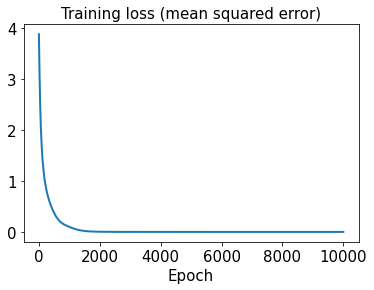

In [84]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

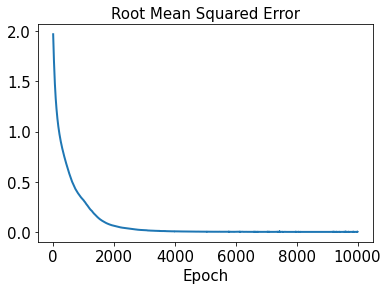

In [85]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [86]:
test_results3 = sd3.evaluate(t_test)

1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [87]:
decoded_train3 = sd3.predict(t_train)

In [88]:
decoded_test3 = sd3.predict(t_test)

In [89]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [90]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [91]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.0011237369945604281


In [92]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.010205661226228381


In [93]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.0006283925341522109, 0.0013843463788732885, 0.0006030184605646815, 0.0008452495604156646, 0.0003931760351653004, 0.0011986060856516948, 0.0006426985234475235, 0.0007403539125552276, 0.0003850622272576643, 0.0012093083766025082, 0.0006226629640405771, 0.001001270594733474, 0.0008151414987182319, 0.0011816150518481586, 0.0006399887891645913, 0.0016283629966190318, 0.0017723458795186199, 0.0007733598862018766, 0.0017609807461157563, 0.0016492689880967383, 0.0018485719147203932, 0.001627665290530538, 0.0011937358461238017, 0.0007073661691756693, 0.000512600678732415, 0.0004844607357566345, 0.0007773943285514015, 0.0005534741017995097, 0.0006886380330047517, 0.001284388867561752, 0.0004612387458423902, 0.0007467055456782382, 0.0009359883481056882]


In [94]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.0011086973314909751, 0.0005509195455456041, 0.0015141604033543535, 0.0012320704350816257, 0.0014214547954247495, 0.044608376145328955, 0.0006203938058032164, 0.021581618687130624]


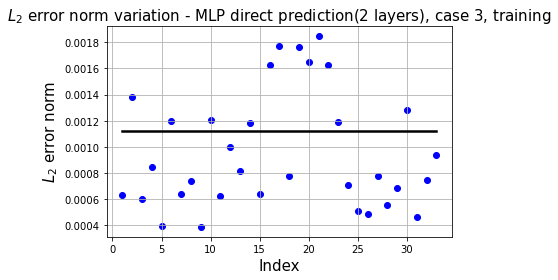

In [95]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

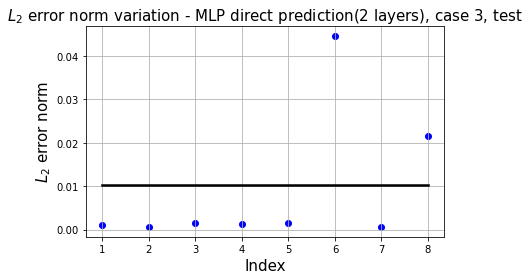

In [96]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

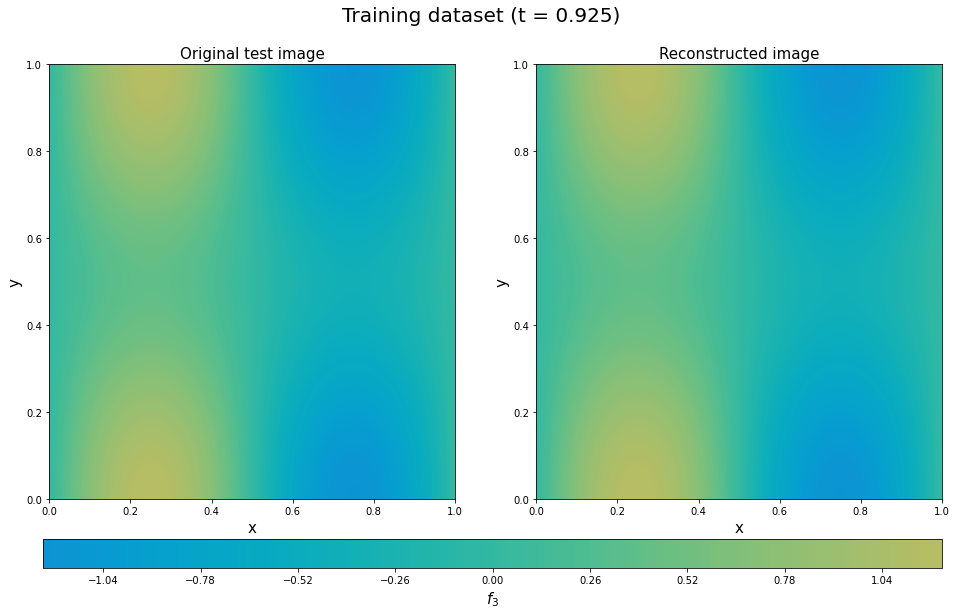

In [97]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

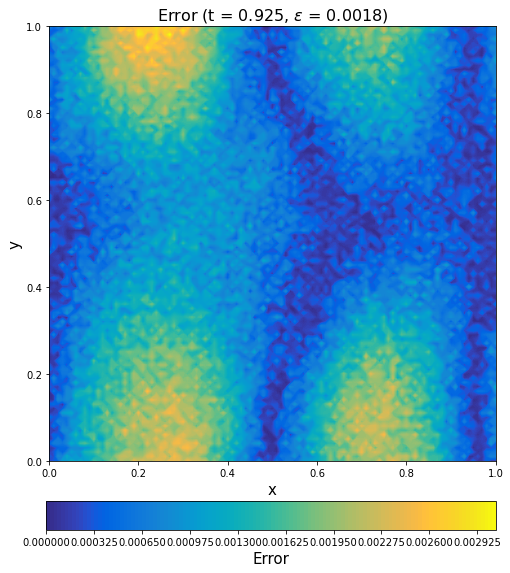

In [98]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

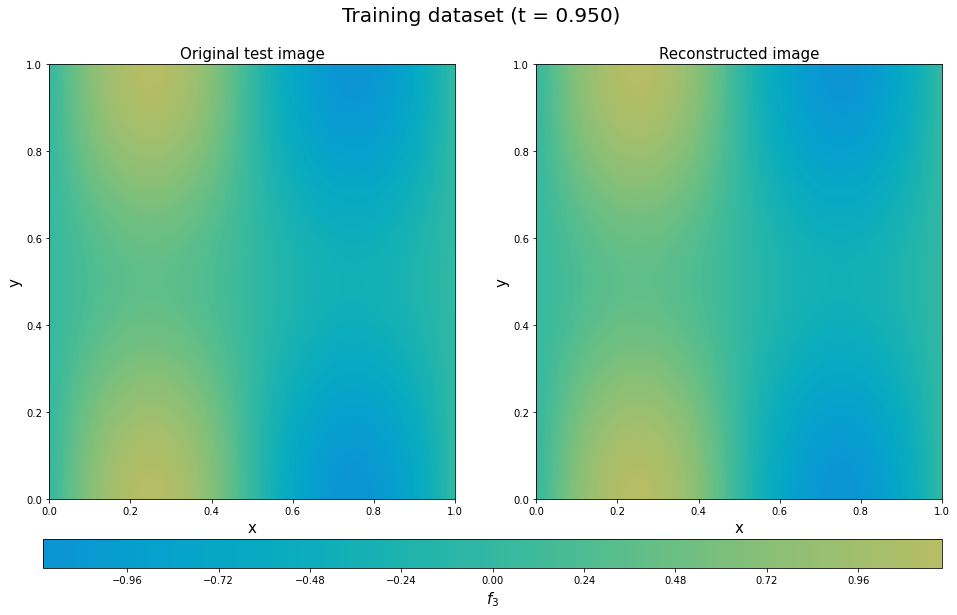

In [99]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

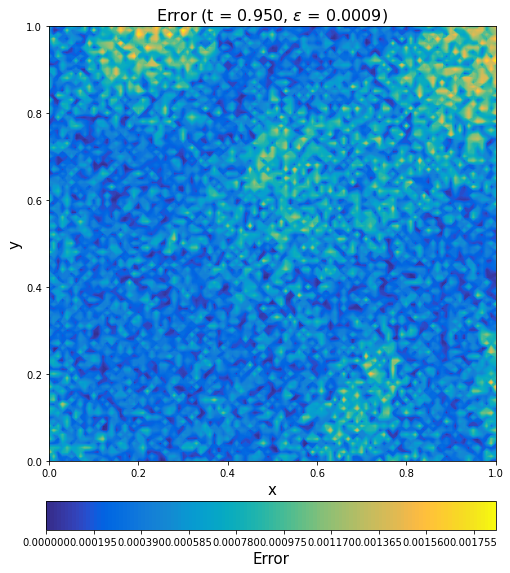

In [100]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

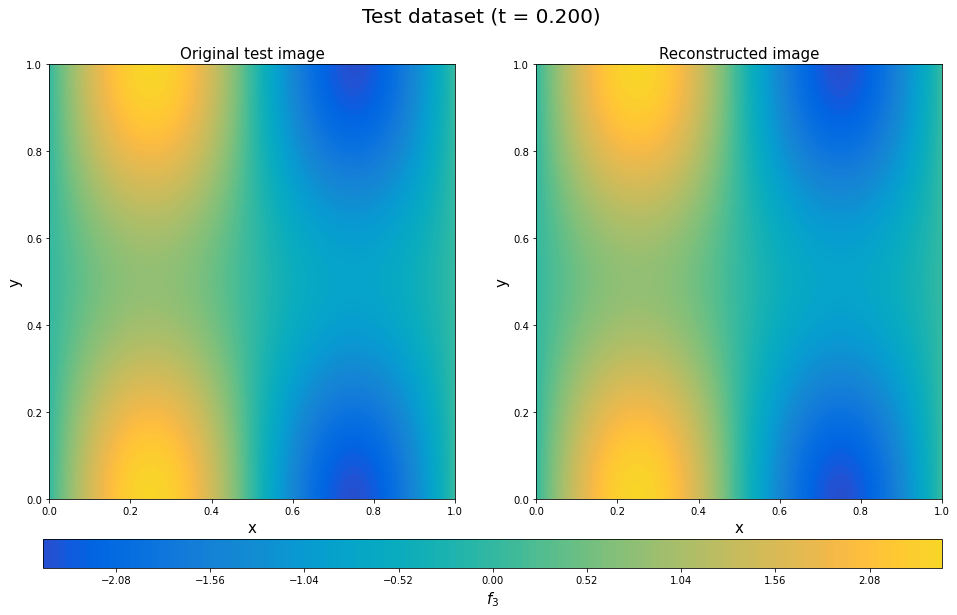

In [101]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

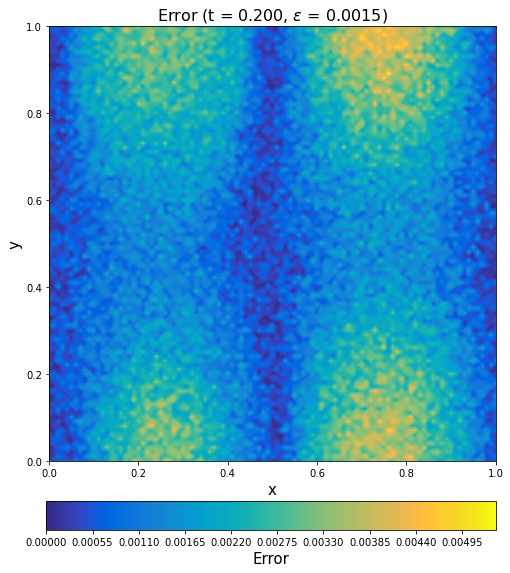

In [102]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

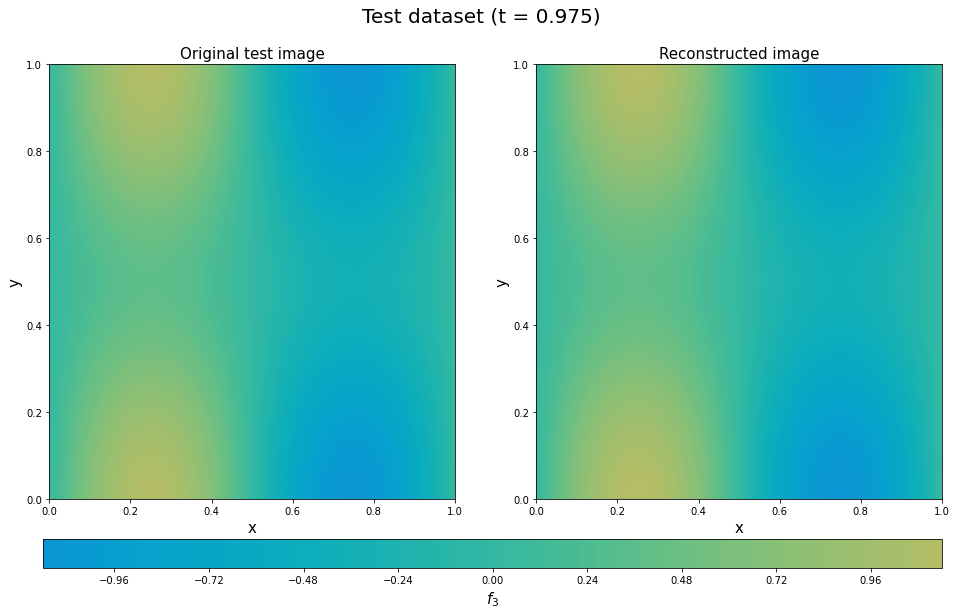

In [103]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

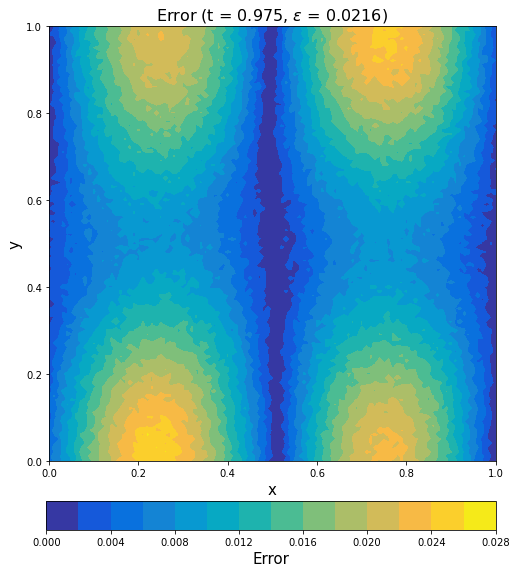

In [104]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()